# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:04:22.694213: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:04:26.088023
2025-04-14 22:04:26.088023


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:04:20"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

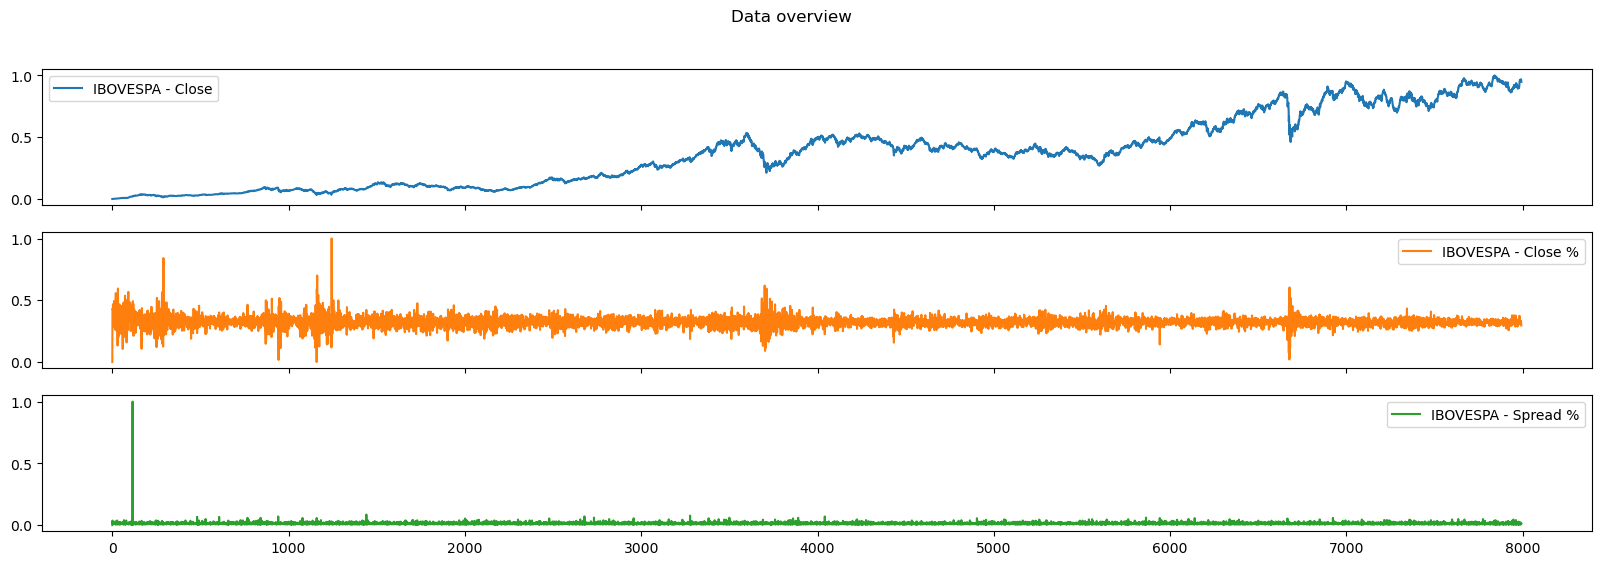

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

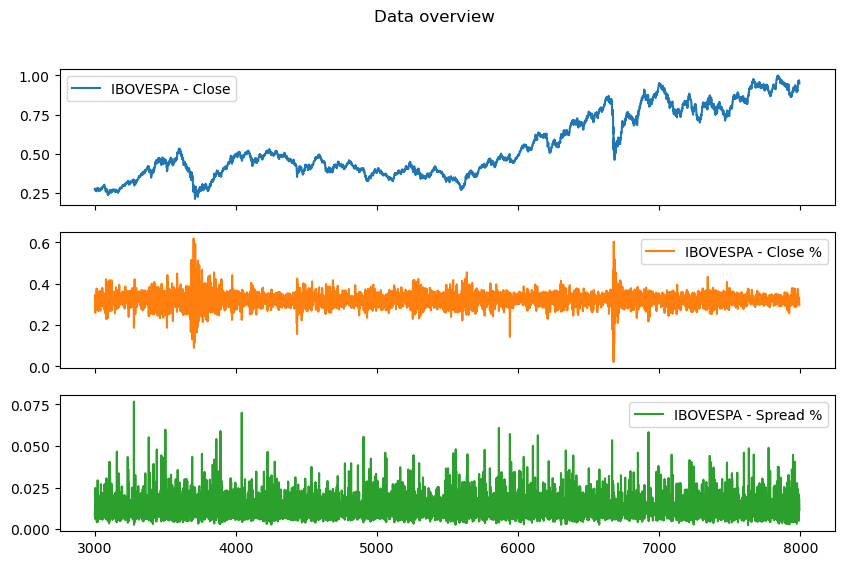

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

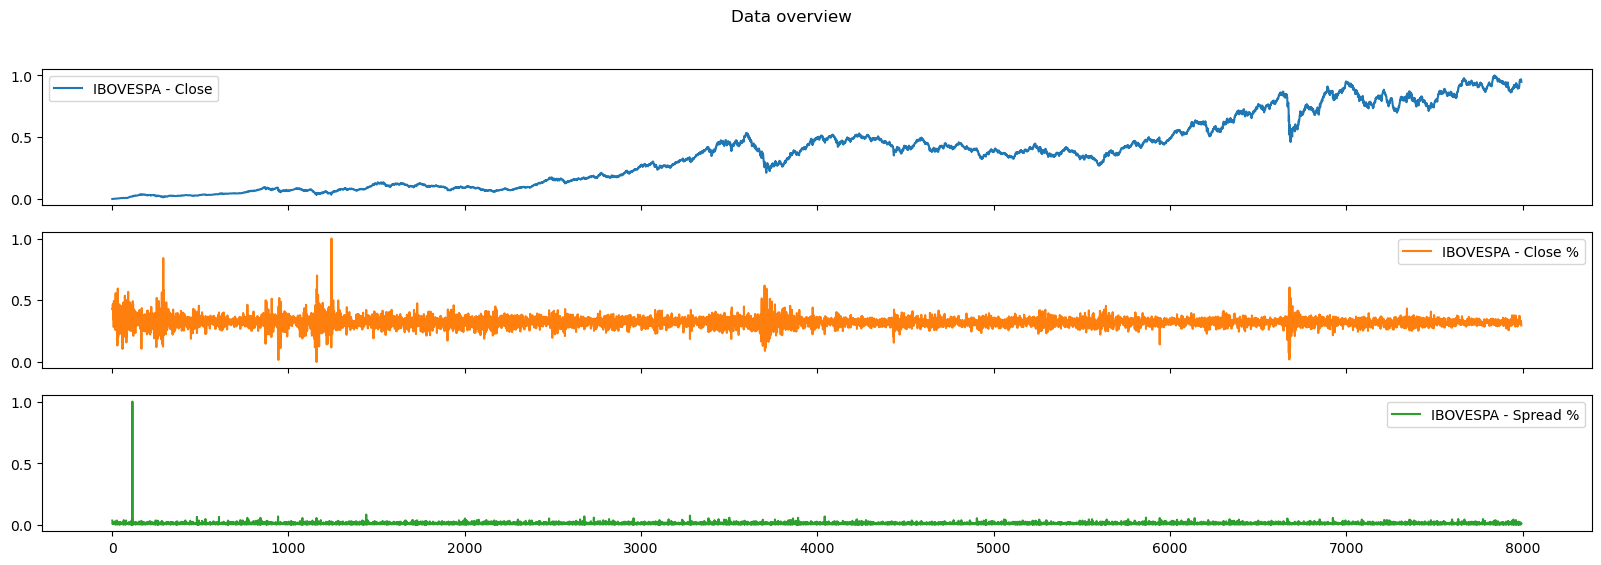

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

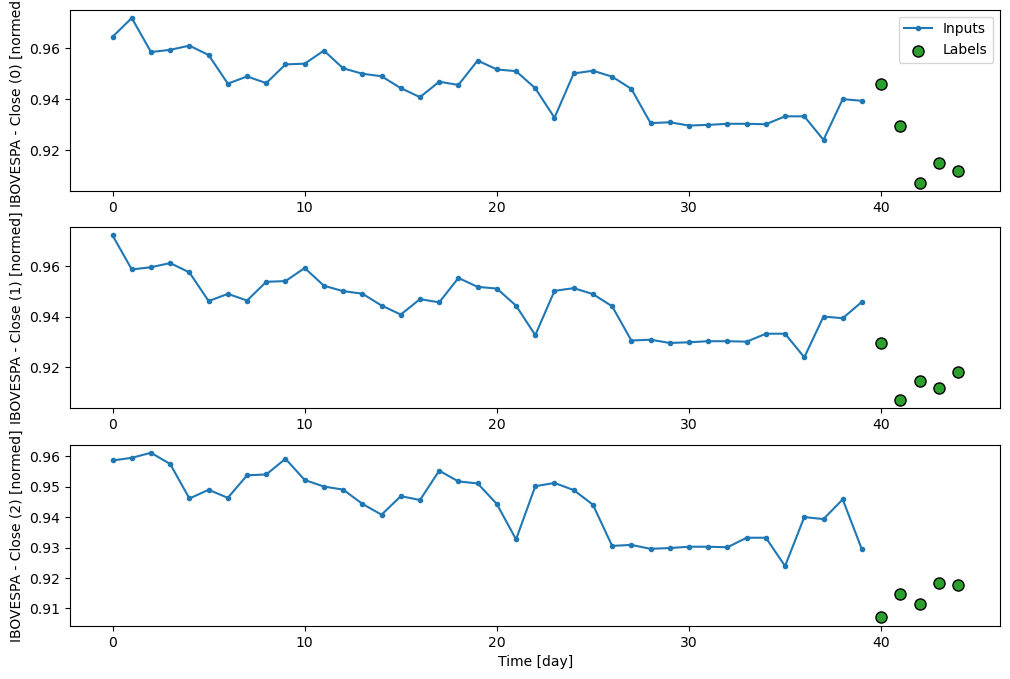

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:04 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 99.5613 - mean_squared_error: 1.2282e-04 - root_mean_squared_error: 0.0109  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 84.6519 - mean_squared_error: 1.3291e-04 - root_mean_squared_error: 0.0114

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 80.0027 - mean_squared_error: 1.5789e-04 - root_mean_squared_error: 0.0124

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 76.7878 - mean_squared_error: 1.6294e-04 - root_mean_squared_error: 0.0126

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 73.9447 - mean_squared_error: 1.6506e-04 - root_mean_squared_error: 0.0127

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 69.7576 - mean_squared_error: 1.6309e-04 - root_mean_squared_error: 0.0127

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 65.8483 - mean_squared_error: 1.5844e-04 - root_mean_squared_error: 0.0125

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.2654 - mean_squared_error: 1.5156e-04 - root_mean_squared_error: 0.0122

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.5444 - mean_squared_error: 1.4873e-04 - root_mean_squared_error: 0.0121

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 54.6170 - mean_squared_error: 1.5226e-04 - root_mean_squared_error: 0.0123

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 52.1302 - mean_squared_error: 1.5500e-04 - root_mean_squared_error: 0.0124

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 50.5588 - mean_squared_error: 1.5699e-04 - root_mean_squared_error: 0.0125

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.7610 - mean_squared_error: 1.6134e-04 - root_mean_squared_error: 0.0126

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 47.5888 - mean_squared_error: 1.6641e-04 - root_mean_squared_error: 0.0128

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.5263 - mean_squared_error: 1.7364e-04 - root_mean_squared_error: 0.0131

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 45.5007 - mean_squared_error: 1.7926e-04 - root_mean_squared_error: 0.0132

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 44.5273 - mean_squared_error: 1.8385e-04 - root_mean_squared_error: 0.0134

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 43.5933 - mean_squared_error: 1.8740e-04 - root_mean_squared_error: 0.0135

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 42.7267 - mean_squared_error: 1.9065e-04 - root_mean_squared_error: 0.0137

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 41.6442 - mean_squared_error: 1.9409e-04 - root_mean_squared_error: 0.0138

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 40.9159 - mean_squared_error: 1.9669e-04 - root_mean_squared_error: 0.0139

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 40.2274 - mean_squared_error: 1.9890e-04 - root_mean_squared_error: 0.0140

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 39.5931 - mean_squared_error: 2.0151e-04 - root_mean_squared_error: 0.0140

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 39.0239 - mean_squared_error: 2.0705e-04 - root_mean_squared_error: 0.0142

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 38.5045 - mean_squared_error: 2.1530e-04 - root_mean_squared_error: 0.0145

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 37.8380 - mean_squared_error: 2.2514e-04 - root_mean_squared_error: 0.0148

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 37.1929 - mean_squared_error: 2.3352e-04 - root_mean_squared_error: 0.0150

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 36.5713 - mean_squared_error: 2.4109e-04 - root_mean_squared_error: 0.0152

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 35.9841 - mean_squared_error: 2.4962e-04 - root_mean_squared_error: 0.0155

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 35.5665 - mean_squared_error: 2.5718e-04 - root_mean_squared_error: 0.0157

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 35.1631 - mean_squared_error: 2.6493e-04 - root_mean_squared_error: 0.0159

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 34.6486 - mean_squared_error: 2.7674e-04 - root_mean_squared_error: 0.0162

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 34.2733 - mean_squared_error: 2.8533e-04 - root_mean_squared_error: 0.0164

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 33.7872 - mean_squared_error: 2.9676e-04 - root_mean_squared_error: 0.0167

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 33.4554 - mean_squared_error: 3.1685e-04 - root_mean_squared_error: 0.0171

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 33.0615 - mean_squared_error: 3.5877e-04 - root_mean_squared_error: 0.0179

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 32.7797 - mean_squared_error: 3.9141e-04 - root_mean_squared_error: 0.0184

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 32.4337 - mean_squared_error: 4.5199e-04 - root_mean_squared_error: 0.0194

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 32.1901 - mean_squared_error: 5.0336e-04 - root_mean_squared_error: 0.0201

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 31.9524 - mean_squared_error: 5.5323e-04 - root_mean_squared_error: 0.0208

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 31.7233 - mean_squared_error: 6.0369e-04 - root_mean_squared_error: 0.0216

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 31.5040 - mean_squared_error: 6.5477e-04 - root_mean_squared_error: 0.0223

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 31.2892 - mean_squared_error: 7.0376e-04 - root_mean_squared_error: 0.0230

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 31.0789 - mean_squared_error: 7.5098e-04 - root_mean_squared_error: 0.0236

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 30.8711 - mean_squared_error: 7.9544e-04 - root_mean_squared_error: 0.0242

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 30.6652 - mean_squared_error: 8.3722e-04 - root_mean_squared_error: 0.0248

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 30.4008 - mean_squared_error: 8.9146e-04 - root_mean_squared_error: 0.0256

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 30.2088 - mean_squared_error: 9.3051e-04 - root_mean_squared_error: 0.0261

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 29.9580 - mean_squared_error: 9.7951e-04 - root_mean_squared_error: 0.0268

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 29.7750 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0273    

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 29.5940 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0278

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 29.4155 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0282

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 29.2419 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0287

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 29.0732 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 28.9070 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0295

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 28.6929 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 28.4864 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 28.3361 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 28.1401 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 27.9953 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 27.8042 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 27.6619 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 27.5213 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 27.3869 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0333

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 27.2546 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 27.0831 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 26.9170 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 26.7933 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 26.6711 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 26.5094 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 26.3496 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 26.2712 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368 - val_loss: 0.1111 - val_mean_absolute_error: 0.1111 - val_mean_absolute_percentage_error: 11.8191 - val_mean_squared_error: 0.0130 - val_root_mean_squared_error: 0.1139 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.6152 - mean_absolute_error: 0.6152 - mean_absolute_percentage_error: 8170.0039 - mean_squared_error: 0.3785 - root_mean_squared_error: 0.6152

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6118 - mean_absolute_error: 0.6118 - mean_absolute_percentage_error: 5795.4434 - mean_squared_error: 0.3744 - root_mean_squared_error: 0.6119 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6024 - mean_absolute_error: 0.6024 - mean_absolute_percentage_error: 4905.1436 - mean_squared_error: 0.3635 - root_mean_squared_error: 0.6028

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5879 - mean_absolute_error: 0.5879 - mean_absolute_percentage_error: 4267.7671 - mean_squared_error: 0.3507 - root_mean_squared_error: 0.5917

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5717 - mean_absolute_error: 0.5717 - mean_absolute_percentage_error: 3842.9980 - mean_squared_error: 0.3441 - root_mean_squared_error: 0.5861

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5563 - mean_absolute_error: 0.5563 - mean_absolute_percentage_error: 3584.9543 - mean_squared_error: 0.3349 - root_mean_squared_error: 0.5779

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5412 - mean_absolute_error: 0.5412 - mean_absolute_percentage_error: 3366.6052 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5684

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5255 - mean_absolute_error: 0.5255 - mean_absolute_percentage_error: 3175.3982 - mean_squared_error: 0.3131 - root_mean_squared_error: 0.5578

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5101 - mean_absolute_error: 0.5101 - mean_absolute_percentage_error: 3006.2126 - mean_squared_error: 0.3018 - root_mean_squared_error: 0.5468

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4952 - mean_absolute_error: 0.4952 - mean_absolute_percentage_error: 2856.0452 - mean_squared_error: 0.2908 - root_mean_squared_error: 0.5359

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4818 - mean_absolute_error: 0.4818 - mean_absolute_percentage_error: 2722.8865 - mean_squared_error: 0.2807 - root_mean_squared_error: 0.5257

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4692 - mean_absolute_error: 0.4692 - mean_absolute_percentage_error: 2604.1313 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.5159

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4536 - mean_absolute_error: 0.4536 - mean_absolute_percentage_error: 2464.0234 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.5035

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4426 - mean_absolute_error: 0.4426 - mean_absolute_percentage_error: 2369.7617 - mean_squared_error: 0.2515 - root_mean_squared_error: 0.4947

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - mean_absolute_percentage_error: 2283.2830 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4863

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4185 - mean_absolute_error: 0.4185 - mean_absolute_percentage_error: 2178.3994 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4756

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2106.5925 - mean_squared_error: 0.2276 - root_mean_squared_error: 0.4680

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3997 - mean_absolute_error: 0.3997 - mean_absolute_percentage_error: 2039.9813 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4607

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 1978.0270 - mean_squared_error: 0.2154 - root_mean_squared_error: 0.4537

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 1920.2562 - mean_squared_error: 0.2099 - root_mean_squared_error: 0.4470

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3749 - mean_absolute_error: 0.3749 - mean_absolute_percentage_error: 1866.2534 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4406

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 1799.5404 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4325

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1753.0426 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4268

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3513 - mean_absolute_error: 0.3513 - mean_absolute_percentage_error: 1709.2329 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4212

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3449 - mean_absolute_error: 0.3449 - mean_absolute_percentage_error: 1667.8436 - mean_squared_error: 0.1848 - root_mean_squared_error: 0.4159

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 1616.0740 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4091

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1567.8271 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.4026

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1533.7379 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3980

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1501.2954 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3935

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1470.3737 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3892

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1440.8672 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3850

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1412.6783 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3810

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1376.9817 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3758

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1343.2656 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3709

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1319.1787 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3673

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1296.0712 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3638

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1273.8887 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3605

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1245.6375 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3563

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1218.7986 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3523

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1193.2438 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3485

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1174.8622 - mean_squared_error: 0.1337 - root_mean_squared_error: 0.3457

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1157.1089 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3430

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1134.3583 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3394

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1112.6006 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3360

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1091.7671 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3327

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2487 - mean_absolute_error: 0.2487 - mean_absolute_percentage_error: 1076.7094 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3303

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1057.3468 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3272

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1047.9573 - mean_squared_error: 0.1203 - root_mean_squared_error: 0.3257

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1034.2201 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3234

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1020.8828 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3212

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1007.9324 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3190

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 991.2327 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3162 

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 975.1451 - mean_squared_error: 0.1125 - root_mean_squared_error: 0.3135

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 963.4628 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3115

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 952.0927 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3096

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 941.0212 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.3077

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 930.2368 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3058

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 916.2852 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3034

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 906.1285 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.3016

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 896.2224 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2998

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 883.3868 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2975

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 874.0277 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2959

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2123 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 864.8882 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2942

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 855.9662 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2926

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 844.3915 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2906

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 835.9395 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2890

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2058 - mean_absolute_error: 0.2058 - mean_absolute_percentage_error: 827.6767 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2876

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 816.9416 - mean_squared_error: 0.0955 - root_mean_squared_error: 0.2856

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 809.0936 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2842

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 801.4132 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2828

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 793.8947 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2814

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 784.1159 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.2796

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 781.7193 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2792 - val_loss: 0.0850 - val_mean_absolute_error: 0.0850 - val_mean_absolute_percentage_error: 9.0134 - val_mean_squared_error: 0.0080 - val_root_mean_squared_error: 0.0892 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.7953 - mean_absolute_error: 0.7953 - mean_absolute_percentage_error: 10561.9961 - mean_squared_error: 0.6326 - root_mean_squared_error: 0.7954

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.7924 - mean_absolute_error: 0.7924 - mean_absolute_percentage_error: 7501.7773 - mean_squared_error: 0.6281 - root_mean_squared_error: 0.7925  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.7764 - mean_absolute_error: 0.7764 - mean_absolute_percentage_error: 6103.5991 - mean_squared_error: 0.6042 - root_mean_squared_error: 0.7770

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.7571 - mean_absolute_error: 0.7571 - mean_absolute_percentage_error: 5511.8169 - mean_squared_error: 0.5779 - root_mean_squared_error: 0.7593

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.7221 - mean_absolute_error: 0.7221 - mean_absolute_percentage_error: 4917.4390 - mean_squared_error: 0.5364 - root_mean_squared_error: 0.7299

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6801 - mean_absolute_error: 0.6801 - mean_absolute_percentage_error: 4441.2227 - mean_squared_error: 0.4945 - root_mean_squared_error: 0.6982

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6502 - mean_absolute_error: 0.6502 - mean_absolute_percentage_error: 4145.5581 - mean_squared_error: 0.4662 - root_mean_squared_error: 0.6759

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6140 - mean_absolute_error: 0.6140 - mean_absolute_percentage_error: 3813.3042 - mean_squared_error: 0.4330 - root_mean_squared_error: 0.6486

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5888 - mean_absolute_error: 0.5888 - mean_absolute_percentage_error: 3599.9253 - mean_squared_error: 0.4109 - root_mean_squared_error: 0.6298

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5585 - mean_absolute_error: 0.5585 - mean_absolute_percentage_error: 3354.0442 - mean_squared_error: 0.3850 - root_mean_squared_error: 0.6071

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - mean_absolute_percentage_error: 3143.4280 - mean_squared_error: 0.3624 - root_mean_squared_error: 0.5865

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5129 - mean_absolute_error: 0.5129 - mean_absolute_percentage_error: 3004.2820 - mean_squared_error: 0.3472 - root_mean_squared_error: 0.5725

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4959 - mean_absolute_error: 0.4959 - mean_absolute_percentage_error: 2878.5642 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5594

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4751 - mean_absolute_error: 0.4751 - mean_absolute_percentage_error: 2728.2576 - mean_squared_error: 0.3168 - root_mean_squared_error: 0.5433

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4607 - mean_absolute_error: 0.4607 - mean_absolute_percentage_error: 2626.7134 - mean_squared_error: 0.3055 - root_mean_squared_error: 0.5321

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4431 - mean_absolute_error: 0.4431 - mean_absolute_percentage_error: 2503.9219 - mean_squared_error: 0.2918 - root_mean_squared_error: 0.5182

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 2420.0337 - mean_squared_error: 0.2823 - root_mean_squared_error: 0.5085

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 2317.6091 - mean_squared_error: 0.2708 - root_mean_squared_error: 0.4964

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.4050 - mean_absolute_error: 0.4050 - mean_absolute_percentage_error: 2246.9841 - mean_squared_error: 0.2628 - root_mean_squared_error: 0.4879

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3950 - mean_absolute_error: 0.3950 - mean_absolute_percentage_error: 2181.0613 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4799

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3855 - mean_absolute_error: 0.3855 - mean_absolute_percentage_error: 2119.3782 - mean_squared_error: 0.2483 - root_mean_squared_error: 0.4722

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 2061.5088 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4649

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 2007.1036 - mean_squared_error: 0.2355 - root_mean_squared_error: 0.4580

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1939.4209 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4492

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1876.7034 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4409

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 1832.5897 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4351

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1777.2772 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4276

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1725.5981 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4205

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1689.0149 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4154

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1642.8695 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4089

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1610.0852 - mean_squared_error: 0.1898 - root_mean_squared_error: 0.4043

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1578.7454 - mean_squared_error: 0.1862 - root_mean_squared_error: 0.3998

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1539.0305 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3940

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2883 - mean_absolute_error: 0.2883 - mean_absolute_percentage_error: 1510.7133 - mean_squared_error: 0.1783 - root_mean_squared_error: 0.3899

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1474.7874 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3847

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1449.0865 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3810

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1416.3583 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3762

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1392.8901 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3727

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1370.2817 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3694

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1348.4836 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3661

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1320.6173 - mean_squared_error: 0.1566 - root_mean_squared_error: 0.3619

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1300.5596 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3589

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1281.1752 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3560

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 1262.4290 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3531

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2463 - mean_absolute_error: 0.2463 - mean_absolute_percentage_error: 1238.3735 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3494

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1215.3232 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3458

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1198.6564 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3432

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1177.2153 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3398

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1156.6166 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3365

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1141.6887 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3341

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1127.1868 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3317

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1113.0934 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3294

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1094.9128 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3264

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1077.3944 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3236

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2187 - mean_absolute_error: 0.2187 - mean_absolute_percentage_error: 1060.4957 - mean_squared_error: 0.1267 - root_mean_squared_error: 0.3208

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1044.1799 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3181

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1032.3086 - mean_squared_error: 0.1235 - root_mean_squared_error: 0.3161

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 1016.9427 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3135

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1005.7488 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3116

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 994.8271 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3098 

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 984.1694 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3079

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 970.3529 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3056

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 960.2719 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3039

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 950.4229 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3022

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 937.6367 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.3000

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 928.2964 - mean_squared_error: 0.1115 - root_mean_squared_error: 0.2984

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 916.1611 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.2962

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 907.2887 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2947

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 895.7562 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2927

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 892.9302 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2922 - val_loss: 0.1366 - val_mean_absolute_error: 0.1366 - val_mean_absolute_percentage_error: 14.5398 - val_mean_squared_error: 0.0193 - val_root_mean_squared_error: 0.1390 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.6835 - mean_absolute_error: 0.6835 - mean_absolute_percentage_error: 9077.9365 - mean_squared_error: 0.4673 - root_mean_squared_error: 0.6836

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6791 - mean_absolute_error: 0.6791 - mean_absolute_percentage_error: 6928.6733 - mean_squared_error: 0.4613 - root_mean_squared_error: 0.6792 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6681 - mean_absolute_error: 0.6681 - mean_absolute_percentage_error: 5440.9932 - mean_squared_error: 0.4469 - root_mean_squared_error: 0.6684

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6577 - mean_absolute_error: 0.6577 - mean_absolute_percentage_error: 4890.0176 - mean_squared_error: 0.4338 - root_mean_squared_error: 0.6583

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6446 - mean_absolute_error: 0.6446 - mean_absolute_percentage_error: 4491.9619 - mean_squared_error: 0.4183 - root_mean_squared_error: 0.6461

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6289 - mean_absolute_error: 0.6289 - mean_absolute_percentage_error: 4174.0254 - mean_squared_error: 0.4011 - root_mean_squared_error: 0.6320

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6110 - mean_absolute_error: 0.6110 - mean_absolute_percentage_error: 3903.6504 - mean_squared_error: 0.3832 - root_mean_squared_error: 0.6168

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5837 - mean_absolute_error: 0.5837 - mean_absolute_percentage_error: 3593.3203 - mean_squared_error: 0.3593 - root_mean_squared_error: 0.5956

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5629 - mean_absolute_error: 0.5629 - mean_absolute_percentage_error: 3391.6777 - mean_squared_error: 0.3426 - root_mean_squared_error: 0.5802

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5436 - mean_absolute_error: 0.5436 - mean_absolute_percentage_error: 3213.7427 - mean_squared_error: 0.3272 - root_mean_squared_error: 0.5656

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5198 - mean_absolute_error: 0.5198 - mean_absolute_percentage_error: 3006.7656 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5476

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5030 - mean_absolute_error: 0.5030 - mean_absolute_percentage_error: 2869.8625 - mean_squared_error: 0.2961 - root_mean_squared_error: 0.5349

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4871 - mean_absolute_error: 0.4871 - mean_absolute_percentage_error: 2746.3586 - mean_squared_error: 0.2845 - root_mean_squared_error: 0.5231

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4721 - mean_absolute_error: 0.4721 - mean_absolute_percentage_error: 2634.1758 - mean_squared_error: 0.2739 - root_mean_squared_error: 0.5119

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4580 - mean_absolute_error: 0.4580 - mean_absolute_percentage_error: 2531.7812 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.5014

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 2438.0117 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4915

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4325 - mean_absolute_error: 0.4325 - mean_absolute_percentage_error: 2351.7390 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4822

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4209 - mean_absolute_error: 0.4209 - mean_absolute_percentage_error: 2272.0955 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4733

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4099 - mean_absolute_error: 0.4099 - mean_absolute_percentage_error: 2198.3489 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4650

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3996 - mean_absolute_error: 0.3996 - mean_absolute_percentage_error: 2129.8306 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4571

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 2045.6851 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4472

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3776 - mean_absolute_error: 0.3776 - mean_absolute_percentage_error: 1987.3519 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4401

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 1932.6572 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4335

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1881.2666 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4271

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_absolute_percentage_error: 1832.8733 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4210

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1787.2205 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4151

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 1744.0872 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4095

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3297 - mean_absolute_error: 0.3297 - mean_absolute_percentage_error: 1690.1034 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.4024

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1652.0261 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3974

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3174 - mean_absolute_error: 0.3174 - mean_absolute_percentage_error: 1615.8345 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3925

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1581.3867 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3878

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1548.5627 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3833

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1517.2390 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3789

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1477.6345 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3733

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1449.4318 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3693

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1422.4154 - mean_squared_error: 0.1523 - root_mean_squared_error: 0.3654

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1396.5204 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3617

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 1371.7056 - mean_squared_error: 0.1471 - root_mean_squared_error: 0.3581

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1340.1567 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3536

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2674 - mean_absolute_error: 0.2674 - mean_absolute_percentage_error: 1317.5498 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3503

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1288.7120 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3460

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1267.9991 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3430

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1248.0211 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3400

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 1228.7421 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3371

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1210.1285 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3342

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1192.1390 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3315

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1169.0673 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3279

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2393 - mean_absolute_error: 0.2393 - mean_absolute_percentage_error: 1146.9781 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3245

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1131.0173 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3220

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1110.4956 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3188

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1095.6448 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3164

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 1081.2345 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3141

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 1067.2428 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3118

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1049.2068 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3089

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1031.8448 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3060

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 1019.2415 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3040

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1006.9812 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3019

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2136 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 995.0491 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2999 

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 983.4301 - mean_squared_error: 0.1068 - root_mean_squared_error: 0.2980

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2097 - mean_absolute_error: 0.2097 - mean_absolute_percentage_error: 972.1110 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2961

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 957.4657 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2936

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 946.8036 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2918

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 932.9935 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2894

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 919.6266 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2871

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 909.8814 - mean_squared_error: 0.0990 - root_mean_squared_error: 0.2854

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 900.3680 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2838

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 891.0757 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2822

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 879.0143 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2801

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1920 - mean_absolute_error: 0.1920 - mean_absolute_percentage_error: 867.3130 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2781

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 858.7634 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2766

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 850.4003 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2751

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 839.5283 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2732

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 828.9655 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2713

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 826.3770 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2708 - val_loss: 0.0960 - val_mean_absolute_error: 0.0960 - val_mean_absolute_percentage_error: 10.1978 - val_mean_squared_error: 0.0098 - val_root_mean_squared_error: 0.0989 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.5453 - mean_absolute_error: 0.5453 - mean_absolute_percentage_error: 7241.9653 - mean_squared_error: 0.2973 - root_mean_squared_error: 0.5453

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5421 - mean_absolute_error: 0.5421 - mean_absolute_percentage_error: 5134.8613 - mean_squared_error: 0.2940 - root_mean_squared_error: 0.5422 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5340 - mean_absolute_error: 0.5340 - mean_absolute_percentage_error: 4188.6416 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5342

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5249 - mean_absolute_error: 0.5249 - mean_absolute_percentage_error: 3800.2593 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.5256

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.5084 - mean_absolute_error: 0.5084 - mean_absolute_percentage_error: 3419.7935 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.5108

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4926 - mean_absolute_error: 0.4926 - mean_absolute_percentage_error: 3187.0752 - mean_squared_error: 0.2495 - root_mean_squared_error: 0.4977

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 2920.8638 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4796

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4462 - mean_absolute_error: 0.4462 - mean_absolute_percentage_error: 2699.5249 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4626

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4253 - mean_absolute_error: 0.4253 - mean_absolute_percentage_error: 2511.7822 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4468

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - mean_absolute_percentage_error: 2350.4497 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4323

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 2243.9792 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4222

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3752 - mean_absolute_error: 0.3752 - mean_absolute_percentage_error: 2117.8206 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.4097

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 2006.6993 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3982

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 1931.5841 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3902

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1840.8420 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3803

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1778.8566 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3733

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1703.1895 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3646

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1651.0291 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3585

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1602.3579 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3526

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1556.8397 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3471

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1514.1799 - mean_squared_error: 0.1280 - root_mean_squared_error: 0.3418

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1461.2446 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3352

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1412.3243 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3289

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2625 - mean_absolute_error: 0.2625 - mean_absolute_percentage_error: 1366.9692 - mean_squared_error: 0.1160 - root_mean_squared_error: 0.3229

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2572 - mean_absolute_error: 0.2572 - mean_absolute_percentage_error: 1335.0551 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3187

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1295.0287 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3133

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1266.7393 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.3095

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1239.8108 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.3058

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1214.1438 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.3022

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1189.6467 - mean_squared_error: 0.1014 - root_mean_squared_error: 0.2988

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1166.2374 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2955

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1136.5902 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2912

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1115.4435 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2881

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1088.6001 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2842

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1069.4093 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2814

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 1044.9827 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2777

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 1027.4757 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2751

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1010.6167 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2726

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 989.0814 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2693 

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 973.5932 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2669

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 953.7694 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2638

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 939.4879 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2616

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1875 - mean_absolute_error: 0.1875 - mean_absolute_percentage_error: 921.1754 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2587

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 907.9572 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2566

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1830 - mean_absolute_error: 0.1830 - mean_absolute_percentage_error: 895.1588 - mean_squared_error: 0.0769 - root_mean_squared_error: 0.2546

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 882.7588 - mean_squared_error: 0.0759 - root_mean_squared_error: 0.2526

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 870.7377 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2507

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 859.0786 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2488

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 844.0678 - mean_squared_error: 0.0726 - root_mean_squared_error: 0.2463

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 829.6342 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2439

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 815.7429 - mean_squared_error: 0.0703 - root_mean_squared_error: 0.2416

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1675 - mean_absolute_error: 0.1675 - mean_absolute_percentage_error: 805.6641 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2399

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 792.6573 - mean_squared_error: 0.0683 - root_mean_squared_error: 0.2377

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 783.2097 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2361

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 774.0109 - mean_squared_error: 0.0668 - root_mean_squared_error: 0.2346

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 765.0505 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2330

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 756.3193 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2315

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 747.8094 - mean_squared_error: 0.0645 - root_mean_squared_error: 0.2301

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 739.5112 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2286

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1548 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 731.4170 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2272

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1534 - mean_absolute_error: 0.1534 - mean_absolute_percentage_error: 723.5191 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2258

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 715.8118 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2245

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 708.2894 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2232

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 700.9432 - mean_squared_error: 0.0606 - root_mean_squared_error: 0.2219

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 693.7651 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2207

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 686.7498 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2195

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 677.6393 - mean_squared_error: 0.0587 - root_mean_squared_error: 0.2179

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1444 - mean_absolute_error: 0.1444 - mean_absolute_percentage_error: 668.7947 - mean_squared_error: 0.0580 - root_mean_squared_error: 0.2163

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 662.3287 - mean_squared_error: 0.0574 - root_mean_squared_error: 0.2152

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1423 - mean_absolute_error: 0.1423 - mean_absolute_percentage_error: 656.0005 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2140

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 649.8135 - mean_squared_error: 0.0564 - root_mean_squared_error: 0.2129 - val_loss: 0.0497 - val_mean_absolute_error: 0.0497 - val_mean_absolute_percentage_error: 5.2572 - val_mean_squared_error: 0.0029 - val_root_mean_squared_error: 0.0541 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 5521.1636 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.4159

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.4091 - mean_absolute_error: 0.4091 - mean_absolute_percentage_error: 3894.9812 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.4093 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3972 - mean_absolute_error: 0.3972 - mean_absolute_percentage_error: 3152.9988 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3978

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3804 - mean_absolute_error: 0.3804 - mean_absolute_percentage_error: 2748.1758 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3827

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 2447.7842 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3652

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 2264.2195 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3524

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 2064.9329 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3370

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1939.7405 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3267

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1830.2755 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.3171

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 1704.6366 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.3056

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2707 - mean_absolute_error: 0.2707 - mean_absolute_percentage_error: 1622.6747 - mean_squared_error: 0.0935 - root_mean_squared_error: 0.2977

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2614 - mean_absolute_error: 0.2614 - mean_absolute_percentage_error: 1549.2699 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2904

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1483.1467 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2836

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1423.1056 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2773

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1368.3282 - mean_squared_error: 0.0795 - root_mean_squared_error: 0.2714

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 1318.1273 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2659

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2241 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 1271.9335 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2607

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1229.2723 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2558

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1177.2136 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2498

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1129.9099 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2441

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 1097.1661 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2401

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1926 - mean_absolute_error: 0.1926 - mean_absolute_percentage_error: 1056.7063 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2351

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1883 - mean_absolute_error: 0.1883 - mean_absolute_percentage_error: 1028.5026 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2316

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - mean_absolute_percentage_error: 1001.9496 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2282

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 976.9073 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2249 

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 953.2408 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2218

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 930.8351 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2189

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 909.5873 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2160

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1655 - mean_absolute_error: 0.1655 - mean_absolute_percentage_error: 882.8994 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2124

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 857.9218 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2090

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 840.2123 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2065

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 823.3090 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2041

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1525 - mean_absolute_error: 0.1525 - mean_absolute_percentage_error: 801.9305 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2011

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1493 - mean_absolute_error: 0.1493 - mean_absolute_percentage_error: 781.7654 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.1982

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 767.3767 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1962

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 753.5734 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.1941

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 736.0159 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1916

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 723.4385 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1897

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 707.4001 - mean_squared_error: 0.0418 - root_mean_squared_error: 0.1873

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 695.8855 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1856

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1337 - mean_absolute_error: 0.1337 - mean_absolute_percentage_error: 684.7836 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1839

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 674.0736 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1822

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 660.3658 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1801

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 650.4886 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1786

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 640.9368 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1771

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 631.6942 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1757

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 619.8260 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1738

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 608.4473 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1720

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 600.2150 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1706

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 589.6203 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1689

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 579.4363 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1672

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 572.0526 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1660

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 562.5300 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1645

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 555.6182 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1633

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 546.6924 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1618

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 540.2059 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1607

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 531.8204 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1593

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 525.7202 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1583

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 517.8257 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1569

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 512.0765 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1559

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 506.4677 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1550

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 500.9947 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1540

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 495.6544 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1531

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 490.4401 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1522

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 485.3480 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1513

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 478.7407 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1502

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 472.3320 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1491

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 467.6498 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1483

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 461.5663 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1472

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 455.6567 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1462

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 452.7697 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1457 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142 - val_mean_absolute_percentage_error: 1.5253 - val_mean_squared_error: 3.2534e-04 - val_root_mean_squared_error: 0.0180 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.3009 - mean_absolute_error: 0.3009 - mean_absolute_percentage_error: 3995.8750 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.3011

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2920 - mean_absolute_error: 0.2920 - mean_absolute_percentage_error: 2801.4253 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2925 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2783 - mean_absolute_error: 0.2783 - mean_absolute_percentage_error: 2245.8403 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2796

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1997.9041 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2682

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2443 - mean_absolute_error: 0.2443 - mean_absolute_percentage_error: 1746.2065 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2525

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1602.3870 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2423

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 1450.1602 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2305

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 1327.1638 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2201

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 1249.5400 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2132

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 1181.6558 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2069

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 1121.7058 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.2012

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1732 - mean_absolute_error: 0.1732 - mean_absolute_percentage_error: 1068.4388 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1959

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 1020.6310 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1911

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 977.4746 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1866 

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 938.2608 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1824

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 902.4452 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1785

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 869.5967 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1748

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 839.3437 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1714

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 811.3848 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1682

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 785.4632 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1651

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 753.6993 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1613

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 731.7359 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1586

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 711.1808 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1561

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 691.8907 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1537

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 667.9372 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1506

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 651.1656 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1485

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 635.3181 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1464

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 620.3185 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1444

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 606.0969 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1425

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 592.5914 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1407

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 579.7477 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1389

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 567.5156 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1373

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 555.8500 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1356

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 544.7112 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1341

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 534.0633 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1326

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 520.5729 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1307

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 510.9492 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1293

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 501.7186 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1279

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 492.8550 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1266

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 484.3354 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1254

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 476.1398 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1242

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 470.8466 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1234

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 465.6838 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1226

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 458.1732 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1215

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 450.9300 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1204

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 443.9396 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1193

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 437.1889 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1183

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 432.8147 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1176

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 428.5373 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1169

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 424.3536 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1163

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 420.2603 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1157

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 414.2838 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1147

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 408.4948 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1138

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 402.8836 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1129

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 397.4424 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1120

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 393.9058 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1115

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 388.7308 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1106

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 383.7056 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1098

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 378.8237 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1090

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 374.0796 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1082

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 369.4668 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1075

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 364.9794 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1067

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 360.6125 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1060

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 356.3609 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1053

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 353.5884 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1048

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 349.5193 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1042

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 345.5535 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1035

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 341.6870 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1028

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 337.9156 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1022

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 335.4525 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1018

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 333.0301 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1014

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 330.6467 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1010

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 327.1425 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1004

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 323.7211 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.0998

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 320.3793 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.0992

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 317.1146 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0987

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 313.9239 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.0982

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 310.8043 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0977

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 307.7538 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0972

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 304.7692 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0967

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 302.8161 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0964

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 301.8518 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0962 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4621 - val_mean_squared_error: 3.1401e-04 - val_root_mean_squared_error: 0.0177 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 2656.8618 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.2008

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 2000.6858 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1944 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 1614.7776 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1849

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 1452.6923 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1779

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1612 - mean_absolute_error: 0.1612 - mean_absolute_percentage_error: 1267.9656 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1675

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1501 - mean_absolute_error: 0.1501 - mean_absolute_percentage_error: 1134.0909 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1587

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 1033.2504 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1515

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 951.7664 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1453 

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 883.7945 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1398

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 844.4073 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1364

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 792.2438 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1318

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 746.9512 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1277

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1085 - mean_absolute_error: 0.1085 - mean_absolute_percentage_error: 707.2211 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1239

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 672.2027 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1205

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 640.9828 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1174

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 621.9501 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1154

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 604.1589 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1136

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 579.5349 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1110

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 557.0861 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1086

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 536.5234 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1063

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 523.7458 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1048

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 511.6408 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1035

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 505.8246 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1028

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 494.6364 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1015

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 478.8766 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0997

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 464.2367 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0979

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 450.5922 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0963

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 433.7632 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0942

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 422.0463 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0928

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 407.4951 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0909

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 397.3044 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0896

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 387.6745 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0884

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 375.6271 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0868

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 364.3952 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0853

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 356.4561 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0842

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 348.8973 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0832

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 341.6907 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0822

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 334.8116 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0813

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 328.2376 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0803

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 321.9480 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0795

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 315.9270 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0786

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 310.1562 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0778

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 304.6201 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0770

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 299.3026 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0763

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 294.1905 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0755

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 290.8911 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0751

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 286.0948 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0744

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 281.4726 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0737

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 277.0155 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0731

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 272.7145 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0724

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 269.9300 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0720

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 265.8706 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0714

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 261.9458 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0708

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 258.1487 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0703

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 255.6853 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0699

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 252.0879 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0693

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 248.6019 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0688

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 245.2223 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0683

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 241.9449 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0678

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 239.8139 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0674

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 236.6952 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0670

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 233.6661 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0665

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 231.6949 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0662

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 228.8074 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0657

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 225.9996 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0653

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 223.2681 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0648

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 220.6097 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0644

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 218.0218 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0640

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 214.6758 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0635

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 212.2411 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0631

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 209.8674 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0627

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 207.5524 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0623

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 205.2939 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0620

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 203.0915 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0616

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 200.9417 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0613

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 198.1547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0609

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 196.1213 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0606

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 194.1350 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0603

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 192.1934 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0600

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 189.6720 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0597

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 187.8292 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0594

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 185.4354 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0591 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165 - val_mean_absolute_percentage_error: 1.7445 - val_mean_squared_error: 4.0722e-04 - val_root_mean_squared_error: 0.0202 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 2081.3938 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1574

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 1431.8026 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1473 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 1109.1018 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1339

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 961.1187 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1251 

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 858.8664 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1184

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 781.1786 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1129

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 718.2200 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1081

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 651.0665 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1026

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 596.8572 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0979

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 552.0450 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0939

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 523.2272 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0911

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 489.9144 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0879

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 461.1867 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0850

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 442.0401 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0830

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 424.6159 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0812

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 403.6715 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0789

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 389.4387 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0773

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 372.1476 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0754

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 360.2852 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0740

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 345.7593 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0723

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 332.5243 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 323.3332 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0696

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 314.7021 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0685

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 306.5790 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0675

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 298.9161 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 291.6745 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 282.6150 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 276.2265 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0636

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 270.1560 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0628

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 262.5146 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0618

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 257.0953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0611

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 251.9225 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0604

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 245.3800 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 239.2117 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0586

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 233.3884 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0579

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 229.2294 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 225.2366 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0567

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 220.1514 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0560

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 215.3208 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 211.8512 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0549

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 208.5052 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 205.2764 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0540

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 201.1429 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0534

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 198.1637 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0530

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 194.3420 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 190.6826 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0519

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 188.0380 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 185.4744 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 182.9888 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0508

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 180.5773 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 178.2361 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 175.2187 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0497

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 172.3145 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0492

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 170.2064 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 168.1556 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 166.1599 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0483

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 164.2172 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0480

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 161.7058 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0476

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 159.8783 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0474

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 158.0966 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 155.7890 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 154.1082 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 152.4687 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 150.8684 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 149.3064 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 147.7807 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0457

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 146.2905 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 144.3557 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0453

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 142.4783 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0450

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 140.6551 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0448

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 139.7645 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0447 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1779 - val_mean_squared_error: 2.0510e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 1857.6599 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1405

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 1387.2993 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1340 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 1275.5099 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1310

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 1106.7085 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1246

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 932.7352 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1153 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 817.8867 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1082

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 735.5977 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1026

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 670.5388 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0978

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 618.2119 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0937

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 574.6501 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0901

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 526.4929 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0860

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 486.7481 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0824

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 461.1809 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0800

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 431.6188 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0771

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 406.1053 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0745

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 389.1219 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0728

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 368.8417 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 355.1414 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0691

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 342.5543 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0677

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 330.9456 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0664

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 316.8050 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0648

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 303.9984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0633

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 292.3446 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 281.6734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0606

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 274.2328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 264.9778 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 258.4866 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0577

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 252.3454 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0569

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 246.5257 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0562

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 241.0017 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0555

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 234.0583 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0546

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 227.5519 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 221.4408 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 217.0955 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0523

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 211.5931 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 207.6713 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0510

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 203.9115 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 199.1314 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 195.7088 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0494

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 192.4167 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 189.2471 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 185.1994 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 182.2903 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 179.4829 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 176.7716 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 174.1507 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 170.7893 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 168.3628 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 165.2459 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0451

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 162.9918 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0447

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 160.0925 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 157.3071 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 155.2885 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 153.3277 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0433

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 151.4221 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0430

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 148.9628 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 147.1766 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0424

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 144.8690 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 143.1914 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 142.0974 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 140.4913 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 138.9255 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0411

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 136.8976 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 135.4204 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 133.5070 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 132.1119 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0402

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 130.7498 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 129.4195 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 128.1199 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 126.8495 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 125.6077 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 123.9939 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 122.8151 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0391 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5377 - val_mean_squared_error: 3.1773e-04 - val_root_mean_squared_error: 0.0178 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 1434.5769 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1085

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 972.2991 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0986  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 739.7557 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0872

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 643.7694 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0817

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 558.7439 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0764

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 510.6136 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0730

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 460.1660 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0692

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 429.3618 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0668

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 403.0067 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0646

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 380.2383 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0626

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 360.2873 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0609

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 337.2921 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0588

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 322.1859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 308.5916 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0561

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 296.2497 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 284.9813 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0537

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 274.6506 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 262.1369 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 250.8685 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 240.6727 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 233.6441 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 227.0854 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 218.9747 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 213.3125 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 206.2612 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 201.3101 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 195.1136 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0436

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 189.3354 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 183.9331 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 180.1051 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 176.4532 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 172.9657 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 169.6313 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0403

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 165.4067 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 162.3955 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 159.5077 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 156.7362 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 153.2075 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 150.6784 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 148.2425 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 145.8940 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 143.6283 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 141.4412 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 139.3286 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 136.6204 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 134.6660 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 132.7739 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 130.9410 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 129.1644 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 127.4415 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 125.7704 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 124.1482 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 122.5726 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 121.0418 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 119.0674 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 117.6338 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 115.7823 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 113.9960 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 112.6971 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 111.4317 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 110.1981 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 108.9950 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 107.8211 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 106.6762 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 105.5593 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 104.4690 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 103.0552 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 102.0236 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 101.0157 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 99.7068 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315 

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 98.7505 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 97.5073 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 96.9000 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 1.2851 - val_mean_squared_error: 2.3147e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1359.4170 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1034

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 917.6149 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0934  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 738.5237 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0848

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 606.9070 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0772

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 526.3059 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0721

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 480.9136 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0689

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 444.1884 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0661

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 404.3138 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0630

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 371.9644 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0603

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 345.1540 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 327.8589 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 312.4982 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0549

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 298.7092 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 286.2560 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 274.9400 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 261.3484 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0498

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 252.1212 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0488

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 243.6094 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 235.7351 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 226.1109 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 219.4788 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 213.2884 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 207.4910 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 202.0428 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 196.9116 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 192.0676 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 187.4869 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 183.1481 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 177.7068 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 173.8615 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 170.2013 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 165.5845 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 162.3043 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 158.1540 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 155.1967 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 152.3665 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 149.6525 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 146.2024 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 143.7314 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 141.3546 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 139.0654 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 136.8586 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 134.0367 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 132.0056 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 130.0431 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 128.1455 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 126.3094 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 124.5320 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 122.2481 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 120.5963 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.9944 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.4403 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 115.4382 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 113.5120 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 112.1147 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 110.3110 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 109.0008 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 107.7255 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 106.0770 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 104.4855 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.3270 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 102.1972 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 100.7335 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 99.6676 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302 

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 98.6272 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 97.6117 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 96.6199 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 95.3334 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 94.3941 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 93.1743 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 92.2829 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 91.1243 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 90.8403 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294 - val_loss: 0.0153 - val_mean_absolute_error: 0.0153 - val_mean_absolute_percentage_error: 1.6230 - val_mean_squared_error: 3.4160e-04 - val_root_mean_squared_error: 0.0185 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 1213.3555 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 887.6611 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 693.2808 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 582.4149 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0701

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 512.1758 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0658

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 445.2731 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0613

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 407.6614 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0585

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 367.7519 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0553

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 336.0370 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0527

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 316.2214 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0510

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 298.9501 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0495

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 283.7726 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 266.1379 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0465

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 254.4697 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 243.9168 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0443

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 231.3118 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 220.1047 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 210.0694 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0408

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 203.2034 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 196.8333 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 190.9111 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0386

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 185.3890 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 180.2218 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 175.3743 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 170.8183 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 166.5258 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 161.1705 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 157.4049 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0347

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 153.8346 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 150.4439 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 146.1786 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 143.1548 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 140.2696 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.6223 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 134.0254 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 131.5421 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 128.3934 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 125.4157 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 123.2852 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 120.5708 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 118.6231 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 116.1343 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 114.3442 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 112.6163 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 110.4030 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 108.2859 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 106.7575 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 104.7942 - mean_squared_error: 9.9368e-04 - root_mean_squared_error: 0.0284

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.3745 - mean_squared_error: 9.8238e-04 - root_mean_squared_error: 0.0283

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 101.5483 - mean_squared_error: 9.6785e-04 - root_mean_squared_error: 0.0281

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.2263 - mean_squared_error: 9.5732e-04 - root_mean_squared_error: 0.0279

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 98.9427 - mean_squared_error: 9.4707e-04 - root_mean_squared_error: 0.0278 

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 97.6960 - mean_squared_error: 9.3710e-04 - root_mean_squared_error: 0.0276

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 96.4849 - mean_squared_error: 9.2745e-04 - root_mean_squared_error: 0.0275

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 95.3076 - mean_squared_error: 9.1808e-04 - root_mean_squared_error: 0.0273

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 94.1626 - mean_squared_error: 9.0896e-04 - root_mean_squared_error: 0.0272

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 93.0486 - mean_squared_error: 9.0012e-04 - root_mean_squared_error: 0.0271

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 91.9642 - mean_squared_error: 8.9153e-04 - root_mean_squared_error: 0.0269

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 90.5627 - mean_squared_error: 8.8059e-04 - root_mean_squared_error: 0.0268

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 89.5433 - mean_squared_error: 8.7271e-04 - root_mean_squared_error: 0.0266

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 88.5497 - mean_squared_error: 8.6505e-04 - root_mean_squared_error: 0.0265

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 87.5808 - mean_squared_error: 8.5761e-04 - root_mean_squared_error: 0.0264

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 86.6354 - mean_squared_error: 8.5033e-04 - root_mean_squared_error: 0.0263

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 85.4116 - mean_squared_error: 8.4173e-04 - root_mean_squared_error: 0.0262

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 84.2273 - mean_squared_error: 8.3392e-04 - root_mean_squared_error: 0.0261

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 83.3639 - mean_squared_error: 8.2869e-04 - root_mean_squared_error: 0.0260

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 82.5208 - mean_squared_error: 8.2382e-04 - root_mean_squared_error: 0.0260

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 81.6975 - mean_squared_error: 8.1943e-04 - root_mean_squared_error: 0.0259

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 80.8931 - mean_squared_error: 8.1538e-04 - root_mean_squared_error: 0.0259

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 79.8485 - mean_squared_error: 8.1033e-04 - root_mean_squared_error: 0.0258

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 79.0854 - mean_squared_error: 8.0686e-04 - root_mean_squared_error: 0.0258

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 78.0935 - mean_squared_error: 8.0232e-04 - root_mean_squared_error: 0.0257

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 77.8505 - mean_squared_error: 8.0121e-04 - root_mean_squared_error: 0.0257 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0789 - val_mean_squared_error: 1.6154e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 1612.4724 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1218

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 1099.3334 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1119 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 892.0297 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1029 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 761.6645 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0953

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 652.2264 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0884

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 575.3524 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0829

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 517.3719 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0784

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 481.9958 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0754

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 451.7714 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0728

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 425.6532 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0705

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 402.7866 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0684

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 382.6216 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0665

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 359.0781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0642

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 343.4763 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0626

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 329.3522 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0612

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 316.4947 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0598

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 304.7280 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 293.9173 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 283.9443 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 271.7850 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0549

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 260.7599 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 253.1414 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 246.0131 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 239.3270 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0511

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 231.0321 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 223.3656 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 216.2551 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 211.2507 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 206.5021 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 201.9896 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 197.6947 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 193.6011 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 188.4319 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 184.7553 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 181.2378 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 176.7807 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 172.5665 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 169.5520 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 165.7133 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 162.9608 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 160.3093 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 157.7533 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 155.2880 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 152.9084 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 150.6095 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 147.6625 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 145.5360 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 143.4775 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 141.4834 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 139.5506 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 137.6767 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 135.2647 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 133.5172 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 131.8200 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 130.1710 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 128.0433 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 126.4982 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0361

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 124.9947 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 123.0518 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 121.6391 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 120.2625 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.4807 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.1827 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 115.9168 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 114.2769 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 113.0812 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 111.9137 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 110.7735 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0339

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 109.6595 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 108.2132 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 107.1567 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 106.1232 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 105.1129 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3857 - val_mean_squared_error: 2.5523e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 1413.5046 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1069

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1041.8000 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0995 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 768.4274 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0878 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 656.2709 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0812

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 562.3182 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0753

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 510.6890 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0717

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 469.7823 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0687

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 436.0255 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0661

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 407.5247 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0638

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 383.0646 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0617

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 355.2782 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0593

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 331.7974 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0572

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 316.4395 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0557

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 302.6526 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 290.1813 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 275.2685 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 265.1862 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 255.9153 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 247.3606 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 239.4413 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0478

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 232.0862 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 225.2382 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 218.8393 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 212.8438 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 207.2114 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 201.9102 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 196.9079 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 192.1794 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 186.2619 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 182.0877 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 178.1205 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 173.1255 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 169.5820 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 165.1050 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 161.9194 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 157.8841 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 154.0760 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 151.3558 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 147.8968 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 144.6134 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 142.2581 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 139.9878 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 137.7981 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 134.9965 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 132.9789 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 130.3925 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 128.5259 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 126.7188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 124.9681 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 123.2712 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 121.0885 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 119.5081 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.4720 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 115.9959 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 114.5615 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 112.7104 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 111.3660 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 109.6289 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 108.3661 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 107.1360 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 105.5442 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 104.3850 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.2540 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 102.1510 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 101.0749 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 100.0245 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 98.6624 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303 

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 97.3422 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 96.3785 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 95.4362 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 94.5150 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 93.3173 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 92.7323 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0283 - val_mean_squared_error: 1.5277e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 1219.4651 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 898.8207 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 661.8372 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 566.5066 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0699

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 503.8799 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0662

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 456.1535 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0630

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 418.3357 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 387.2729 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0579

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 353.3681 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0552

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 332.1076 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0534

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 313.6095 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0518

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 297.3375 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0503

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 282.9099 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0490

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 270.0016 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0477

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 258.3715 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 247.8335 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 235.2188 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 223.9830 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 213.9039 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 206.9971 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 200.5809 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 194.6046 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 189.0214 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 183.7902 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 178.8777 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0379

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 174.2562 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 168.5007 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 164.4596 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 160.6331 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 157.0040 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 153.5567 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 149.2190 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 146.1434 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 143.2082 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 140.4040 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 137.7217 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 134.3253 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 131.1160 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 128.8223 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 126.6179 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 124.4983 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 122.4575 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 120.4910 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 117.9775 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 115.5801 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 113.8532 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 112.1836 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 110.0415 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 108.4947 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 106.9961 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 105.5436 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 104.1353 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 102.3226 - mean_squared_error: 9.9433e-04 - root_mean_squared_error: 0.0283

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 100.5799 - mean_squared_error: 9.7910e-04 - root_mean_squared_error: 0.0281

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 99.3165 - mean_squared_error: 9.6807e-04 - root_mean_squared_error: 0.0279 

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 98.0887 - mean_squared_error: 9.5737e-04 - root_mean_squared_error: 0.0277

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 96.8947 - mean_squared_error: 9.4696e-04 - root_mean_squared_error: 0.0276

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.7332 - mean_squared_error: 9.3684e-04 - root_mean_squared_error: 0.0274

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 94.6027 - mean_squared_error: 9.2700e-04 - root_mean_squared_error: 0.0273

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 93.5021 - mean_squared_error: 9.1746e-04 - root_mean_squared_error: 0.0271

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 92.4304 - mean_squared_error: 9.0824e-04 - root_mean_squared_error: 0.0270

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 91.3863 - mean_squared_error: 8.9933e-04 - root_mean_squared_error: 0.0268

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 90.3686 - mean_squared_error: 8.9069e-04 - root_mean_squared_error: 0.0267

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 89.3762 - mean_squared_error: 8.8229e-04 - root_mean_squared_error: 0.0266

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.4081 - mean_squared_error: 8.7412e-04 - root_mean_squared_error: 0.0264

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 87.1547 - mean_squared_error: 8.6429e-04 - root_mean_squared_error: 0.0263

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.9412 - mean_squared_error: 8.5498e-04 - root_mean_squared_error: 0.0262

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.0563 - mean_squared_error: 8.4842e-04 - root_mean_squared_error: 0.0261

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.1920 - mean_squared_error: 8.4219e-04 - root_mean_squared_error: 0.0260

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 83.3480 - mean_squared_error: 8.3647e-04 - root_mean_squared_error: 0.0259

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.5231 - mean_squared_error: 8.3093e-04 - root_mean_squared_error: 0.0258

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.7168 - mean_squared_error: 8.2574e-04 - root_mean_squared_error: 0.0258

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.6694 - mean_squared_error: 8.1918e-04 - root_mean_squared_error: 0.0257

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 79.6527 - mean_squared_error: 8.1279e-04 - root_mean_squared_error: 0.0256 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1012 - val_mean_squared_error: 1.6957e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 933.9818 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0717

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 679.7280 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0655 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 570.0204 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 495.6739 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 424.9429 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0525

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 362.9085 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0484

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 329.3251 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 302.3384 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 273.5020 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 255.7508 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0401

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 240.4857 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 223.1855 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 212.0779 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 199.1629 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 190.6086 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 180.4302 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 171.4237 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 165.3156 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 159.6846 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 154.4779 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 149.6474 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 145.1546 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 140.9636 - mean_squared_error: 9.8090e-04 - root_mean_squared_error: 0.0289

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 137.0412 - mean_squared_error: 9.5384e-04 - root_mean_squared_error: 0.0284

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 133.3610 - mean_squared_error: 9.2844e-04 - root_mean_squared_error: 0.0280

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 129.9014 - mean_squared_error: 9.0458e-04 - root_mean_squared_error: 0.0276

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 126.6427 - mean_squared_error: 8.8213e-04 - root_mean_squared_error: 0.0272

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 123.5656 - mean_squared_error: 8.6094e-04 - root_mean_squared_error: 0.0268

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 119.7198 - mean_squared_error: 8.3448e-04 - root_mean_squared_error: 0.0264

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 117.0108 - mean_squared_error: 8.1589e-04 - root_mean_squared_error: 0.0260

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 114.4388 - mean_squared_error: 7.9830e-04 - root_mean_squared_error: 0.0257

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.2041 - mean_squared_error: 7.7625e-04 - root_mean_squared_error: 0.0253

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 108.9114 - mean_squared_error: 7.6065e-04 - root_mean_squared_error: 0.0250

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 106.7238 - mean_squared_error: 7.4583e-04 - root_mean_squared_error: 0.0248

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.6345 - mean_squared_error: 7.3179e-04 - root_mean_squared_error: 0.0245

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 102.6365 - mean_squared_error: 7.1848e-04 - root_mean_squared_error: 0.0243

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 100.1075 - mean_squared_error: 7.0220e-04 - root_mean_squared_error: 0.0240

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.3051 - mean_squared_error: 6.9091e-04 - root_mean_squared_error: 0.0238 

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 96.5764 - mean_squared_error: 6.8023e-04 - root_mean_squared_error: 0.0236

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 94.3784 - mean_squared_error: 6.6697e-04 - root_mean_squared_error: 0.0233

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 92.2924 - mean_squared_error: 6.5459e-04 - root_mean_squared_error: 0.0231

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.3095 - mean_squared_error: 6.4296e-04 - root_mean_squared_error: 0.0229

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.8845 - mean_squared_error: 6.3458e-04 - root_mean_squared_error: 0.0228

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.5101 - mean_squared_error: 6.2652e-04 - root_mean_squared_error: 0.0226

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.7513 - mean_squared_error: 6.1622e-04 - root_mean_squared_error: 0.0224

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.4843 - mean_squared_error: 6.0882e-04 - root_mean_squared_error: 0.0223

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.2592 - mean_squared_error: 6.0165e-04 - root_mean_squared_error: 0.0222

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.0737 - mean_squared_error: 5.9468e-04 - root_mean_squared_error: 0.0220

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.9261 - mean_squared_error: 5.8793e-04 - root_mean_squared_error: 0.0219

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.8144 - mean_squared_error: 5.8136e-04 - root_mean_squared_error: 0.0218

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.7368 - mean_squared_error: 5.7498e-04 - root_mean_squared_error: 0.0217

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.6920 - mean_squared_error: 5.6881e-04 - root_mean_squared_error: 0.0216

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.6788 - mean_squared_error: 5.6285e-04 - root_mean_squared_error: 0.0215

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.6951 - mean_squared_error: 5.5704e-04 - root_mean_squared_error: 0.0213

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.4277 - mean_squared_error: 5.4955e-04 - root_mean_squared_error: 0.0212

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.5086 - mean_squared_error: 5.4414e-04 - root_mean_squared_error: 0.0211

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.6152 - mean_squared_error: 5.3888e-04 - root_mean_squared_error: 0.0210

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.7461 - mean_squared_error: 5.3377e-04 - root_mean_squared_error: 0.0209

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.6237 - mean_squared_error: 5.2718e-04 - root_mean_squared_error: 0.0208

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.8078 - mean_squared_error: 5.2242e-04 - root_mean_squared_error: 0.0207

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.0133 - mean_squared_error: 5.1784e-04 - root_mean_squared_error: 0.0206

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.2395 - mean_squared_error: 5.1346e-04 - root_mean_squared_error: 0.0205

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.4853 - mean_squared_error: 5.0922e-04 - root_mean_squared_error: 0.0204

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.7499 - mean_squared_error: 5.0513e-04 - root_mean_squared_error: 0.0204

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.0324 - mean_squared_error: 5.0115e-04 - root_mean_squared_error: 0.0203

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.1036 - mean_squared_error: 4.9660e-04 - root_mean_squared_error: 0.0202

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.2047 - mean_squared_error: 4.9254e-04 - root_mean_squared_error: 0.0201

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.3344 - mean_squared_error: 4.8902e-04 - root_mean_squared_error: 0.0201

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.4911 - mean_squared_error: 4.8591e-04 - root_mean_squared_error: 0.0201

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.8758 - mean_squared_error: 4.8391e-04 - root_mean_squared_error: 0.0200

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.2743 - mean_squared_error: 4.8201e-04 - root_mean_squared_error: 0.0200

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 60.6864 - mean_squared_error: 4.8036e-04 - root_mean_squared_error: 0.0200

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.9223 - mean_squared_error: 4.7826e-04 - root_mean_squared_error: 0.0200

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.3641 - mean_squared_error: 4.7672e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1654 - val_mean_squared_error: 1.8530e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 1001.4155 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0761

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 667.4891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 534.2276 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 457.4638 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 405.0608 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0528

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 365.3810 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 334.2307 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 301.3441 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 275.2136 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 258.8744 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0415

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 240.3092 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 228.3370 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 217.6837 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 208.1147 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 199.4609 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 191.5927 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 182.1398 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 175.7201 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 167.9227 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 160.8778 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 156.0240 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 151.4952 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 147.2570 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 143.2803 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 139.5421 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 136.0206 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 132.6957 - mean_squared_error: 9.8384e-04 - root_mean_squared_error: 0.0287

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 129.5513 - mean_squared_error: 9.6072e-04 - root_mean_squared_error: 0.0283

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 126.5723 - mean_squared_error: 9.3885e-04 - root_mean_squared_error: 0.0279

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 123.7455 - mean_squared_error: 9.1813e-04 - root_mean_squared_error: 0.0276

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 120.1932 - mean_squared_error: 8.9216e-04 - root_mean_squared_error: 0.0271

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 117.6771 - mean_squared_error: 8.7379e-04 - root_mean_squared_error: 0.0268

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 115.2777 - mean_squared_error: 8.5632e-04 - root_mean_squared_error: 0.0265

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 112.9872 - mean_squared_error: 8.3973e-04 - root_mean_squared_error: 0.0262

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 110.0899 - mean_squared_error: 8.1895e-04 - root_mean_squared_error: 0.0259

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 108.0270 - mean_squared_error: 8.0447e-04 - root_mean_squared_error: 0.0256

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.0534 - mean_squared_error: 7.9096e-04 - root_mean_squared_error: 0.0254

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 103.5480 - mean_squared_error: 7.7400e-04 - root_mean_squared_error: 0.0251

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 101.7570 - mean_squared_error: 7.6213e-04 - root_mean_squared_error: 0.0249

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 100.0354 - mean_squared_error: 7.5080e-04 - root_mean_squared_error: 0.0247

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 98.3797 - mean_squared_error: 7.4008e-04 - root_mean_squared_error: 0.0245 

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 96.7853 - mean_squared_error: 7.2978e-04 - root_mean_squared_error: 0.0243

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 95.2482 - mean_squared_error: 7.1984e-04 - root_mean_squared_error: 0.0242

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 93.7658 - mean_squared_error: 7.1027e-04 - root_mean_squared_error: 0.0240

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 92.3351 - mean_squared_error: 7.0105e-04 - root_mean_squared_error: 0.0238

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 90.5031 - mean_squared_error: 6.8927e-04 - root_mean_squared_error: 0.0236

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 89.1823 - mean_squared_error: 6.8077e-04 - root_mean_squared_error: 0.0235

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 87.4877 - mean_squared_error: 6.6983e-04 - root_mean_squared_error: 0.0233

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.8646 - mean_squared_error: 6.5933e-04 - root_mean_squared_error: 0.0231

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.6913 - mean_squared_error: 6.5172e-04 - root_mean_squared_error: 0.0230

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.5540 - mean_squared_error: 6.4434e-04 - root_mean_squared_error: 0.0228

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 82.4513 - mean_squared_error: 6.3722e-04 - root_mean_squared_error: 0.0227

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.0314 - mean_squared_error: 6.2803e-04 - root_mean_squared_error: 0.0226

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.0025 - mean_squared_error: 6.2137e-04 - root_mean_squared_error: 0.0224

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 78.6764 - mean_squared_error: 6.1281e-04 - root_mean_squared_error: 0.0223

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 77.7143 - mean_squared_error: 6.0661e-04 - root_mean_squared_error: 0.0222

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.7785 - mean_squared_error: 6.0058e-04 - root_mean_squared_error: 0.0221

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 75.8681 - mean_squared_error: 5.9473e-04 - root_mean_squared_error: 0.0219

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 74.9819 - mean_squared_error: 5.8905e-04 - root_mean_squared_error: 0.0218

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.1191 - mean_squared_error: 5.8358e-04 - root_mean_squared_error: 0.0217

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 73.2790 - mean_squared_error: 5.7833e-04 - root_mean_squared_error: 0.0216

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 72.4602 - mean_squared_error: 5.7324e-04 - root_mean_squared_error: 0.0216

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 71.6621 - mean_squared_error: 5.6832e-04 - root_mean_squared_error: 0.0215

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.8836 - mean_squared_error: 5.6354e-04 - root_mean_squared_error: 0.0214

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 70.1242 - mean_squared_error: 5.5904e-04 - root_mean_squared_error: 0.0213

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 69.3839 - mean_squared_error: 5.5511e-04 - root_mean_squared_error: 0.0212

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 68.6613 - mean_squared_error: 5.5134e-04 - root_mean_squared_error: 0.0212

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.9560 - mean_squared_error: 5.4789e-04 - root_mean_squared_error: 0.0211

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 67.2672 - mean_squared_error: 5.4463e-04 - root_mean_squared_error: 0.0211

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 66.3738 - mean_squared_error: 5.4082e-04 - root_mean_squared_error: 0.0210

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.7216 - mean_squared_error: 5.3813e-04 - root_mean_squared_error: 0.0210

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 65.0840 - mean_squared_error: 5.3568e-04 - root_mean_squared_error: 0.0210

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.2558 - mean_squared_error: 5.3262e-04 - root_mean_squared_error: 0.0209

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.4518 - mean_squared_error: 5.2965e-04 - root_mean_squared_error: 0.0209 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1098 - val_mean_squared_error: 1.6935e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 968.0954 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0733

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 707.4374 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 516.9354 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 424.2960 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0530

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 378.2651 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 343.0873 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0474

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 314.9035 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 291.7504 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 272.2094 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 255.5054 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 241.0349 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0392

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 228.3804 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0380

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 217.2450 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 204.2314 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 192.8840 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 185.2770 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 176.1409 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 169.9361 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 164.2113 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 157.2309 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 152.4263 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 146.5208 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 141.1149 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 137.3492 - mean_squared_error: 9.7378e-04 - root_mean_squared_error: 0.0286

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 132.6724 - mean_squared_error: 9.4083e-04 - root_mean_squared_error: 0.0281

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 129.3960 - mean_squared_error: 9.1775e-04 - root_mean_squared_error: 0.0277

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 126.2989 - mean_squared_error: 8.9594e-04 - root_mean_squared_error: 0.0273

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 123.3665 - mean_squared_error: 8.7531e-04 - root_mean_squared_error: 0.0269

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 120.5853 - mean_squared_error: 8.5577e-04 - root_mean_squared_error: 0.0266

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 117.9436 - mean_squared_error: 8.3726e-04 - root_mean_squared_error: 0.0263

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 114.6195 - mean_squared_error: 8.1402e-04 - root_mean_squared_error: 0.0259

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 112.2625 - mean_squared_error: 7.9757e-04 - root_mean_squared_error: 0.0256

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 109.2862 - mean_squared_error: 7.7693e-04 - root_mean_squared_error: 0.0252

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 106.4845 - mean_squared_error: 7.5772e-04 - root_mean_squared_error: 0.0248

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 104.4897 - mean_squared_error: 7.4434e-04 - root_mean_squared_error: 0.0246

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 102.5812 - mean_squared_error: 7.3187e-04 - root_mean_squared_error: 0.0244

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.7515 - mean_squared_error: 7.2001e-04 - root_mean_squared_error: 0.0242

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 98.9958 - mean_squared_error: 7.0882e-04 - root_mean_squared_error: 0.0240 

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.3088 - mean_squared_error: 6.9816e-04 - root_mean_squared_error: 0.0238

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 95.6867 - mean_squared_error: 6.8807e-04 - root_mean_squared_error: 0.0236

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 94.1253 - mean_squared_error: 6.7843e-04 - root_mean_squared_error: 0.0234

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 92.1309 - mean_squared_error: 6.6609e-04 - root_mean_squared_error: 0.0232

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.6973 - mean_squared_error: 6.5725e-04 - root_mean_squared_error: 0.0231

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 89.3135 - mean_squared_error: 6.4872e-04 - root_mean_squared_error: 0.0229

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.9771 - mean_squared_error: 6.4051e-04 - root_mean_squared_error: 0.0228

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.6853 - mean_squared_error: 6.3257e-04 - root_mean_squared_error: 0.0226

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.4358 - mean_squared_error: 6.2487e-04 - root_mean_squared_error: 0.0225

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.2266 - mean_squared_error: 6.1741e-04 - root_mean_squared_error: 0.0224

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.0556 - mean_squared_error: 6.1018e-04 - root_mean_squared_error: 0.0222

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.9209 - mean_squared_error: 6.0315e-04 - root_mean_squared_error: 0.0221

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.8210 - mean_squared_error: 5.9634e-04 - root_mean_squared_error: 0.0220

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.7545 - mean_squared_error: 5.8977e-04 - root_mean_squared_error: 0.0218

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.7196 - mean_squared_error: 5.8338e-04 - root_mean_squared_error: 0.0217

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.7149 - mean_squared_error: 5.7717e-04 - root_mean_squared_error: 0.0216

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 76.7391 - mean_squared_error: 5.7116e-04 - root_mean_squared_error: 0.0215

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.7910 - mean_squared_error: 5.6534e-04 - root_mean_squared_error: 0.0214

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.8693 - mean_squared_error: 5.5968e-04 - root_mean_squared_error: 0.0213

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 73.9727 - mean_squared_error: 5.5419e-04 - root_mean_squared_error: 0.0212

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.1002 - mean_squared_error: 5.4885e-04 - root_mean_squared_error: 0.0211

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.2509 - mean_squared_error: 5.4369e-04 - root_mean_squared_error: 0.0210

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.4240 - mean_squared_error: 5.3872e-04 - root_mean_squared_error: 0.0209

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.3547 - mean_squared_error: 5.3239e-04 - root_mean_squared_error: 0.0208

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.5763 - mean_squared_error: 5.2782e-04 - root_mean_squared_error: 0.0207

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.8173 - mean_squared_error: 5.2339e-04 - root_mean_squared_error: 0.0206

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.8340 - mean_squared_error: 5.1782e-04 - root_mean_squared_error: 0.0205

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.1181 - mean_squared_error: 5.1421e-04 - root_mean_squared_error: 0.0204

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.4193 - mean_squared_error: 5.1077e-04 - root_mean_squared_error: 0.0204

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.7373 - mean_squared_error: 5.0762e-04 - root_mean_squared_error: 0.0203

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.0711 - mean_squared_error: 5.0463e-04 - root_mean_squared_error: 0.0203

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.2073 - mean_squared_error: 5.0119e-04 - root_mean_squared_error: 0.0202

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.5765 - mean_squared_error: 4.9875e-04 - root_mean_squared_error: 0.0202

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.9600 - mean_squared_error: 4.9655e-04 - root_mean_squared_error: 0.0202

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.3571 - mean_squared_error: 4.9450e-04 - root_mean_squared_error: 0.0202

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.7672 - mean_squared_error: 4.9248e-04 - root_mean_squared_error: 0.0201

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 61.3816 - mean_squared_error: 4.9117e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1048 - val_mean_squared_error: 1.6623e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 890.7108 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0676

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 592.4150 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 447.7941 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0520

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 374.3090 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 325.2082 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 289.4511 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 261.7648 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 244.7007 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 230.0314 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 217.2722 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 206.0924 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 196.2014 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 184.6184 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 174.5082 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 167.7186 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 159.5555 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 154.0050 - mean_squared_error: 9.9712e-04 - root_mean_squared_error: 0.0293

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 148.8828 - mean_squared_error: 9.6425e-04 - root_mean_squared_error: 0.0288

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 142.6375 - mean_squared_error: 9.2413e-04 - root_mean_squared_error: 0.0281

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 138.3423 - mean_squared_error: 8.9650e-04 - root_mean_squared_error: 0.0276

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 134.3392 - mean_squared_error: 8.7073e-04 - root_mean_squared_error: 0.0272

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 130.5941 - mean_squared_error: 8.4659e-04 - root_mean_squared_error: 0.0267

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 127.0814 - mean_squared_error: 8.2396e-04 - root_mean_squared_error: 0.0263

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 123.7815 - mean_squared_error: 8.0277e-04 - root_mean_squared_error: 0.0259

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 119.6750 - mean_squared_error: 7.7642e-04 - root_mean_squared_error: 0.0255

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 116.7943 - mean_squared_error: 7.5796e-04 - root_mean_squared_error: 0.0251

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 113.1921 - mean_squared_error: 7.3491e-04 - root_mean_squared_error: 0.0247

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 110.6524 - mean_squared_error: 7.1869e-04 - root_mean_squared_error: 0.0244

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 108.2399 - mean_squared_error: 7.0335e-04 - root_mean_squared_error: 0.0241

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.9445 - mean_squared_error: 6.8877e-04 - root_mean_squared_error: 0.0238

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 103.7570 - mean_squared_error: 6.7491e-04 - root_mean_squared_error: 0.0235

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.9955 - mean_squared_error: 6.5750e-04 - root_mean_squared_error: 0.0232

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 98.3969 - mean_squared_error: 6.4133e-04 - root_mean_squared_error: 0.0229 

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.9478 - mean_squared_error: 6.2643e-04 - root_mean_squared_error: 0.0226

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 93.6381 - mean_squared_error: 6.1285e-04 - root_mean_squared_error: 0.0223

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.4538 - mean_squared_error: 6.0025e-04 - root_mean_squared_error: 0.0221

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.8912 - mean_squared_error: 5.9141e-04 - root_mean_squared_error: 0.0219

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.3887 - mean_squared_error: 5.8301e-04 - root_mean_squared_error: 0.0218

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.9431 - mean_squared_error: 5.7505e-04 - root_mean_squared_error: 0.0216

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.5502 - mean_squared_error: 5.6737e-04 - root_mean_squared_error: 0.0215

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.7700 - mean_squared_error: 5.5756e-04 - root_mean_squared_error: 0.0213

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 82.4895 - mean_squared_error: 5.5054e-04 - root_mean_squared_error: 0.0212

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.2530 - mean_squared_error: 5.4378e-04 - root_mean_squared_error: 0.0210

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.0581 - mean_squared_error: 5.3725e-04 - root_mean_squared_error: 0.0209

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.5256 - mean_squared_error: 5.2886e-04 - root_mean_squared_error: 0.0208

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.0584 - mean_squared_error: 5.2081e-04 - root_mean_squared_error: 0.0206

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 75.9983 - mean_squared_error: 5.1497e-04 - root_mean_squared_error: 0.0205

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.6353 - mean_squared_error: 5.0745e-04 - root_mean_squared_error: 0.0203

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.3274 - mean_squared_error: 5.0028e-04 - root_mean_squared_error: 0.0202

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.3803 - mean_squared_error: 4.9508e-04 - root_mean_squared_error: 0.0201

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.4608 - mean_squared_error: 4.9004e-04 - root_mean_squared_error: 0.0200

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.5678 - mean_squared_error: 4.8515e-04 - root_mean_squared_error: 0.0199

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.4164 - mean_squared_error: 4.7888e-04 - root_mean_squared_error: 0.0198

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.5807 - mean_squared_error: 4.7434e-04 - root_mean_squared_error: 0.0197

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.5016 - mean_squared_error: 4.6851e-04 - root_mean_squared_error: 0.0196

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.7174 - mean_squared_error: 4.6429e-04 - root_mean_squared_error: 0.0195

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.9539 - mean_squared_error: 4.6026e-04 - root_mean_squared_error: 0.0194

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.2103 - mean_squared_error: 4.5638e-04 - root_mean_squared_error: 0.0193

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.4857 - mean_squared_error: 4.5262e-04 - root_mean_squared_error: 0.0192

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.5476 - mean_squared_error: 4.4780e-04 - root_mean_squared_error: 0.0191

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.8640 - mean_squared_error: 4.4430e-04 - root_mean_squared_error: 0.0191

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.9790 - mean_squared_error: 4.4030e-04 - root_mean_squared_error: 0.0190

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.3341 - mean_squared_error: 4.3759e-04 - root_mean_squared_error: 0.0190

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.7047 - mean_squared_error: 4.3512e-04 - root_mean_squared_error: 0.0189

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.0900 - mean_squared_error: 4.3282e-04 - root_mean_squared_error: 0.0189

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.4897 - mean_squared_error: 4.3077e-04 - root_mean_squared_error: 0.0189

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.9033 - mean_squared_error: 4.2892e-04 - root_mean_squared_error: 0.0188

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.3300 - mean_squared_error: 4.2717e-04 - root_mean_squared_error: 0.0188

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.7696 - mean_squared_error: 4.2564e-04 - root_mean_squared_error: 0.0188

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.2215 - mean_squared_error: 4.2418e-04 - root_mean_squared_error: 0.0188

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.5094 - mean_squared_error: 4.2226e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0843 - val_mean_squared_error: 1.6263e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 990.9707 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0748

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 663.6143 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 501.8952 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 436.2488 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 389.6135 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0515

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 353.5730 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0489

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 316.2887 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0461

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 293.8923 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 269.1831 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0423

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 253.6206 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 240.0063 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 224.3067 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 214.0006 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 204.7241 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 193.6976 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 183.9451 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 177.3352 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 169.3201 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 163.8313 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 158.7348 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 152.4793 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 148.1447 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 142.7830 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 137.8469 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 134.3924 - mean_squared_error: 9.8480e-04 - root_mean_squared_error: 0.0287

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 131.1295 - mean_squared_error: 9.6108e-04 - root_mean_squared_error: 0.0283

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 128.0422 - mean_squared_error: 9.3864e-04 - root_mean_squared_error: 0.0279

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 125.1161 - mean_squared_error: 9.1740e-04 - root_mean_squared_error: 0.0276

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 122.3384 - mean_squared_error: 8.9727e-04 - root_mean_squared_error: 0.0272

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 119.6976 - mean_squared_error: 8.7818e-04 - root_mean_squared_error: 0.0269

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 117.1830 - mean_squared_error: 8.6002e-04 - root_mean_squared_error: 0.0266

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 114.7853 - mean_squared_error: 8.4274e-04 - root_mean_squared_error: 0.0263

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 112.4967 - mean_squared_error: 8.2635e-04 - root_mean_squared_error: 0.0260

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 110.3099 - mean_squared_error: 8.1081e-04 - root_mean_squared_error: 0.0257

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 108.2181 - mean_squared_error: 7.9610e-04 - root_mean_squared_error: 0.0255

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 106.2181 - mean_squared_error: 7.8250e-04 - root_mean_squared_error: 0.0252

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 103.6804 - mean_squared_error: 7.6537e-04 - root_mean_squared_error: 0.0249

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 101.2789 - mean_squared_error: 7.4948e-04 - root_mean_squared_error: 0.0247

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 99.0012 - mean_squared_error: 7.3458e-04 - root_mean_squared_error: 0.0244 

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 97.3685 - mean_squared_error: 7.2404e-04 - root_mean_squared_error: 0.0242

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 95.7957 - mean_squared_error: 7.1388e-04 - root_mean_squared_error: 0.0240

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 93.7860 - mean_squared_error: 7.0090e-04 - root_mean_squared_error: 0.0238

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 91.8702 - mean_squared_error: 6.8858e-04 - root_mean_squared_error: 0.0236

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.4908 - mean_squared_error: 6.7972e-04 - root_mean_squared_error: 0.0234

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 88.7231 - mean_squared_error: 6.6837e-04 - root_mean_squared_error: 0.0232

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 87.4477 - mean_squared_error: 6.6016e-04 - root_mean_squared_error: 0.0231

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.2133 - mean_squared_error: 6.5221e-04 - root_mean_squared_error: 0.0230

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.0177 - mean_squared_error: 6.4449e-04 - root_mean_squared_error: 0.0228

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.4808 - mean_squared_error: 6.3455e-04 - root_mean_squared_error: 0.0226

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.0062 - mean_squared_error: 6.2504e-04 - root_mean_squared_error: 0.0225

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.9384 - mean_squared_error: 6.1815e-04 - root_mean_squared_error: 0.0223

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.9019 - mean_squared_error: 6.1146e-04 - root_mean_squared_error: 0.0222

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.8953 - mean_squared_error: 6.0497e-04 - root_mean_squared_error: 0.0221

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.9173 - mean_squared_error: 5.9869e-04 - root_mean_squared_error: 0.0220

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 76.9666 - mean_squared_error: 5.9259e-04 - root_mean_squared_error: 0.0219

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 75.7393 - mean_squared_error: 5.8473e-04 - root_mean_squared_error: 0.0217

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 74.5556 - mean_squared_error: 5.7718e-04 - root_mean_squared_error: 0.0216

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.6952 - mean_squared_error: 5.7174e-04 - root_mean_squared_error: 0.0215

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.8573 - mean_squared_error: 5.6649e-04 - root_mean_squared_error: 0.0214

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.0407 - mean_squared_error: 5.6141e-04 - root_mean_squared_error: 0.0213

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.2447 - mean_squared_error: 5.5648e-04 - root_mean_squared_error: 0.0212

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.4684 - mean_squared_error: 5.5169e-04 - root_mean_squared_error: 0.0211

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.7111 - mean_squared_error: 5.4716e-04 - root_mean_squared_error: 0.0210

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.9727 - mean_squared_error: 5.4313e-04 - root_mean_squared_error: 0.0210

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.2520 - mean_squared_error: 5.3925e-04 - root_mean_squared_error: 0.0209

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.5485 - mean_squared_error: 5.3562e-04 - root_mean_squared_error: 0.0208

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.8614 - mean_squared_error: 5.3215e-04 - root_mean_squared_error: 0.0208

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.1905 - mean_squared_error: 5.2902e-04 - root_mean_squared_error: 0.0207

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.5348 - mean_squared_error: 5.2603e-04 - root_mean_squared_error: 0.0207

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.8940 - mean_squared_error: 5.2321e-04 - root_mean_squared_error: 0.0206

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.2674 - mean_squared_error: 5.2059e-04 - root_mean_squared_error: 0.0206

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 63.6545 - mean_squared_error: 5.1804e-04 - root_mean_squared_error: 0.0206

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.0553 - mean_squared_error: 5.1554e-04 - root_mean_squared_error: 0.0205 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1336 - val_mean_squared_error: 1.7575e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 781.3027 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0593

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 567.8425 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0539 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 414.1422 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 356.9278 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0435

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 317.6860 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 287.6282 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 263.8086 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 238.5213 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 222.9659 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 205.5893 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 194.4974 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 184.7617 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 173.4473 - mean_squared_error: 9.9810e-04 - root_mean_squared_error: 0.0300

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 165.9555 - mean_squared_error: 9.5637e-04 - root_mean_squared_error: 0.0293

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 159.1681 - mean_squared_error: 9.1843e-04 - root_mean_squared_error: 0.0286

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 152.9898 - mean_squared_error: 8.8382e-04 - root_mean_squared_error: 0.0280

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 145.5583 - mean_squared_error: 8.4207e-04 - root_mean_squared_error: 0.0273

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 140.5055 - mean_squared_error: 8.1361e-04 - root_mean_squared_error: 0.0268

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 135.8391 - mean_squared_error: 7.8726e-04 - root_mean_squared_error: 0.0263

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 130.1440 - mean_squared_error: 7.5502e-04 - root_mean_squared_error: 0.0257

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 124.9729 - mean_squared_error: 7.2564e-04 - root_mean_squared_error: 0.0251

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 120.2542 - mean_squared_error: 6.9877e-04 - root_mean_squared_error: 0.0246

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 116.9742 - mean_squared_error: 6.8005e-04 - root_mean_squared_error: 0.0242

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 112.9070 - mean_squared_error: 6.5683e-04 - root_mean_squared_error: 0.0237

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 110.0643 - mean_squared_error: 6.4062e-04 - root_mean_squared_error: 0.0234

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 106.5190 - mean_squared_error: 6.2039e-04 - root_mean_squared_error: 0.0230

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 104.0271 - mean_squared_error: 6.0619e-04 - root_mean_squared_error: 0.0227

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 100.9052 - mean_squared_error: 5.8841e-04 - root_mean_squared_error: 0.0223

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 97.9906 - mean_squared_error: 5.7189e-04 - root_mean_squared_error: 0.0219 

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 95.9280 - mean_squared_error: 5.6023e-04 - root_mean_squared_error: 0.0217

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 93.3267 - mean_squared_error: 5.4557e-04 - root_mean_squared_error: 0.0214

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.8818 - mean_squared_error: 5.3192e-04 - root_mean_squared_error: 0.0211

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 89.1423 - mean_squared_error: 5.2235e-04 - root_mean_squared_error: 0.0209

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.4779 - mean_squared_error: 5.1335e-04 - root_mean_squared_error: 0.0207

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.3714 - mean_squared_error: 5.0261e-04 - root_mean_squared_error: 0.0204

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.8675 - mean_squared_error: 4.9506e-04 - root_mean_squared_error: 0.0203

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.9565 - mean_squared_error: 4.8584e-04 - root_mean_squared_error: 0.0201

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.5879 - mean_squared_error: 4.7937e-04 - root_mean_squared_error: 0.0200

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.8434 - mean_squared_error: 4.7130e-04 - root_mean_squared_error: 0.0198

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.5907 - mean_squared_error: 4.6553e-04 - root_mean_squared_error: 0.0197

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.9894 - mean_squared_error: 4.5816e-04 - root_mean_squared_error: 0.0195

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.8375 - mean_squared_error: 4.5290e-04 - root_mean_squared_error: 0.0194

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.7251 - mean_squared_error: 4.4785e-04 - root_mean_squared_error: 0.0193

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.2996 - mean_squared_error: 4.4138e-04 - root_mean_squared_error: 0.0192

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.9355 - mean_squared_error: 4.3516e-04 - root_mean_squared_error: 0.0191

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.9505 - mean_squared_error: 4.3066e-04 - root_mean_squared_error: 0.0190

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.6847 - mean_squared_error: 4.2484e-04 - root_mean_squared_error: 0.0188

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.4702 - mean_squared_error: 4.1925e-04 - root_mean_squared_error: 0.0187

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.3043 - mean_squared_error: 4.1390e-04 - root_mean_squared_error: 0.0186

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.4596 - mean_squared_error: 4.1001e-04 - root_mean_squared_error: 0.0185

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.3711 - mean_squared_error: 4.0500e-04 - root_mean_squared_error: 0.0184

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.5820 - mean_squared_error: 4.0139e-04 - root_mean_squared_error: 0.0183

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.5640 - mean_squared_error: 3.9677e-04 - root_mean_squared_error: 0.0182

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.8247 - mean_squared_error: 3.9342e-04 - root_mean_squared_error: 0.0182

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.8695 - mean_squared_error: 3.8911e-04 - root_mean_squared_error: 0.0181

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.1751 - mean_squared_error: 3.8600e-04 - root_mean_squared_error: 0.0180

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.4988 - mean_squared_error: 3.8302e-04 - root_mean_squared_error: 0.0179

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.8397 - mean_squared_error: 3.8014e-04 - root_mean_squared_error: 0.0179

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.9865 - mean_squared_error: 3.7647e-04 - root_mean_squared_error: 0.0178

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.1610 - mean_squared_error: 3.7293e-04 - root_mean_squared_error: 0.0177

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.3627 - mean_squared_error: 3.7000e-04 - root_mean_squared_error: 0.0177

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.7808 - mean_squared_error: 3.6803e-04 - root_mean_squared_error: 0.0176

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.2129 - mean_squared_error: 3.6627e-04 - root_mean_squared_error: 0.0176

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.6581 - mean_squared_error: 3.6463e-04 - root_mean_squared_error: 0.0176

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.1163 - mean_squared_error: 3.6322e-04 - root_mean_squared_error: 0.0176

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.5870 - mean_squared_error: 3.6199e-04 - root_mean_squared_error: 0.0175

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.8997 - mean_squared_error: 3.6051e-04 - root_mean_squared_error: 0.0175

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.3975 - mean_squared_error: 3.5959e-04 - root_mean_squared_error: 0.0175

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.7448 - mean_squared_error: 3.5840e-04 - root_mean_squared_error: 0.0175

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.4259 - mean_squared_error: 3.5781e-04 - root_mean_squared_error: 0.0175 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0478 - val_mean_squared_error: 1.5375e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 834.7621 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0630

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 557.3956 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 422.0025 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0489

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 367.8299 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 328.6535 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 298.6348 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 274.5923 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 254.7254 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 237.9181 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0366

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 223.5215 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 207.1975 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 196.6958 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 187.3803 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 179.0261 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 171.4797 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 164.6310 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 158.3811 - mean_squared_error: 9.7591e-04 - root_mean_squared_error: 0.0293

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 152.6523 - mean_squared_error: 9.4126e-04 - root_mean_squared_error: 0.0287

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 147.3787 - mean_squared_error: 9.0931e-04 - root_mean_squared_error: 0.0282

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 140.9647 - mean_squared_error: 8.7037e-04 - root_mean_squared_error: 0.0275

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 135.1597 - mean_squared_error: 8.3505e-04 - root_mean_squared_error: 0.0268

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 129.8804 - mean_squared_error: 8.0284e-04 - root_mean_squared_error: 0.0262

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 126.2209 - mean_squared_error: 7.8048e-04 - root_mean_squared_error: 0.0258

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 122.7891 - mean_squared_error: 7.5949e-04 - root_mean_squared_error: 0.0254

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 119.5645 - mean_squared_error: 7.3978e-04 - root_mean_squared_error: 0.0251

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 115.5559 - mean_squared_error: 7.1529e-04 - root_mean_squared_error: 0.0246

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 111.8420 - mean_squared_error: 6.9260e-04 - root_mean_squared_error: 0.0241

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 109.2310 - mean_squared_error: 6.7666e-04 - root_mean_squared_error: 0.0238

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.9587 - mean_squared_error: 6.5672e-04 - root_mean_squared_error: 0.0234

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.9031 - mean_squared_error: 6.3818e-04 - root_mean_squared_error: 0.0230

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.7399 - mean_squared_error: 6.2509e-04 - root_mean_squared_error: 0.0228

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 98.6776 - mean_squared_error: 6.1264e-04 - root_mean_squared_error: 0.0225 

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 96.7095 - mean_squared_error: 6.0083e-04 - root_mean_squared_error: 0.0223

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.2210 - mean_squared_error: 5.8610e-04 - root_mean_squared_error: 0.0220

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 92.4489 - mean_squared_error: 5.7578e-04 - root_mean_squared_error: 0.0218

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 90.2058 - mean_squared_error: 5.6329e-04 - root_mean_squared_error: 0.0215

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.6044 - mean_squared_error: 5.5447e-04 - root_mean_squared_error: 0.0213

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.0678 - mean_squared_error: 5.4618e-04 - root_mean_squared_error: 0.0212

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.5912 - mean_squared_error: 5.3829e-04 - root_mean_squared_error: 0.0210

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.1712 - mean_squared_error: 5.3083e-04 - root_mean_squared_error: 0.0209

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 82.3595 - mean_squared_error: 5.2137e-04 - root_mean_squared_error: 0.0207

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.0578 - mean_squared_error: 5.1456e-04 - root_mean_squared_error: 0.0205

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.8024 - mean_squared_error: 5.0803e-04 - root_mean_squared_error: 0.0204

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.5906 - mean_squared_error: 5.0175e-04 - root_mean_squared_error: 0.0203

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.0390 - mean_squared_error: 4.9373e-04 - root_mean_squared_error: 0.0201

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.5555 - mean_squared_error: 4.8605e-04 - root_mean_squared_error: 0.0200

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.4848 - mean_squared_error: 4.8050e-04 - root_mean_squared_error: 0.0199

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.1099 - mean_squared_error: 4.7335e-04 - root_mean_squared_error: 0.0197

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.1160 - mean_squared_error: 4.6816e-04 - root_mean_squared_error: 0.0196

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.1524 - mean_squared_error: 4.6314e-04 - root_mean_squared_error: 0.0195

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.2181 - mean_squared_error: 4.5829e-04 - root_mean_squared_error: 0.0194

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.0151 - mean_squared_error: 4.5204e-04 - root_mean_squared_error: 0.0193

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.1432 - mean_squared_error: 4.4750e-04 - root_mean_squared_error: 0.0192

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.2965 - mean_squared_error: 4.4312e-04 - root_mean_squared_error: 0.0191

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.4737 - mean_squared_error: 4.3888e-04 - root_mean_squared_error: 0.0190

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.6735 - mean_squared_error: 4.3476e-04 - root_mean_squared_error: 0.0189

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.6403 - mean_squared_error: 4.2947e-04 - root_mean_squared_error: 0.0188

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.8894 - mean_squared_error: 4.2563e-04 - root_mean_squared_error: 0.0187

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.1583 - mean_squared_error: 4.2194e-04 - root_mean_squared_error: 0.0186

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.4461 - mean_squared_error: 4.1839e-04 - root_mean_squared_error: 0.0186

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.7521 - mean_squared_error: 4.1495e-04 - root_mean_squared_error: 0.0185

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.0755 - mean_squared_error: 4.1163e-04 - root_mean_squared_error: 0.0184

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.4155 - mean_squared_error: 4.0841e-04 - root_mean_squared_error: 0.0184

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.7717 - mean_squared_error: 4.0540e-04 - root_mean_squared_error: 0.0183

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.1440 - mean_squared_error: 4.0282e-04 - root_mean_squared_error: 0.0182

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.5312 - mean_squared_error: 4.0036e-04 - root_mean_squared_error: 0.0182

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.9331 - mean_squared_error: 3.9809e-04 - root_mean_squared_error: 0.0182

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.3487 - mean_squared_error: 3.9594e-04 - root_mean_squared_error: 0.0181

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.7782 - mean_squared_error: 3.9406e-04 - root_mean_squared_error: 0.0181

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.2205 - mean_squared_error: 3.9228e-04 - root_mean_squared_error: 0.0181

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 55.6754 - mean_squared_error: 3.9062e-04 - root_mean_squared_error: 0.0181

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.9673 - mean_squared_error: 3.8863e-04 - root_mean_squared_error: 0.0180

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.4496 - mean_squared_error: 3.8717e-04 - root_mean_squared_error: 0.0180

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.1111 - mean_squared_error: 3.8622e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1843 - val_mean_squared_error: 1.9179e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 671.7601 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 486.3722 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 354.0020 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 305.5498 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 262.5885 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 232.5930 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 214.9890 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 200.3516 - mean_squared_error: 9.7227e-04 - root_mean_squared_error: 0.0301

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 184.1032 - mean_squared_error: 8.9840e-04 - root_mean_squared_error: 0.0288

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 173.8087 - mean_squared_error: 8.5133e-04 - root_mean_squared_error: 0.0280

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 164.7791 - mean_squared_error: 8.0967e-04 - root_mean_squared_error: 0.0272

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 156.8218 - mean_squared_error: 7.7263e-04 - root_mean_squared_error: 0.0265

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 147.5112 - mean_squared_error: 7.2891e-04 - root_mean_squared_error: 0.0257

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 141.3187 - mean_squared_error: 6.9963e-04 - root_mean_squared_error: 0.0251

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 133.9350 - mean_squared_error: 6.6457e-04 - root_mean_squared_error: 0.0244

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 128.9527 - mean_squared_error: 6.4083e-04 - root_mean_squared_error: 0.0239

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 124.3794 - mean_squared_error: 6.1898e-04 - root_mean_squared_error: 0.0235

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 120.1635 - mean_squared_error: 5.9876e-04 - root_mean_squared_error: 0.0230

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 118.8305 - mean_squared_error: 5.9236e-04 - root_mean_squared_error: 0.0229

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 117.5313 - mean_squared_error: 5.8611e-04 - root_mean_squared_error: 0.0228

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 115.0290 - mean_squared_error: 5.7406e-04 - root_mean_squared_error: 0.0225

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 111.4976 - mean_squared_error: 5.5701e-04 - root_mean_squared_error: 0.0221

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 108.2095 - mean_squared_error: 5.4108e-04 - root_mean_squared_error: 0.0218

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 105.1386 - mean_squared_error: 5.2617e-04 - root_mean_squared_error: 0.0214

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 103.2003 - mean_squared_error: 5.1674e-04 - root_mean_squared_error: 0.0212

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 101.3423 - mean_squared_error: 5.0769e-04 - root_mean_squared_error: 0.0210

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 99.5595 - mean_squared_error: 4.9900e-04 - root_mean_squared_error: 0.0208 

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 97.0176 - mean_squared_error: 4.8662e-04 - root_mean_squared_error: 0.0205

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 94.6212 - mean_squared_error: 4.7496e-04 - root_mean_squared_error: 0.0202

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 93.0974 - mean_squared_error: 4.6753e-04 - root_mean_squared_error: 0.0200

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 91.6292 - mean_squared_error: 4.6039e-04 - root_mean_squared_error: 0.0199

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 90.9149 - mean_squared_error: 4.5691e-04 - root_mean_squared_error: 0.0198

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 90.2134 - mean_squared_error: 4.5350e-04 - root_mean_squared_error: 0.0197

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 89.5243 - mean_squared_error: 4.5015e-04 - root_mean_squared_error: 0.0196

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 88.8471 - mean_squared_error: 4.4686e-04 - root_mean_squared_error: 0.0195

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 87.5275 - mean_squared_error: 4.4045e-04 - root_mean_squared_error: 0.0194

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 85.6306 - mean_squared_error: 4.3128e-04 - root_mean_squared_error: 0.0192

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 83.8260 - mean_squared_error: 4.2259e-04 - root_mean_squared_error: 0.0189

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 82.1064 - mean_squared_error: 4.1434e-04 - root_mean_squared_error: 0.0187

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 80.4655 - mean_squared_error: 4.0649e-04 - root_mean_squared_error: 0.0185

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 78.8984 - mean_squared_error: 3.9909e-04 - root_mean_squared_error: 0.0183

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 77.4001 - mean_squared_error: 3.9215e-04 - root_mean_squared_error: 0.0182

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 76.4372 - mean_squared_error: 3.8776e-04 - root_mean_squared_error: 0.0181

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 75.5027 - mean_squared_error: 3.8369e-04 - root_mean_squared_error: 0.0180

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 74.5957 - mean_squared_error: 3.7990e-04 - root_mean_squared_error: 0.0179

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 73.7138 - mean_squared_error: 3.7625e-04 - root_mean_squared_error: 0.0178

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 72.4360 - mean_squared_error: 3.7107e-04 - root_mean_squared_error: 0.0177

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 71.2095 - mean_squared_error: 3.6633e-04 - root_mean_squared_error: 0.0176

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.0302 - mean_squared_error: 3.6186e-04 - root_mean_squared_error: 0.0175

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 68.8954 - mean_squared_error: 3.5767e-04 - root_mean_squared_error: 0.0174

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 67.8024 - mean_squared_error: 3.5368e-04 - root_mean_squared_error: 0.0173

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 67.0955 - mean_squared_error: 3.5109e-04 - root_mean_squared_error: 0.0172

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 66.0663 - mean_squared_error: 3.4733e-04 - root_mean_squared_error: 0.0171

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 65.0732 - mean_squared_error: 3.4375e-04 - root_mean_squared_error: 0.0171

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 64.1140 - mean_squared_error: 3.4033e-04 - root_mean_squared_error: 0.0170

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.1869 - mean_squared_error: 3.3703e-04 - root_mean_squared_error: 0.0169

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 62.2900 - mean_squared_error: 3.3381e-04 - root_mean_squared_error: 0.0168

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 61.4219 - mean_squared_error: 3.3070e-04 - root_mean_squared_error: 0.0168

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 60.5812 - mean_squared_error: 3.2767e-04 - root_mean_squared_error: 0.0167

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.7666 - mean_squared_error: 3.2472e-04 - root_mean_squared_error: 0.0166

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 59.2372 - mean_squared_error: 3.2280e-04 - root_mean_squared_error: 0.0166

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.4634 - mean_squared_error: 3.2000e-04 - root_mean_squared_error: 0.0165

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.7128 - mean_squared_error: 3.1730e-04 - root_mean_squared_error: 0.0164

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.9839 - mean_squared_error: 3.1467e-04 - root_mean_squared_error: 0.0164

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.2761 - mean_squared_error: 3.1211e-04 - root_mean_squared_error: 0.0163

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 55.5885 - mean_squared_error: 3.0965e-04 - root_mean_squared_error: 0.0163

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.9204 - mean_squared_error: 3.0729e-04 - root_mean_squared_error: 0.0162

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.4853 - mean_squared_error: 3.0575e-04 - root_mean_squared_error: 0.0162

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.8472 - mean_squared_error: 3.0351e-04 - root_mean_squared_error: 0.0161

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.4314 - mean_squared_error: 3.0206e-04 - root_mean_squared_error: 0.0161

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 53.0229 - mean_squared_error: 3.0063e-04 - root_mean_squared_error: 0.0161

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.6215 - mean_squared_error: 2.9924e-04 - root_mean_squared_error: 0.0160

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.0325 - mean_squared_error: 2.9723e-04 - root_mean_squared_error: 0.0160

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.4586 - mean_squared_error: 2.9531e-04 - root_mean_squared_error: 0.0159

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.8992 - mean_squared_error: 2.9347e-04 - root_mean_squared_error: 0.0159

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.3535 - mean_squared_error: 2.9169e-04 - root_mean_squared_error: 0.0159

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.8210 - mean_squared_error: 2.8995e-04 - root_mean_squared_error: 0.0158

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.3017 - mean_squared_error: 2.8858e-04 - root_mean_squared_error: 0.0158

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.7952 - mean_squared_error: 2.8744e-04 - root_mean_squared_error: 0.0158

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.3007 - mean_squared_error: 2.8644e-04 - root_mean_squared_error: 0.0158

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.9776 - mean_squared_error: 2.8585e-04 - root_mean_squared_error: 0.0157

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.5022 - mean_squared_error: 2.8505e-04 - root_mean_squared_error: 0.0157

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.0379 - mean_squared_error: 2.8448e-04 - root_mean_squared_error: 0.0157

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.7343 - mean_squared_error: 2.8416e-04 - root_mean_squared_error: 0.0157

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.4351 - mean_squared_error: 2.8385e-04 - root_mean_squared_error: 0.0157

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.2872 - mean_squared_error: 2.8371e-04 - root_mean_squared_error: 0.0157

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.1405 - mean_squared_error: 2.8361e-04 - root_mean_squared_error: 0.0157

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.8503 - mean_squared_error: 2.8344e-04 - root_mean_squared_error: 0.0157

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.2822 - mean_squared_error: 2.8313e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 44.8672 - mean_squared_error: 2.8290e-04 - root_mean_squared_error: 0.0158 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0220 - val_mean_squared_error: 1.4751e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 844.8949 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0637

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 568.0206 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0571 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 456.1652 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 390.7894 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0480

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 346.7427 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 313.1597 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 286.8719 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 265.2813 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0393

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 247.2154 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 231.7959 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 218.4613 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 206.7791 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 196.4731 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 187.2864 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 179.0347 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 173.9815 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 166.9908 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 162.6774 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 158.6120 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 152.9347 - mean_squared_error: 9.7084e-04 - root_mean_squared_error: 0.0291

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 147.7048 - mean_squared_error: 9.3817e-04 - root_mean_squared_error: 0.0286

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 142.8717 - mean_squared_error: 9.0792e-04 - root_mean_squared_error: 0.0280

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 138.3896 - mean_squared_error: 8.7983e-04 - root_mean_squared_error: 0.0275

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 134.2235 - mean_squared_error: 8.5368e-04 - root_mean_squared_error: 0.0271

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 130.3391 - mean_squared_error: 8.2925e-04 - root_mean_squared_error: 0.0266

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 126.7048 - mean_squared_error: 8.0637e-04 - root_mean_squared_error: 0.0262

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 123.2953 - mean_squared_error: 7.8489e-04 - root_mean_squared_error: 0.0258

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 120.0911 - mean_squared_error: 7.6475e-04 - root_mean_squared_error: 0.0254

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 117.0725 - mean_squared_error: 7.4577e-04 - root_mean_squared_error: 0.0251

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 114.2222 - mean_squared_error: 7.2786e-04 - root_mean_squared_error: 0.0247

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 111.5266 - mean_squared_error: 7.1094e-04 - root_mean_squared_error: 0.0244

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 109.8091 - mean_squared_error: 7.0017e-04 - root_mean_squared_error: 0.0242

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 107.3428 - mean_squared_error: 6.8471e-04 - root_mean_squared_error: 0.0239

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.0002 - mean_squared_error: 6.7009e-04 - root_mean_squared_error: 0.0236

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 102.7713 - mean_squared_error: 6.5619e-04 - root_mean_squared_error: 0.0233

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 101.3442 - mean_squared_error: 6.4731e-04 - root_mean_squared_error: 0.0231

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 99.9613 - mean_squared_error: 6.3872e-04 - root_mean_squared_error: 0.0230 

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 97.9661 - mean_squared_error: 6.2639e-04 - root_mean_squared_error: 0.0227

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 96.0601 - mean_squared_error: 6.1475e-04 - root_mean_squared_error: 0.0225

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.6469 - mean_squared_error: 6.0021e-04 - root_mean_squared_error: 0.0222

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.3725 - mean_squared_error: 5.8705e-04 - root_mean_squared_error: 0.0219

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 89.2223 - mean_squared_error: 5.7478e-04 - root_mean_squared_error: 0.0217

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 87.1859 - mean_squared_error: 5.6338e-04 - root_mean_squared_error: 0.0215

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.7271 - mean_squared_error: 5.5531e-04 - root_mean_squared_error: 0.0213

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.3234 - mean_squared_error: 5.4764e-04 - root_mean_squared_error: 0.0212

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.9709 - mean_squared_error: 5.4026e-04 - root_mean_squared_error: 0.0210

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 81.2425 - mean_squared_error: 5.3082e-04 - root_mean_squared_error: 0.0208

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 79.9994 - mean_squared_error: 5.2408e-04 - root_mean_squared_error: 0.0207

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.7990 - mean_squared_error: 5.1759e-04 - root_mean_squared_error: 0.0206

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.6391 - mean_squared_error: 5.1133e-04 - root_mean_squared_error: 0.0205

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.5173 - mean_squared_error: 5.0526e-04 - root_mean_squared_error: 0.0203

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.4319 - mean_squared_error: 4.9938e-04 - root_mean_squared_error: 0.0202

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.3810 - mean_squared_error: 4.9368e-04 - root_mean_squared_error: 0.0201

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 73.3628 - mean_squared_error: 4.8814e-04 - root_mean_squared_error: 0.0200

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 72.3758 - mean_squared_error: 4.8277e-04 - root_mean_squared_error: 0.0199

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.4190 - mean_squared_error: 4.7759e-04 - root_mean_squared_error: 0.0198

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.4907 - mean_squared_error: 4.7257e-04 - root_mean_squared_error: 0.0197

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.2950 - mean_squared_error: 4.6608e-04 - root_mean_squared_error: 0.0195

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.4283 - mean_squared_error: 4.6140e-04 - root_mean_squared_error: 0.0194

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.5864 - mean_squared_error: 4.5687e-04 - root_mean_squared_error: 0.0193

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.7679 - mean_squared_error: 4.5249e-04 - root_mean_squared_error: 0.0192

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.7111 - mean_squared_error: 4.4684e-04 - root_mean_squared_error: 0.0191

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.6918 - mean_squared_error: 4.4141e-04 - root_mean_squared_error: 0.0190

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.9507 - mean_squared_error: 4.3750e-04 - root_mean_squared_error: 0.0189

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.9924 - mean_squared_error: 4.3251e-04 - root_mean_squared_error: 0.0188

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.2949 - mean_squared_error: 4.2890e-04 - root_mean_squared_error: 0.0188

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.3919 - mean_squared_error: 4.2427e-04 - root_mean_squared_error: 0.0187

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.7337 - mean_squared_error: 4.2091e-04 - root_mean_squared_error: 0.0186

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.0922 - mean_squared_error: 4.1807e-04 - root_mean_squared_error: 0.0185

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.4661 - mean_squared_error: 4.1535e-04 - root_mean_squared_error: 0.0185

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.8550 - mean_squared_error: 4.1282e-04 - root_mean_squared_error: 0.0184

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 58.0622 - mean_squared_error: 4.0965e-04 - root_mean_squared_error: 0.0184

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.4838 - mean_squared_error: 4.0755e-04 - root_mean_squared_error: 0.0184

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.9185 - mean_squared_error: 4.0554e-04 - root_mean_squared_error: 0.0183

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.3659 - mean_squared_error: 4.0366e-04 - root_mean_squared_error: 0.0183

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.8255 - mean_squared_error: 4.0194e-04 - root_mean_squared_error: 0.0183

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.2969 - mean_squared_error: 4.0025e-04 - root_mean_squared_error: 0.0183

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.7801 - mean_squared_error: 3.9861e-04 - root_mean_squared_error: 0.0182 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0803 - val_mean_squared_error: 1.6418e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 741.1876 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0559

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 493.8564 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0493 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 395.5389 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 326.0637 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 291.4827 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 281.8965 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 273.1461 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0370

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 265.0930 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 257.6239 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 250.6319 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 244.0533 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 24/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 226.6263 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 216.5423 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 203.2435 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 191.7277 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 181.6252 - mean_squared_error: 9.8428e-04 - root_mean_squared_error: 0.0300

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 172.6978 - mean_squared_error: 9.3772e-04 - root_mean_squared_error: 0.0292

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 162.2556 - mean_squared_error: 8.8289e-04 - root_mean_squared_error: 0.0282

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 155.3251 - mean_squared_error: 8.4631e-04 - root_mean_squared_error: 0.0275

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 149.0451 - mean_squared_error: 8.1311e-04 - root_mean_squared_error: 0.0269

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 141.5274 - mean_squared_error: 7.7330e-04 - root_mean_squared_error: 0.0262

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 136.4370 - mean_squared_error: 7.4628e-04 - root_mean_squared_error: 0.0257

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 131.7516 - mean_squared_error: 7.2135e-04 - root_mean_squared_error: 0.0252

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 127.4242 - mean_squared_error: 6.9828e-04 - root_mean_squared_error: 0.0247

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 123.4130 - mean_squared_error: 6.7685e-04 - root_mean_squared_error: 0.0243

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 119.6851 - mean_squared_error: 6.5688e-04 - root_mean_squared_error: 0.0239

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 115.1040 - mean_squared_error: 6.3228e-04 - root_mean_squared_error: 0.0234

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 111.9247 - mean_squared_error: 6.1517e-04 - root_mean_squared_error: 0.0230

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 107.9865 - mean_squared_error: 5.9396e-04 - root_mean_squared_error: 0.0226

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 104.3556 - mean_squared_error: 5.7444e-04 - root_mean_squared_error: 0.0221

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 101.8103 - mean_squared_error: 5.6076e-04 - root_mean_squared_error: 0.0218

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 98.6305 - mean_squared_error: 5.4368e-04 - root_mean_squared_error: 0.0215 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.6702 - mean_squared_error: 5.2780e-04 - root_mean_squared_error: 0.0211

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 93.5801 - mean_squared_error: 5.1663e-04 - root_mean_squared_error: 0.0209

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 91.5921 - mean_squared_error: 5.0604e-04 - root_mean_squared_error: 0.0206

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 89.6981 - mean_squared_error: 4.9597e-04 - root_mean_squared_error: 0.0204

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.3076 - mean_squared_error: 4.8333e-04 - root_mean_squared_error: 0.0201

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.6084 - mean_squared_error: 4.7447e-04 - root_mean_squared_error: 0.0199

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.9836 - mean_squared_error: 4.6613e-04 - root_mean_squared_error: 0.0197

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 81.9265 - mean_squared_error: 4.5599e-04 - root_mean_squared_error: 0.0195

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 80.4602 - mean_squared_error: 4.4901e-04 - root_mean_squared_error: 0.0193

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 78.5977 - mean_squared_error: 4.4034e-04 - root_mean_squared_error: 0.0191

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 77.2654 - mean_squared_error: 4.3434e-04 - root_mean_squared_error: 0.0190

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 75.9842 - mean_squared_error: 4.2863e-04 - root_mean_squared_error: 0.0189

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 74.7512 - mean_squared_error: 4.2324e-04 - root_mean_squared_error: 0.0188

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 73.5630 - mean_squared_error: 4.1805e-04 - root_mean_squared_error: 0.0187

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.4172 - mean_squared_error: 4.1304e-04 - root_mean_squared_error: 0.0185

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.3118 - mean_squared_error: 4.0825e-04 - root_mean_squared_error: 0.0184

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 69.8972 - mean_squared_error: 4.0219e-04 - root_mean_squared_error: 0.0183

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 68.5454 - mean_squared_error: 3.9641e-04 - root_mean_squared_error: 0.0182

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 67.5701 - mean_squared_error: 3.9222e-04 - root_mean_squared_error: 0.0181

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 66.3182 - mean_squared_error: 3.8684e-04 - root_mean_squared_error: 0.0180

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 65.1182 - mean_squared_error: 3.8166e-04 - root_mean_squared_error: 0.0179

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 64.2502 - mean_squared_error: 3.7790e-04 - root_mean_squared_error: 0.0178

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.4088 - mean_squared_error: 3.7428e-04 - root_mean_squared_error: 0.0177

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.5924 - mean_squared_error: 3.7079e-04 - root_mean_squared_error: 0.0176

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.5407 - mean_squared_error: 3.6627e-04 - root_mean_squared_error: 0.0175

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.5292 - mean_squared_error: 3.6195e-04 - root_mean_squared_error: 0.0174

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.7958 - mean_squared_error: 3.5887e-04 - root_mean_squared_error: 0.0174

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.8491 - mean_squared_error: 3.5491e-04 - root_mean_squared_error: 0.0173

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.1615 - mean_squared_error: 3.5206e-04 - root_mean_squared_error: 0.0172

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.4920 - mean_squared_error: 3.4928e-04 - root_mean_squared_error: 0.0171

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.6264 - mean_squared_error: 3.4573e-04 - root_mean_squared_error: 0.0171

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.9967 - mean_squared_error: 3.4318e-04 - root_mean_squared_error: 0.0170

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.3828 - mean_squared_error: 3.4073e-04 - root_mean_squared_error: 0.0170

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.7841 - mean_squared_error: 3.3835e-04 - root_mean_squared_error: 0.0169

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.2000 - mean_squared_error: 3.3603e-04 - root_mean_squared_error: 0.0168

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.4437 - mean_squared_error: 3.3349e-04 - root_mean_squared_error: 0.0168

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.7116 - mean_squared_error: 3.3126e-04 - root_mean_squared_error: 0.0168

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.1777 - mean_squared_error: 3.2978e-04 - root_mean_squared_error: 0.0167

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.6561 - mean_squared_error: 3.2839e-04 - root_mean_squared_error: 0.0167

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.1468 - mean_squared_error: 3.2724e-04 - root_mean_squared_error: 0.0167

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.4855 - mean_squared_error: 3.2584e-04 - root_mean_squared_error: 0.0167

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.8440 - mean_squared_error: 3.2468e-04 - root_mean_squared_error: 0.0167

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.2209 - mean_squared_error: 3.2363e-04 - root_mean_squared_error: 0.0167

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 48.7657 - mean_squared_error: 3.2287e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9896 - val_mean_squared_error: 1.4144e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 846.9258 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0638

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 624.3129 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0594 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 460.8847 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 379.7088 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0480

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 341.2002 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0457

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 310.8587 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 279.1882 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0414

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 259.9202 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0399

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 243.4664 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 229.2675 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 216.8331 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 202.4958 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 193.0934 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 182.0066 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 172.2909 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 165.7486 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 157.8637 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 152.4915 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 147.5249 - mean_squared_error: 9.8027e-04 - root_mean_squared_error: 0.0293

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 142.9173 - mean_squared_error: 9.5024e-04 - root_mean_squared_error: 0.0288

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 137.2687 - mean_squared_error: 9.1334e-04 - root_mean_squared_error: 0.0281

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 133.3591 - mean_squared_error: 8.8775e-04 - root_mean_squared_error: 0.0277

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 128.5258 - mean_squared_error: 8.5605e-04 - root_mean_squared_error: 0.0271

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 124.0781 - mean_squared_error: 8.2690e-04 - root_mean_squared_error: 0.0266

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 120.9672 - mean_squared_error: 8.0651e-04 - root_mean_squared_error: 0.0262

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 118.0290 - mean_squared_error: 7.8725e-04 - root_mean_squared_error: 0.0259

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 114.3564 - mean_squared_error: 7.6319e-04 - root_mean_squared_error: 0.0254

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 111.7684 - mean_squared_error: 7.4625e-04 - root_mean_squared_error: 0.0251

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 109.3109 - mean_squared_error: 7.3020e-04 - root_mean_squared_error: 0.0248

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.9737 - mean_squared_error: 7.1498e-04 - root_mean_squared_error: 0.0245

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 104.0284 - mean_squared_error: 6.9581e-04 - root_mean_squared_error: 0.0241

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 101.2618 - mean_squared_error: 6.7791e-04 - root_mean_squared_error: 0.0238

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 99.2949 - mean_squared_error: 6.6532e-04 - root_mean_squared_error: 0.0235 

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 96.8044 - mean_squared_error: 6.4958e-04 - root_mean_squared_error: 0.0232

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.0309 - mean_squared_error: 6.3874e-04 - root_mean_squared_error: 0.0230

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.7798 - mean_squared_error: 6.2509e-04 - root_mean_squared_error: 0.0227

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.1706 - mean_squared_error: 6.1547e-04 - root_mean_squared_error: 0.0225

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.1217 - mean_squared_error: 6.0333e-04 - root_mean_squared_error: 0.0223

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.1757 - mean_squared_error: 5.9195e-04 - root_mean_squared_error: 0.0221

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 85.3238 - mean_squared_error: 5.8113e-04 - root_mean_squared_error: 0.0219

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 83.5594 - mean_squared_error: 5.7085e-04 - root_mean_squared_error: 0.0217

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 82.2900 - mean_squared_error: 5.6350e-04 - root_mean_squared_error: 0.0215

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 81.0638 - mean_squared_error: 5.5642e-04 - root_mean_squared_error: 0.0214

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.8786 - mean_squared_error: 5.4957e-04 - root_mean_squared_error: 0.0213

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 78.7320 - mean_squared_error: 5.4293e-04 - root_mean_squared_error: 0.0211

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.2604 - mean_squared_error: 5.3440e-04 - root_mean_squared_error: 0.0210

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.1970 - mean_squared_error: 5.2823e-04 - root_mean_squared_error: 0.0208

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.8299 - mean_squared_error: 5.2028e-04 - root_mean_squared_error: 0.0207

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.8410 - mean_squared_error: 5.1456e-04 - root_mean_squared_error: 0.0206

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 72.8815 - mean_squared_error: 5.0901e-04 - root_mean_squared_error: 0.0205

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 71.9500 - mean_squared_error: 5.0362e-04 - root_mean_squared_error: 0.0203

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.0454 - mean_squared_error: 4.9838e-04 - root_mean_squared_error: 0.0202

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.1667 - mean_squared_error: 4.9333e-04 - root_mean_squared_error: 0.0201

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.0332 - mean_squared_error: 4.8684e-04 - root_mean_squared_error: 0.0200

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.9408 - mean_squared_error: 4.8060e-04 - root_mean_squared_error: 0.0199

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.1469 - mean_squared_error: 4.7608e-04 - root_mean_squared_error: 0.0198

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 66.3740 - mean_squared_error: 4.7170e-04 - root_mean_squared_error: 0.0197

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 65.6211 - mean_squared_error: 4.6747e-04 - root_mean_squared_error: 0.0196

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 64.6472 - mean_squared_error: 4.6204e-04 - root_mean_squared_error: 0.0195

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.9380 - mean_squared_error: 4.5812e-04 - root_mean_squared_error: 0.0194

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 63.2463 - mean_squared_error: 4.5430e-04 - root_mean_squared_error: 0.0193

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.5715 - mean_squared_error: 4.5072e-04 - root_mean_squared_error: 0.0193

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.6976 - mean_squared_error: 4.4650e-04 - root_mean_squared_error: 0.0192

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.0604 - mean_squared_error: 4.4351e-04 - root_mean_squared_error: 0.0191

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.2340 - mean_squared_error: 4.3976e-04 - root_mean_squared_error: 0.0191

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.4330 - mean_squared_error: 4.3636e-04 - root_mean_squared_error: 0.0190

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.8482 - mean_squared_error: 4.3396e-04 - root_mean_squared_error: 0.0190

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.2766 - mean_squared_error: 4.3170e-04 - root_mean_squared_error: 0.0189

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.7176 - mean_squared_error: 4.2959e-04 - root_mean_squared_error: 0.0189

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.1707 - mean_squared_error: 4.2754e-04 - root_mean_squared_error: 0.0189

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.6360 - mean_squared_error: 4.2553e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0456 - val_mean_squared_error: 1.5388e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 675.9084 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0510

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 493.3433 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 385.0671 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 324.5467 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 286.2635 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 257.4272 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 235.3336 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 212.1119 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 198.0162 - mean_squared_error: 9.7459e-04 - root_mean_squared_error: 0.0301

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 185.9365 - mean_squared_error: 9.1882e-04 - root_mean_squared_error: 0.0291

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 175.4642 - mean_squared_error: 8.7020e-04 - root_mean_squared_error: 0.0283

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 166.2647 - mean_squared_error: 8.2705e-04 - root_mean_squared_error: 0.0275

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 155.6358 - mean_squared_error: 7.7667e-04 - root_mean_squared_error: 0.0266

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 146.4711 - mean_squared_error: 7.3283e-04 - root_mean_squared_error: 0.0257

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 140.3813 - mean_squared_error: 7.0357e-04 - root_mean_squared_error: 0.0251

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 134.8564 - mean_squared_error: 6.7706e-04 - root_mean_squared_error: 0.0246

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 129.8104 - mean_squared_error: 6.5279e-04 - root_mean_squared_error: 0.0241

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 123.7262 - mean_squared_error: 6.2345e-04 - root_mean_squared_error: 0.0235

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 118.2675 - mean_squared_error: 5.9703e-04 - root_mean_squared_error: 0.0229

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 114.5279 - mean_squared_error: 5.7887e-04 - root_mean_squared_error: 0.0225

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.9516 - mean_squared_error: 5.5658e-04 - root_mean_squared_error: 0.0221

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.7906 - mean_squared_error: 5.4112e-04 - root_mean_squared_error: 0.0217

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 103.8320 - mean_squared_error: 5.2661e-04 - root_mean_squared_error: 0.0214

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 101.0560 - mean_squared_error: 5.1297e-04 - root_mean_squared_error: 0.0211

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 97.6109 - mean_squared_error: 4.9607e-04 - root_mean_squared_error: 0.0207 

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 94.4255 - mean_squared_error: 4.8044e-04 - root_mean_squared_error: 0.0203

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.1887 - mean_squared_error: 4.6946e-04 - root_mean_squared_error: 0.0200

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 89.3891 - mean_squared_error: 4.5573e-04 - root_mean_squared_error: 0.0197

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 87.4138 - mean_squared_error: 4.4605e-04 - root_mean_squared_error: 0.0195

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 85.5366 - mean_squared_error: 4.3691e-04 - root_mean_squared_error: 0.0193

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 83.7494 - mean_squared_error: 4.2822e-04 - root_mean_squared_error: 0.0190

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 82.0456 - mean_squared_error: 4.1995e-04 - root_mean_squared_error: 0.0188

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 80.4194 - mean_squared_error: 4.1212e-04 - root_mean_squared_error: 0.0186

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 78.8657 - mean_squared_error: 4.0475e-04 - root_mean_squared_error: 0.0185

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 77.3797 - mean_squared_error: 3.9782e-04 - root_mean_squared_error: 0.0183

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 75.4981 - mean_squared_error: 3.8947e-04 - root_mean_squared_error: 0.0181

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 73.7218 - mean_squared_error: 3.8188e-04 - root_mean_squared_error: 0.0179

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 72.4523 - mean_squared_error: 3.7660e-04 - root_mean_squared_error: 0.0178

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 71.2328 - mean_squared_error: 3.7167e-04 - root_mean_squared_error: 0.0177

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.4458 - mean_squared_error: 3.6851e-04 - root_mean_squared_error: 0.0176

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 69.3023 - mean_squared_error: 3.6401e-04 - root_mean_squared_error: 0.0175

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.2008 - mean_squared_error: 3.5970e-04 - root_mean_squared_error: 0.0174

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.1385 - mean_squared_error: 3.5554e-04 - root_mean_squared_error: 0.0173

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.1138 - mean_squared_error: 3.5156e-04 - root_mean_squared_error: 0.0172

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 64.8025 - mean_squared_error: 3.4653e-04 - root_mean_squared_error: 0.0171

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.8577 - mean_squared_error: 3.4292e-04 - root_mean_squared_error: 0.0170

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.9439 - mean_squared_error: 3.3943e-04 - root_mean_squared_error: 0.0169

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.0597 - mean_squared_error: 3.3604e-04 - root_mean_squared_error: 0.0169

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.9242 - mean_squared_error: 3.3168e-04 - root_mean_squared_error: 0.0168

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.1033 - mean_squared_error: 3.2852e-04 - root_mean_squared_error: 0.0167

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.0476 - mean_squared_error: 3.2444e-04 - root_mean_squared_error: 0.0166

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.2837 - mean_squared_error: 3.2153e-04 - root_mean_squared_error: 0.0165

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.3000 - mean_squared_error: 3.1777e-04 - root_mean_squared_error: 0.0164

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.3539 - mean_squared_error: 3.1415e-04 - root_mean_squared_error: 0.0163

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.6680 - mean_squared_error: 3.1157e-04 - root_mean_squared_error: 0.0163

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.7833 - mean_squared_error: 3.0828e-04 - root_mean_squared_error: 0.0162

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.1407 - mean_squared_error: 3.0589e-04 - root_mean_squared_error: 0.0161

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.3105 - mean_squared_error: 3.0283e-04 - root_mean_squared_error: 0.0161

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.5091 - mean_squared_error: 2.9991e-04 - root_mean_squared_error: 0.0160

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.7349 - mean_squared_error: 2.9714e-04 - root_mean_squared_error: 0.0159

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.1714 - mean_squared_error: 2.9515e-04 - root_mean_squared_error: 0.0159

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 50.6217 - mean_squared_error: 2.9323e-04 - root_mean_squared_error: 0.0158

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.0853 - mean_squared_error: 2.9136e-04 - root_mean_squared_error: 0.0158

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.5623 - mean_squared_error: 2.8982e-04 - root_mean_squared_error: 0.0158

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.0520 - mean_squared_error: 2.8850e-04 - root_mean_squared_error: 0.0157

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.5538 - mean_squared_error: 2.8729e-04 - root_mean_squared_error: 0.0157

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.9076 - mean_squared_error: 2.8585e-04 - root_mean_squared_error: 0.0157

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 47.2813 - mean_squared_error: 2.8469e-04 - root_mean_squared_error: 0.0157

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.8239 - mean_squared_error: 2.8395e-04 - root_mean_squared_error: 0.0157

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.2300 - mean_squared_error: 2.8310e-04 - root_mean_squared_error: 0.0157

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.7960 - mean_squared_error: 2.8258e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.2318 - mean_squared_error: 2.8191e-04 - root_mean_squared_error: 0.0157

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 45.0935 - mean_squared_error: 2.8174e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9890 - val_mean_squared_error: 1.4198e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 719.0873 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0542

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 528.2610 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 414.6473 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 333.0153 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 285.5040 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 251.9932 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 226.7340 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0337

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 211.3872 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 198.2686 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 186.9077 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 173.8982 - mean_squared_error: 9.4121e-04 - root_mean_squared_error: 0.0292

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 162.8414 - mean_squared_error: 8.8301e-04 - root_mean_squared_error: 0.0282

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 155.5558 - mean_squared_error: 8.4446e-04 - root_mean_squared_error: 0.0275

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 146.9388 - mean_squared_error: 7.9878e-04 - root_mean_squared_error: 0.0267

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 141.1703 - mean_squared_error: 7.6826e-04 - root_mean_squared_error: 0.0261

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 135.8997 - mean_squared_error: 7.4031e-04 - root_mean_squared_error: 0.0255

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 131.0654 - mean_squared_error: 7.1466e-04 - root_mean_squared_error: 0.0250

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 126.6119 - mean_squared_error: 6.9097e-04 - root_mean_squared_error: 0.0246

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 121.1946 - mean_squared_error: 6.6211e-04 - root_mean_squared_error: 0.0240

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 117.4724 - mean_squared_error: 6.4224e-04 - root_mean_squared_error: 0.0236

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 112.9060 - mean_squared_error: 6.1779e-04 - root_mean_squared_error: 0.0231

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 109.7406 - mean_squared_error: 6.0080e-04 - root_mean_squared_error: 0.0227

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.7726 - mean_squared_error: 5.8485e-04 - root_mean_squared_error: 0.0224

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 103.9839 - mean_squared_error: 5.6989e-04 - root_mean_squared_error: 0.0220

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 101.3582 - mean_squared_error: 5.5581e-04 - root_mean_squared_error: 0.0217

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 98.8795 - mean_squared_error: 5.4251e-04 - root_mean_squared_error: 0.0214 

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 95.7833 - mean_squared_error: 5.2592e-04 - root_mean_squared_error: 0.0211

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 92.9011 - mean_squared_error: 5.1049e-04 - root_mean_squared_error: 0.0207

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 90.8664 - mean_squared_error: 4.9965e-04 - root_mean_squared_error: 0.0205

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 88.9314 - mean_squared_error: 4.8937e-04 - root_mean_squared_error: 0.0202

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 86.4927 - mean_squared_error: 4.7644e-04 - root_mean_squared_error: 0.0199

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 84.7615 - mean_squared_error: 4.6732e-04 - root_mean_squared_error: 0.0197

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 83.1082 - mean_squared_error: 4.5873e-04 - root_mean_squared_error: 0.0195

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 81.0156 - mean_squared_error: 4.4804e-04 - root_mean_squared_error: 0.0193

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 79.5259 - mean_squared_error: 4.4076e-04 - root_mean_squared_error: 0.0191

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 78.0991 - mean_squared_error: 4.3391e-04 - root_mean_squared_error: 0.0190

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.7303 - mean_squared_error: 4.2741e-04 - root_mean_squared_error: 0.0188

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 74.9892 - mean_squared_error: 4.1928e-04 - root_mean_squared_error: 0.0186

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 73.3364 - mean_squared_error: 4.1168e-04 - root_mean_squared_error: 0.0185

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 72.1506 - mean_squared_error: 4.0627e-04 - root_mean_squared_error: 0.0183

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 70.6356 - mean_squared_error: 3.9935e-04 - root_mean_squared_error: 0.0182

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 69.5465 - mean_squared_error: 3.9442e-04 - root_mean_squared_error: 0.0181

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 68.4953 - mean_squared_error: 3.8968e-04 - root_mean_squared_error: 0.0180

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 67.4799 - mean_squared_error: 3.8512e-04 - root_mean_squared_error: 0.0179

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 66.1784 - mean_squared_error: 3.7928e-04 - root_mean_squared_error: 0.0177

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 65.2391 - mean_squared_error: 3.7505e-04 - root_mean_squared_error: 0.0176

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 64.3300 - mean_squared_error: 3.7096e-04 - root_mean_squared_error: 0.0175

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 63.4493 - mean_squared_error: 3.6698e-04 - root_mean_squared_error: 0.0174

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 62.5956 - mean_squared_error: 3.6312e-04 - root_mean_squared_error: 0.0174

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.4979 - mean_squared_error: 3.5819e-04 - root_mean_squared_error: 0.0172

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 60.7031 - mean_squared_error: 3.5462e-04 - root_mean_squared_error: 0.0172

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 59.6794 - mean_squared_error: 3.5002e-04 - root_mean_squared_error: 0.0170

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 58.6949 - mean_squared_error: 3.4563e-04 - root_mean_squared_error: 0.0169

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.9808 - mean_squared_error: 3.4246e-04 - root_mean_squared_error: 0.0169

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.2864 - mean_squared_error: 3.3940e-04 - root_mean_squared_error: 0.0168

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 56.6109 - mean_squared_error: 3.3643e-04 - root_mean_squared_error: 0.0167

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 55.7379 - mean_squared_error: 3.3259e-04 - root_mean_squared_error: 0.0166

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.8953 - mean_squared_error: 3.2895e-04 - root_mean_squared_error: 0.0166

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 54.2824 - mean_squared_error: 3.2633e-04 - root_mean_squared_error: 0.0165

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.8824 - mean_squared_error: 3.2463e-04 - root_mean_squared_error: 0.0164

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 53.4891 - mean_squared_error: 3.2298e-04 - root_mean_squared_error: 0.0164

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.9113 - mean_squared_error: 3.2057e-04 - root_mean_squared_error: 0.0164

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.3475 - mean_squared_error: 3.1823e-04 - root_mean_squared_error: 0.0163

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 51.6177 - mean_squared_error: 3.1574e-04 - root_mean_squared_error: 0.0163

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.9110 - mean_squared_error: 3.1343e-04 - root_mean_squared_error: 0.0162

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 50.2264 - mean_squared_error: 3.1133e-04 - root_mean_squared_error: 0.0162

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.5628 - mean_squared_error: 3.0949e-04 - root_mean_squared_error: 0.0161

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.0783 - mean_squared_error: 3.0821e-04 - root_mean_squared_error: 0.0161

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.6046 - mean_squared_error: 3.0702e-04 - root_mean_squared_error: 0.0161

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 48.1415 - mean_squared_error: 3.0595e-04 - root_mean_squared_error: 0.0161

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.5394 - mean_squared_error: 3.0457e-04 - root_mean_squared_error: 0.0161

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.2453 - mean_squared_error: 3.0389e-04 - root_mean_squared_error: 0.0161 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0736 - val_mean_squared_error: 1.6347e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 491.3696 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 354.6743 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0334 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 257.7747 - mean_squared_error: 8.5109e-04 - root_mean_squared_error: 0.0287

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 212.3710 - mean_squared_error: 7.1309e-04 - root_mean_squared_error: 0.0261

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 189.6623 - mean_squared_error: 6.4076e-04 - root_mean_squared_error: 0.0246

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 172.6615 - mean_squared_error: 5.8671e-04 - root_mean_squared_error: 0.0235

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 158.9558 - mean_squared_error: 5.4236e-04 - root_mean_squared_error: 0.0225

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 147.6835 - mean_squared_error: 5.0568e-04 - root_mean_squared_error: 0.0217

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 135.2652 - mean_squared_error: 4.6523e-04 - root_mean_squared_error: 0.0207

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 125.0879 - mean_squared_error: 4.3211e-04 - root_mean_squared_error: 0.0199

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 118.5657 - mean_squared_error: 4.1075e-04 - root_mean_squared_error: 0.0193

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 112.8199 - mean_squared_error: 3.9183e-04 - root_mean_squared_error: 0.0188

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 107.6946 - mean_squared_error: 3.7485e-04 - root_mean_squared_error: 0.0184

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 103.0831 - mean_squared_error: 3.5949e-04 - root_mean_squared_error: 0.0180

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 98.9070 - mean_squared_error: 3.4556e-04 - root_mean_squared_error: 0.0176 

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 93.9155 - mean_squared_error: 3.2892e-04 - root_mean_squared_error: 0.0171

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 89.4742 - mean_squared_error: 3.1408e-04 - root_mean_squared_error: 0.0167

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 86.4502 - mean_squared_error: 3.0395e-04 - root_mean_squared_error: 0.0164

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 82.7713 - mean_squared_error: 2.9158e-04 - root_mean_squared_error: 0.0160

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.2436 - mean_squared_error: 2.8307e-04 - root_mean_squared_error: 0.0157

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 77.8929 - mean_squared_error: 2.7512e-04 - root_mean_squared_error: 0.0155

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 75.6996 - mean_squared_error: 2.6769e-04 - root_mean_squared_error: 0.0153

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 73.6457 - mean_squared_error: 2.6072e-04 - root_mean_squared_error: 0.0150

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 71.7173 - mean_squared_error: 2.5417e-04 - root_mean_squared_error: 0.0148

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 69.9043 - mean_squared_error: 2.4806e-04 - root_mean_squared_error: 0.0146

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 67.6461 - mean_squared_error: 2.4045e-04 - root_mean_squared_error: 0.0144

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.0604 - mean_squared_error: 2.3512e-04 - root_mean_squared_error: 0.0142

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 64.5589 - mean_squared_error: 2.3009e-04 - root_mean_squared_error: 0.0140

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 62.6754 - mean_squared_error: 2.2380e-04 - root_mean_squared_error: 0.0138

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 61.3445 - mean_squared_error: 2.1942e-04 - root_mean_squared_error: 0.0137

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.0773 - mean_squared_error: 2.1527e-04 - root_mean_squared_error: 0.0135

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 58.8689 - mean_squared_error: 2.1133e-04 - root_mean_squared_error: 0.0134

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.3426 - mean_squared_error: 2.0646e-04 - root_mean_squared_error: 0.0132

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 56.2571 - mean_squared_error: 2.0314e-04 - root_mean_squared_error: 0.0131

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 54.8824 - mean_squared_error: 1.9915e-04 - root_mean_squared_error: 0.0130

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 53.5877 - mean_squared_error: 1.9594e-04 - root_mean_squared_error: 0.0129

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.6633 - mean_squared_error: 1.9373e-04 - root_mean_squared_error: 0.0128

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 51.7760 - mean_squared_error: 1.9175e-04 - root_mean_squared_error: 0.0128

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 50.9232 - mean_squared_error: 1.8993e-04 - root_mean_squared_error: 0.0127

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 50.1027 - mean_squared_error: 1.8825e-04 - root_mean_squared_error: 0.0127

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 49.3125 - mean_squared_error: 1.8669e-04 - root_mean_squared_error: 0.0127

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.5506 - mean_squared_error: 1.8519e-04 - root_mean_squared_error: 0.0126

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 47.8155 - mean_squared_error: 1.8376e-04 - root_mean_squared_error: 0.0126

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.8753 - mean_squared_error: 1.8201e-04 - root_mean_squared_error: 0.0125

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.1980 - mean_squared_error: 1.8078e-04 - root_mean_squared_error: 0.0125

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.5431 - mean_squared_error: 1.7959e-04 - root_mean_squared_error: 0.0125

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.9094 - mean_squared_error: 1.7843e-04 - root_mean_squared_error: 0.0124

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.0958 - mean_squared_error: 1.7694e-04 - root_mean_squared_error: 0.0124

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.3156 - mean_squared_error: 1.7549e-04 - root_mean_squared_error: 0.0124

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.7512 - mean_squared_error: 1.7444e-04 - root_mean_squared_error: 0.0123

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.2040 - mean_squared_error: 1.7345e-04 - root_mean_squared_error: 0.0123

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.6731 - mean_squared_error: 1.7250e-04 - root_mean_squared_error: 0.0123

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 41.1575 - mean_squared_error: 1.7157e-04 - root_mean_squared_error: 0.0123

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.6568 - mean_squared_error: 1.7067e-04 - root_mean_squared_error: 0.0122

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.1705 - mean_squared_error: 1.6983e-04 - root_mean_squared_error: 0.0122

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.6979 - mean_squared_error: 1.6905e-04 - root_mean_squared_error: 0.0122

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.0876 - mean_squared_error: 1.6805e-04 - root_mean_squared_error: 0.0122

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.6441 - mean_squared_error: 1.6734e-04 - root_mean_squared_error: 0.0122

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.2121 - mean_squared_error: 1.6665e-04 - root_mean_squared_error: 0.0121

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.6535 - mean_squared_error: 1.6581e-04 - root_mean_squared_error: 0.0121

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.2469 - mean_squared_error: 1.6522e-04 - root_mean_squared_error: 0.0121

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.8504 - mean_squared_error: 1.6468e-04 - root_mean_squared_error: 0.0121

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.4636 - mean_squared_error: 1.6417e-04 - root_mean_squared_error: 0.0121

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 36.0861 - mean_squared_error: 1.6368e-04 - root_mean_squared_error: 0.0121

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 35.7182 - mean_squared_error: 1.6360e-04 - root_mean_squared_error: 0.0121

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.3591 - mean_squared_error: 1.6358e-04 - root_mean_squared_error: 0.0121

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.0085 - mean_squared_error: 1.6367e-04 - root_mean_squared_error: 0.0121

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.6660 - mean_squared_error: 1.6380e-04 - root_mean_squared_error: 0.0121

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.2217 - mean_squared_error: 1.6419e-04 - root_mean_squared_error: 0.0122

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.8973 - mean_squared_error: 1.6456e-04 - root_mean_squared_error: 0.0122

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.5801 - mean_squared_error: 1.6499e-04 - root_mean_squared_error: 0.0122

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 33.1680 - mean_squared_error: 1.6569e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.7677 - mean_squared_error: 1.6637e-04 - root_mean_squared_error: 0.0123

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 32.6696 - mean_squared_error: 1.6654e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9831 - val_mean_squared_error: 1.3991e-04 - val_root_mean_squared_error: 0.0118 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 638.8079 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0482

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 468.0474 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0444 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 366.6297 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 308.6645 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 271.9286 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 236.7514 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0324

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 211.4669 - mean_squared_error: 9.9378e-04 - root_mean_squared_error: 0.0305

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 196.3534 - mean_squared_error: 9.2654e-04 - root_mean_squared_error: 0.0294

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 179.7586 - mean_squared_error: 8.5232e-04 - root_mean_squared_error: 0.0281

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 169.3167 - mean_squared_error: 8.0548e-04 - root_mean_squared_error: 0.0272

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 160.1773 - mean_squared_error: 7.6411e-04 - root_mean_squared_error: 0.0264

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 152.1345 - mean_squared_error: 7.2742e-04 - root_mean_squared_error: 0.0257

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 144.9982 - mean_squared_error: 6.9464e-04 - root_mean_squared_error: 0.0251

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 138.6046 - mean_squared_error: 6.6515e-04 - root_mean_squared_error: 0.0245

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 132.8430 - mean_squared_error: 6.3854e-04 - root_mean_squared_error: 0.0239

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 125.9716 - mean_squared_error: 6.0678e-04 - root_mean_squared_error: 0.0233

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 121.3310 - mean_squared_error: 5.8528e-04 - root_mean_squared_error: 0.0228

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 117.0701 - mean_squared_error: 5.6550e-04 - root_mean_squared_error: 0.0224

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 113.1401 - mean_squared_error: 5.4721e-04 - root_mean_squared_error: 0.0219

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 108.3524 - mean_squared_error: 5.2485e-04 - root_mean_squared_error: 0.0214

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 105.0585 - mean_squared_error: 5.0942e-04 - root_mean_squared_error: 0.0211

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 101.0150 - mean_squared_error: 4.9041e-04 - root_mean_squared_error: 0.0206

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 98.2112 - mean_squared_error: 4.7719e-04 - root_mean_squared_error: 0.0203 

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 94.7402 - mean_squared_error: 4.6080e-04 - root_mean_squared_error: 0.0199

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 91.5420 - mean_squared_error: 4.4574e-04 - root_mean_squared_error: 0.0196

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 88.5825 - mean_squared_error: 4.3180e-04 - root_mean_squared_error: 0.0192

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 86.5035 - mean_squared_error: 4.2201e-04 - root_mean_squared_error: 0.0190

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 83.8998 - mean_squared_error: 4.0977e-04 - root_mean_squared_error: 0.0187

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 82.0620 - mean_squared_error: 4.0116e-04 - root_mean_squared_error: 0.0184

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 79.7511 - mean_squared_error: 3.9040e-04 - root_mean_squared_error: 0.0182

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 78.1132 - mean_squared_error: 3.8279e-04 - root_mean_squared_error: 0.0180

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.0455 - mean_squared_error: 3.7325e-04 - root_mean_squared_error: 0.0177

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.1001 - mean_squared_error: 3.6447e-04 - root_mean_squared_error: 0.0175

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.7148 - mean_squared_error: 3.5837e-04 - root_mean_squared_error: 0.0173

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 70.9607 - mean_squared_error: 3.5105e-04 - root_mean_squared_error: 0.0172

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.3032 - mean_squared_error: 3.4430e-04 - root_mean_squared_error: 0.0170

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 68.1177 - mean_squared_error: 3.3956e-04 - root_mean_squared_error: 0.0169

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 66.6079 - mean_squared_error: 3.3359e-04 - root_mean_squared_error: 0.0167

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 65.5252 - mean_squared_error: 3.2939e-04 - root_mean_squared_error: 0.0166

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 64.1426 - mean_squared_error: 3.2404e-04 - root_mean_squared_error: 0.0165

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 62.8253 - mean_squared_error: 3.1895e-04 - root_mean_squared_error: 0.0164

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 61.8776 - mean_squared_error: 3.1534e-04 - root_mean_squared_error: 0.0163

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 60.6640 - mean_squared_error: 3.1073e-04 - root_mean_squared_error: 0.0162

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 59.7891 - mean_squared_error: 3.0742e-04 - root_mean_squared_error: 0.0161

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 58.6665 - mean_squared_error: 3.0315e-04 - root_mean_squared_error: 0.0160

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 57.5913 - mean_squared_error: 2.9906e-04 - root_mean_squared_error: 0.0159

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 56.5602 - mean_squared_error: 2.9512e-04 - root_mean_squared_error: 0.0158

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.8144 - mean_squared_error: 2.9228e-04 - root_mean_squared_error: 0.0157

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 55.0911 - mean_squared_error: 2.8955e-04 - root_mean_squared_error: 0.0156

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.3891 - mean_squared_error: 2.8689e-04 - root_mean_squared_error: 0.0156

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.7074 - mean_squared_error: 2.8431e-04 - root_mean_squared_error: 0.0155

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.0453 - mean_squared_error: 2.8182e-04 - root_mean_squared_error: 0.0154

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.4019 - mean_squared_error: 2.7942e-04 - root_mean_squared_error: 0.0154

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 51.7764 - mean_squared_error: 2.7710e-04 - root_mean_squared_error: 0.0153

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.1678 - mean_squared_error: 2.7485e-04 - root_mean_squared_error: 0.0153

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 50.3815 - mean_squared_error: 2.7196e-04 - root_mean_squared_error: 0.0152

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.8098 - mean_squared_error: 2.6987e-04 - root_mean_squared_error: 0.0151

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 49.2529 - mean_squared_error: 2.6787e-04 - root_mean_squared_error: 0.0151

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.7101 - mean_squared_error: 2.6595e-04 - root_mean_squared_error: 0.0150

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 48.1810 - mean_squared_error: 2.6411e-04 - root_mean_squared_error: 0.0150

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.4955 - mean_squared_error: 2.6175e-04 - root_mean_squared_error: 0.0149

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.9961 - mean_squared_error: 2.6016e-04 - root_mean_squared_error: 0.0149

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 46.5091 - mean_squared_error: 2.5890e-04 - root_mean_squared_error: 0.0149

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.0337 - mean_squared_error: 2.5772e-04 - root_mean_squared_error: 0.0148

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.5695 - mean_squared_error: 2.5665e-04 - root_mean_squared_error: 0.0148

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 45.1159 - mean_squared_error: 2.5565e-04 - root_mean_squared_error: 0.0148

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 44.5275 - mean_squared_error: 2.5454e-04 - root_mean_squared_error: 0.0148

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 44.0976 - mean_squared_error: 2.5377e-04 - root_mean_squared_error: 0.0148

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.6774 - mean_squared_error: 2.5310e-04 - root_mean_squared_error: 0.0148

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 43.2664 - mean_squared_error: 2.5250e-04 - root_mean_squared_error: 0.0148

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.8641 - mean_squared_error: 2.5192e-04 - root_mean_squared_error: 0.0148

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 42.6012 - mean_squared_error: 2.5154e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0524 - val_mean_squared_error: 1.5869e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 409.1100 - mean_squared_error: 9.6674e-04 - root_mean_squared_error: 0.0311

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 266.2759 - mean_squared_error: 7.0839e-04 - root_mean_squared_error: 0.0264 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 202.5121 - mean_squared_error: 5.5681e-04 - root_mean_squared_error: 0.0232

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 170.8672 - mean_squared_error: 4.8184e-04 - root_mean_squared_error: 0.0215

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 150.0797 - mean_squared_error: 4.3048e-04 - root_mean_squared_error: 0.0202

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 138.2360 - mean_squared_error: 4.0034e-04 - root_mean_squared_error: 0.0195

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 125.5943 - mean_squared_error: 3.6738e-04 - root_mean_squared_error: 0.0186

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 117.7544 - mean_squared_error: 3.4669e-04 - root_mean_squared_error: 0.0180

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 108.9377 - mean_squared_error: 3.2332e-04 - root_mean_squared_error: 0.0174

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 103.2878 - mean_squared_error: 3.0819e-04 - root_mean_squared_error: 0.0169

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 98.3112 - mean_squared_error: 2.9474e-04 - root_mean_squared_error: 0.0165 

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 93.8765 - mean_squared_error: 2.8260e-04 - root_mean_squared_error: 0.0161

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 89.8833 - mean_squared_error: 2.7157e-04 - root_mean_squared_error: 0.0158

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 86.2666 - mean_squared_error: 2.6149e-04 - root_mean_squared_error: 0.0155

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 82.9785 - mean_squared_error: 2.5238e-04 - root_mean_squared_error: 0.0152

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 79.9688 - mean_squared_error: 2.4400e-04 - root_mean_squared_error: 0.0149

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 77.2049 - mean_squared_error: 2.3629e-04 - root_mean_squared_error: 0.0146

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 74.6550 - mean_squared_error: 2.2914e-04 - root_mean_squared_error: 0.0144

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 72.2968 - mean_squared_error: 2.2249e-04 - root_mean_squared_error: 0.0142

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 69.4122 - mean_squared_error: 2.1432e-04 - root_mean_squared_error: 0.0139

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 66.7895 - mean_squared_error: 2.0684e-04 - root_mean_squared_error: 0.0136

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 64.9721 - mean_squared_error: 2.0163e-04 - root_mean_squared_error: 0.0134

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 63.2672 - mean_squared_error: 1.9673e-04 - root_mean_squared_error: 0.0132

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 61.6642 - mean_squared_error: 1.9213e-04 - root_mean_squared_error: 0.0131

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 59.6708 - mean_squared_error: 1.8646e-04 - root_mean_squared_error: 0.0128

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 58.2711 - mean_squared_error: 1.8247e-04 - root_mean_squared_error: 0.0127

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 56.9463 - mean_squared_error: 1.7871e-04 - root_mean_squared_error: 0.0126

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 55.6900 - mean_squared_error: 1.7515e-04 - root_mean_squared_error: 0.0124

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 54.4963 - mean_squared_error: 1.7178e-04 - root_mean_squared_error: 0.0123

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 53.3611 - mean_squared_error: 1.6863e-04 - root_mean_squared_error: 0.0122

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 51.9302 - mean_squared_error: 1.6468e-04 - root_mean_squared_error: 0.0120

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.9139 - mean_squared_error: 1.6190e-04 - root_mean_squared_error: 0.0119

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.9431 - mean_squared_error: 1.5933e-04 - root_mean_squared_error: 0.0118

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.0150 - mean_squared_error: 1.5700e-04 - root_mean_squared_error: 0.0117

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.1265 - mean_squared_error: 1.5490e-04 - root_mean_squared_error: 0.0116

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 47.2771 - mean_squared_error: 1.5320e-04 - root_mean_squared_error: 0.0116

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 46.4636 - mean_squared_error: 1.5171e-04 - root_mean_squared_error: 0.0115

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.4295 - mean_squared_error: 1.4993e-04 - root_mean_squared_error: 0.0115

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.6890 - mean_squared_error: 1.4875e-04 - root_mean_squared_error: 0.0114

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.7447 - mean_squared_error: 1.4734e-04 - root_mean_squared_error: 0.0114

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 43.0666 - mean_squared_error: 1.4638e-04 - root_mean_squared_error: 0.0114

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.4124 - mean_squared_error: 1.4545e-04 - root_mean_squared_error: 0.0114

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.7811 - mean_squared_error: 1.4456e-04 - root_mean_squared_error: 0.0113

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 41.1717 - mean_squared_error: 1.4376e-04 - root_mean_squared_error: 0.0113

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.3910 - mean_squared_error: 1.4275e-04 - root_mean_squared_error: 0.0113

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.8278 - mean_squared_error: 1.4203e-04 - root_mean_squared_error: 0.0113

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 39.1046 - mean_squared_error: 1.4108e-04 - root_mean_squared_error: 0.0112

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.5822 - mean_squared_error: 1.4040e-04 - root_mean_squared_error: 0.0112

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.9105 - mean_squared_error: 1.3950e-04 - root_mean_squared_error: 0.0112

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 37.4243 - mean_squared_error: 1.3885e-04 - root_mean_squared_error: 0.0112

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.9528 - mean_squared_error: 1.3824e-04 - root_mean_squared_error: 0.0112

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.4952 - mean_squared_error: 1.3766e-04 - root_mean_squared_error: 0.0111

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.9054 - mean_squared_error: 1.3689e-04 - root_mean_squared_error: 0.0111

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.4778 - mean_squared_error: 1.3636e-04 - root_mean_squared_error: 0.0111

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 35.0623 - mean_squared_error: 1.3586e-04 - root_mean_squared_error: 0.0111

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.6582 - mean_squared_error: 1.3539e-04 - root_mean_squared_error: 0.0111

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.2649 - mean_squared_error: 1.3494e-04 - root_mean_squared_error: 0.0111

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.8820 - mean_squared_error: 1.3451e-04 - root_mean_squared_error: 0.0111

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 33.3867 - mean_squared_error: 1.3397e-04 - root_mean_squared_error: 0.0110

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.9082 - mean_squared_error: 1.3351e-04 - root_mean_squared_error: 0.0110

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.5599 - mean_squared_error: 1.3320e-04 - root_mean_squared_error: 0.0110

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 32.2201 - mean_squared_error: 1.3292e-04 - root_mean_squared_error: 0.0110

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.8884 - mean_squared_error: 1.3267e-04 - root_mean_squared_error: 0.0110

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.5648 - mean_squared_error: 1.3255e-04 - root_mean_squared_error: 0.0110

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.2494 - mean_squared_error: 1.3273e-04 - root_mean_squared_error: 0.0110

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.8403 - mean_squared_error: 1.3306e-04 - root_mean_squared_error: 0.0111

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.4438 - mean_squared_error: 1.3349e-04 - root_mean_squared_error: 0.0111

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 30.0595 - mean_squared_error: 1.3411e-04 - root_mean_squared_error: 0.0111

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 29.7788 - mean_squared_error: 1.3463e-04 - root_mean_squared_error: 0.0111

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 29.4142 - mean_squared_error: 1.3542e-04 - root_mean_squared_error: 0.0112

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 29.1476 - mean_squared_error: 1.3607e-04 - root_mean_squared_error: 0.0112

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 28.8011 - mean_squared_error: 1.3692e-04 - root_mean_squared_error: 0.0113

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 28.7161 - mean_squared_error: 1.3713e-04 - root_mean_squared_error: 0.0113 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0142 - val_mean_squared_error: 1.4862e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 464.9442 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 305.8442 - mean_squared_error: 9.3567e-04 - root_mean_squared_error: 0.0304

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 244.4099 - mean_squared_error: 7.6608e-04 - root_mean_squared_error: 0.0272

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 210.5734 - mean_squared_error: 6.7131e-04 - root_mean_squared_error: 0.0254

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 186.8974 - mean_squared_error: 6.0153e-04 - root_mean_squared_error: 0.0239

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 164.0859 - mean_squared_error: 5.3209e-04 - root_mean_squared_error: 0.0224

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 150.9022 - mean_squared_error: 4.9107e-04 - root_mean_squared_error: 0.0214

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 140.0208 - mean_squared_error: 4.5688e-04 - root_mean_squared_error: 0.0206

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 130.8541 - mean_squared_error: 4.2826e-04 - root_mean_squared_error: 0.0199

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 120.6355 - mean_squared_error: 3.9651e-04 - root_mean_squared_error: 0.0190

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 112.1509 - mean_squared_error: 3.7009e-04 - root_mean_squared_error: 0.0183

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 106.6730 - mean_squared_error: 3.5289e-04 - root_mean_squared_error: 0.0179

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 100.2768 - mean_squared_error: 3.3269e-04 - root_mean_squared_error: 0.0173

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 94.7113 - mean_squared_error: 3.1502e-04 - root_mean_squared_error: 0.0168 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 90.9898 - mean_squared_error: 3.0325e-04 - root_mean_squared_error: 0.0164

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 87.5921 - mean_squared_error: 2.9248e-04 - root_mean_squared_error: 0.0161

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 83.4973 - mean_squared_error: 2.7949e-04 - root_mean_squared_error: 0.0157

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 79.8246 - mean_squared_error: 2.6780e-04 - root_mean_squared_error: 0.0153

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 77.3093 - mean_squared_error: 2.5977e-04 - root_mean_squared_error: 0.0151

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 74.9740 - mean_squared_error: 2.5230e-04 - root_mean_squared_error: 0.0148

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 72.8008 - mean_squared_error: 2.4533e-04 - root_mean_squared_error: 0.0146

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 70.7711 - mean_squared_error: 2.3880e-04 - root_mean_squared_error: 0.0144

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 68.8694 - mean_squared_error: 2.3266e-04 - root_mean_squared_error: 0.0142

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 67.0831 - mean_squared_error: 2.2692e-04 - root_mean_squared_error: 0.0140

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 64.8644 - mean_squared_error: 2.1983e-04 - root_mean_squared_error: 0.0138

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.3084 - mean_squared_error: 2.1486e-04 - root_mean_squared_error: 0.0136

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 61.8370 - mean_squared_error: 2.1018e-04 - root_mean_squared_error: 0.0134

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 60.4428 - mean_squared_error: 2.0575e-04 - root_mean_squared_error: 0.0133

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.1195 - mean_squared_error: 2.0156e-04 - root_mean_squared_error: 0.0131

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 57.8620 - mean_squared_error: 1.9764e-04 - root_mean_squared_error: 0.0130

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.6648 - mean_squared_error: 1.9393e-04 - root_mean_squared_error: 0.0128

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.1547 - mean_squared_error: 1.8928e-04 - root_mean_squared_error: 0.0127

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.0819 - mean_squared_error: 1.8606e-04 - root_mean_squared_error: 0.0126

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.7253 - mean_squared_error: 1.8220e-04 - root_mean_squared_error: 0.0124

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 51.4468 - mean_squared_error: 1.7888e-04 - root_mean_squared_error: 0.0123

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.5369 - mean_squared_error: 1.7680e-04 - root_mean_squared_error: 0.0123

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.3812 - mean_squared_error: 1.7425e-04 - root_mean_squared_error: 0.0122

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 48.5545 - mean_squared_error: 1.7253e-04 - root_mean_squared_error: 0.0121

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.7594 - mean_squared_error: 1.7092e-04 - root_mean_squared_error: 0.0121

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.9943 - mean_squared_error: 1.6943e-04 - root_mean_squared_error: 0.0121

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 46.2570 - mean_squared_error: 1.6802e-04 - root_mean_squared_error: 0.0120

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 45.5458 - mean_squared_error: 1.6665e-04 - root_mean_squared_error: 0.0120

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.8599 - mean_squared_error: 1.6537e-04 - root_mean_squared_error: 0.0119

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 44.1978 - mean_squared_error: 1.6417e-04 - root_mean_squared_error: 0.0119

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 43.5581 - mean_squared_error: 1.6303e-04 - root_mean_squared_error: 0.0119

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.9396 - mean_squared_error: 1.6193e-04 - root_mean_squared_error: 0.0118

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 42.1459 - mean_squared_error: 1.6050e-04 - root_mean_squared_error: 0.0118

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.5727 - mean_squared_error: 1.5947e-04 - root_mean_squared_error: 0.0118

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.8360 - mean_squared_error: 1.5813e-04 - root_mean_squared_error: 0.0117

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.3031 - mean_squared_error: 1.5715e-04 - root_mean_squared_error: 0.0117

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.6176 - mean_squared_error: 1.5594e-04 - root_mean_squared_error: 0.0117

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.9589 - mean_squared_error: 1.5478e-04 - root_mean_squared_error: 0.0116

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 38.4815 - mean_squared_error: 1.5393e-04 - root_mean_squared_error: 0.0116

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.8662 - mean_squared_error: 1.5288e-04 - root_mean_squared_error: 0.0116

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.2739 - mean_squared_error: 1.5191e-04 - root_mean_squared_error: 0.0116

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.8436 - mean_squared_error: 1.5121e-04 - root_mean_squared_error: 0.0116

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.4248 - mean_squared_error: 1.5053e-04 - root_mean_squared_error: 0.0115

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 36.0169 - mean_squared_error: 1.4989e-04 - root_mean_squared_error: 0.0115

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.6196 - mean_squared_error: 1.4929e-04 - root_mean_squared_error: 0.0115

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 35.2325 - mean_squared_error: 1.4873e-04 - root_mean_squared_error: 0.0115

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 34.7313 - mean_squared_error: 1.4805e-04 - root_mean_squared_error: 0.0115

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 34.3662 - mean_squared_error: 1.4758e-04 - root_mean_squared_error: 0.0115

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.8931 - mean_squared_error: 1.4710e-04 - root_mean_squared_error: 0.0115

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.5487 - mean_squared_error: 1.4708e-04 - root_mean_squared_error: 0.0115

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 33.2125 - mean_squared_error: 1.4711e-04 - root_mean_squared_error: 0.0115

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.7765 - mean_squared_error: 1.4727e-04 - root_mean_squared_error: 0.0115

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.4582 - mean_squared_error: 1.4747e-04 - root_mean_squared_error: 0.0115

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 32.1474 - mean_squared_error: 1.4778e-04 - root_mean_squared_error: 0.0115

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.8435 - mean_squared_error: 1.4811e-04 - root_mean_squared_error: 0.0116

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.4488 - mean_squared_error: 1.4867e-04 - root_mean_squared_error: 0.0116

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 31.1602 - mean_squared_error: 1.4913e-04 - root_mean_squared_error: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 30.7853 - mean_squared_error: 1.4972e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 0.9981 - val_mean_squared_error: 1.4427e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 425.9805 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0322

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 307.0148 - mean_squared_error: 8.3607e-04 - root_mean_squared_error: 0.0288

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 237.8206 - mean_squared_error: 6.6899e-04 - root_mean_squared_error: 0.0255

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 200.9038 - mean_squared_error: 5.7427e-04 - root_mean_squared_error: 0.0235

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 170.0474 - mean_squared_error: 4.9164e-04 - root_mean_squared_error: 0.0216

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 154.1373 - mean_squared_error: 4.4909e-04 - root_mean_squared_error: 0.0206

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 141.5118 - mean_squared_error: 4.1470e-04 - root_mean_squared_error: 0.0197

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 131.2087 - mean_squared_error: 3.8640e-04 - root_mean_squared_error: 0.0190

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 119.9342 - mean_squared_error: 3.5529e-04 - root_mean_squared_error: 0.0181

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 110.7409 - mean_squared_error: 3.3006e-04 - root_mean_squared_error: 0.0174

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 104.8746 - mean_squared_error: 3.1389e-04 - root_mean_squared_error: 0.0170

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 99.7201 - mean_squared_error: 2.9957e-04 - root_mean_squared_error: 0.0165 

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 95.1382 - mean_squared_error: 2.8674e-04 - root_mean_squared_error: 0.0161

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 91.0198 - mean_squared_error: 2.7512e-04 - root_mean_squared_error: 0.0158

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 87.2953 - mean_squared_error: 2.6455e-04 - root_mean_squared_error: 0.0154

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 82.8535 - mean_squared_error: 2.5201e-04 - root_mean_squared_error: 0.0150

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 79.8521 - mean_squared_error: 2.4350e-04 - root_mean_squared_error: 0.0148

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 76.2255 - mean_squared_error: 2.3321e-04 - root_mean_squared_error: 0.0144

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 73.7488 - mean_squared_error: 2.2615e-04 - root_mean_squared_error: 0.0142

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 71.4555 - mean_squared_error: 2.1960e-04 - root_mean_squared_error: 0.0139

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 69.3251 - mean_squared_error: 2.1349e-04 - root_mean_squared_error: 0.0137

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 67.3421 - mean_squared_error: 2.0779e-04 - root_mean_squared_error: 0.0135

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 65.4890 - mean_squared_error: 2.0243e-04 - root_mean_squared_error: 0.0133

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 63.7514 - mean_squared_error: 1.9740e-04 - root_mean_squared_error: 0.0132

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.5960 - mean_squared_error: 1.9118e-04 - root_mean_squared_error: 0.0129

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.0886 - mean_squared_error: 1.8686e-04 - root_mean_squared_error: 0.0128

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 58.2070 - mean_squared_error: 1.8146e-04 - root_mean_squared_error: 0.0126

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.4581 - mean_squared_error: 1.7647e-04 - root_mean_squared_error: 0.0124

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 55.2244 - mean_squared_error: 1.7296e-04 - root_mean_squared_error: 0.0122

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.6741 - mean_squared_error: 1.6862e-04 - root_mean_squared_error: 0.0121

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.5761 - mean_squared_error: 1.6557e-04 - root_mean_squared_error: 0.0120

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.5288 - mean_squared_error: 1.6269e-04 - root_mean_squared_error: 0.0118

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.2057 - mean_squared_error: 1.5914e-04 - root_mean_squared_error: 0.0117

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 49.2645 - mean_squared_error: 1.5677e-04 - root_mean_squared_error: 0.0116

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 48.3639 - mean_squared_error: 1.5462e-04 - root_mean_squared_error: 0.0115

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 47.2244 - mean_squared_error: 1.5233e-04 - root_mean_squared_error: 0.0115

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 46.1476 - mean_squared_error: 1.5033e-04 - root_mean_squared_error: 0.0114

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 45.3774 - mean_squared_error: 1.4898e-04 - root_mean_squared_error: 0.0114

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 44.3961 - mean_squared_error: 1.4734e-04 - root_mean_squared_error: 0.0113

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 43.4632 - mean_squared_error: 1.4587e-04 - root_mean_squared_error: 0.0113

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 42.7928 - mean_squared_error: 1.4482e-04 - root_mean_squared_error: 0.0112

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 42.1459 - mean_squared_error: 1.4381e-04 - root_mean_squared_error: 0.0112

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 41.3186 - mean_squared_error: 1.4259e-04 - root_mean_squared_error: 0.0112

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 40.7226 - mean_squared_error: 1.4173e-04 - root_mean_squared_error: 0.0112

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.9586 - mean_squared_error: 1.4064e-04 - root_mean_squared_error: 0.0111

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 39.4070 - mean_squared_error: 1.3984e-04 - root_mean_squared_error: 0.0111

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.8730 - mean_squared_error: 1.3907e-04 - root_mean_squared_error: 0.0111

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.3557 - mean_squared_error: 1.3832e-04 - root_mean_squared_error: 0.0111

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.8541 - mean_squared_error: 1.3758e-04 - root_mean_squared_error: 0.0110

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 37.3676 - mean_squared_error: 1.3687e-04 - root_mean_squared_error: 0.0110

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.7418 - mean_squared_error: 1.3599e-04 - root_mean_squared_error: 0.0110

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 36.2883 - mean_squared_error: 1.3535e-04 - root_mean_squared_error: 0.0110

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.7038 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0110

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 35.2801 - mean_squared_error: 1.3397e-04 - root_mean_squared_error: 0.0109

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.8682 - mean_squared_error: 1.3343e-04 - root_mean_squared_error: 0.0109

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 34.3362 - mean_squared_error: 1.3275e-04 - root_mean_squared_error: 0.0109

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.9496 - mean_squared_error: 1.3227e-04 - root_mean_squared_error: 0.0109

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.5729 - mean_squared_error: 1.3181e-04 - root_mean_squared_error: 0.0109

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 33.2060 - mean_squared_error: 1.3139e-04 - root_mean_squared_error: 0.0109

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 32.8484 - mean_squared_error: 1.3101e-04 - root_mean_squared_error: 0.0109

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.4998 - mean_squared_error: 1.3066e-04 - root_mean_squared_error: 0.0109

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 32.1597 - mean_squared_error: 1.3035e-04 - root_mean_squared_error: 0.0109

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.7189 - mean_squared_error: 1.2996e-04 - root_mean_squared_error: 0.0108

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.2929 - mean_squared_error: 1.3012e-04 - root_mean_squared_error: 0.0109

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.8803 - mean_squared_error: 1.3037e-04 - root_mean_squared_error: 0.0109

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.5792 - mean_squared_error: 1.3063e-04 - root_mean_squared_error: 0.0109

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 30.2850 - mean_squared_error: 1.3095e-04 - root_mean_squared_error: 0.0109

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.9033 - mean_squared_error: 1.3152e-04 - root_mean_squared_error: 0.0110

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.6244 - mean_squared_error: 1.3198e-04 - root_mean_squared_error: 0.0110

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.3517 - mean_squared_error: 1.3252e-04 - root_mean_squared_error: 0.0110

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.0849 - mean_squared_error: 1.3307e-04 - root_mean_squared_error: 0.0110

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 28.7382 - mean_squared_error: 1.3380e-04 - root_mean_squared_error: 0.0111 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0119 - val_mean_squared_error: 1.4877e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 348.7805 - mean_squared_error: 6.9977e-04 - root_mean_squared_error: 0.0265

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 248.4594 - mean_squared_error: 5.4787e-04 - root_mean_squared_error: 0.0233 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 180.7482 - mean_squared_error: 4.1365e-04 - root_mean_squared_error: 0.0200

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 151.3745 - mean_squared_error: 3.6128e-04 - root_mean_squared_error: 0.0187

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 132.4384 - mean_squared_error: 3.2421e-04 - root_mean_squared_error: 0.0176

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 118.9481 - mean_squared_error: 2.9724e-04 - root_mean_squared_error: 0.0169

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 110.8627 - mean_squared_error: 2.8037e-04 - root_mean_squared_error: 0.0164

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 103.9634 - mean_squared_error: 2.6555e-04 - root_mean_squared_error: 0.0159

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 98.0086 - mean_squared_error: 2.5275e-04 - root_mean_squared_error: 0.0155 

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 92.8159 - mean_squared_error: 2.4141e-04 - root_mean_squared_error: 0.0151

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 88.2345 - mean_squared_error: 2.3120e-04 - root_mean_squared_error: 0.0148

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 82.9241 - mean_squared_error: 2.1912e-04 - root_mean_squared_error: 0.0143

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 79.4096 - mean_squared_error: 2.1098e-04 - root_mean_squared_error: 0.0140

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 75.2305 - mean_squared_error: 2.0116e-04 - root_mean_squared_error: 0.0137

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 72.4226 - mean_squared_error: 1.9458e-04 - root_mean_squared_error: 0.0134

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 69.8489 - mean_squared_error: 1.8851e-04 - root_mean_squared_error: 0.0132

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 67.4827 - mean_squared_error: 1.8291e-04 - root_mean_squared_error: 0.0130

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 65.2970 - mean_squared_error: 1.7769e-04 - root_mean_squared_error: 0.0128

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 62.6324 - mean_squared_error: 1.7129e-04 - root_mean_squared_error: 0.0125

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 60.7975 - mean_squared_error: 1.6685e-04 - root_mean_squared_error: 0.0124

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 59.0878 - mean_squared_error: 1.6268e-04 - root_mean_squared_error: 0.0122

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.9791 - mean_squared_error: 1.5750e-04 - root_mean_squared_error: 0.0120

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 55.5102 - mean_squared_error: 1.5387e-04 - root_mean_squared_error: 0.0118

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.1277 - mean_squared_error: 1.5045e-04 - root_mean_squared_error: 0.0117

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.8252 - mean_squared_error: 1.4726e-04 - root_mean_squared_error: 0.0115

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.5939 - mean_squared_error: 1.4424e-04 - root_mean_squared_error: 0.0114

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.0533 - mean_squared_error: 1.4048e-04 - root_mean_squared_error: 0.0112

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 48.6170 - mean_squared_error: 1.3698e-04 - root_mean_squared_error: 0.0111

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.6013 - mean_squared_error: 1.3454e-04 - root_mean_squared_error: 0.0110

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 46.3226 - mean_squared_error: 1.3152e-04 - root_mean_squared_error: 0.0109

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.4146 - mean_squared_error: 1.2940e-04 - root_mean_squared_error: 0.0108

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.5473 - mean_squared_error: 1.2741e-04 - root_mean_squared_error: 0.0107

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 43.7182 - mean_squared_error: 1.2561e-04 - root_mean_squared_error: 0.0106

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.6681 - mean_squared_error: 1.2353e-04 - root_mean_squared_error: 0.0105

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 41.9199 - mean_squared_error: 1.2228e-04 - root_mean_squared_error: 0.0105

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 40.9722 - mean_squared_error: 1.2102e-04 - root_mean_squared_error: 0.0104

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.2943 - mean_squared_error: 1.2018e-04 - root_mean_squared_error: 0.0104

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 39.6428 - mean_squared_error: 1.1944e-04 - root_mean_squared_error: 0.0104

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 39.0156 - mean_squared_error: 1.1877e-04 - root_mean_squared_error: 0.0104

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 38.4115 - mean_squared_error: 1.1819e-04 - root_mean_squared_error: 0.0103

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.8288 - mean_squared_error: 1.1763e-04 - root_mean_squared_error: 0.0103

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 37.0833 - mean_squared_error: 1.1692e-04 - root_mean_squared_error: 0.0103

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 36.3719 - mean_squared_error: 1.1630e-04 - root_mean_squared_error: 0.0103

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 35.6921 - mean_squared_error: 1.1575e-04 - root_mean_squared_error: 0.0103

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 35.0416 - mean_squared_error: 1.1522e-04 - root_mean_squared_error: 0.0103

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.5716 - mean_squared_error: 1.1483e-04 - root_mean_squared_error: 0.0103

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.1164 - mean_squared_error: 1.1446e-04 - root_mean_squared_error: 0.0102

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.5308 - mean_squared_error: 1.1395e-04 - root_mean_squared_error: 0.0102

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.1069 - mean_squared_error: 1.1359e-04 - root_mean_squared_error: 0.0102

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.5614 - mean_squared_error: 1.1316e-04 - root_mean_squared_error: 0.0102

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.0368 - mean_squared_error: 1.1273e-04 - root_mean_squared_error: 0.0102

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.5320 - mean_squared_error: 1.1234e-04 - root_mean_squared_error: 0.0102

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.1660 - mean_squared_error: 1.1207e-04 - root_mean_squared_error: 0.0102

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.8100 - mean_squared_error: 1.1183e-04 - root_mean_squared_error: 0.0102

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.4635 - mean_squared_error: 1.1160e-04 - root_mean_squared_error: 0.0102

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.1262 - mean_squared_error: 1.1139e-04 - root_mean_squared_error: 0.0102

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.6898 - mean_squared_error: 1.1112e-04 - root_mean_squared_error: 0.0102

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.3723 - mean_squared_error: 1.1096e-04 - root_mean_squared_error: 0.0102

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.0627 - mean_squared_error: 1.1083e-04 - root_mean_squared_error: 0.0102

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.7608 - mean_squared_error: 1.1072e-04 - root_mean_squared_error: 0.0102

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.3696 - mean_squared_error: 1.1062e-04 - root_mean_squared_error: 0.0102

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.0843 - mean_squared_error: 1.1057e-04 - root_mean_squared_error: 0.0102

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.8063 - mean_squared_error: 1.1089e-04 - root_mean_squared_error: 0.0102

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.5348 - mean_squared_error: 1.1126e-04 - root_mean_squared_error: 0.0102

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.2697 - mean_squared_error: 1.1170e-04 - root_mean_squared_error: 0.0102

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.9256 - mean_squared_error: 1.1234e-04 - root_mean_squared_error: 0.0103

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.5920 - mean_squared_error: 1.1314e-04 - root_mean_squared_error: 0.0103

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.3482 - mean_squared_error: 1.1377e-04 - root_mean_squared_error: 0.0103

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.1098 - mean_squared_error: 1.1446e-04 - root_mean_squared_error: 0.0104

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 25.8765 - mean_squared_error: 1.1519e-04 - root_mean_squared_error: 0.0104

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 25.5731 - mean_squared_error: 1.1615e-04 - root_mean_squared_error: 0.0105

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 25.4988 - mean_squared_error: 1.1639e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0034 - val_mean_squared_error: 1.4589e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 346.5003 - mean_squared_error: 6.8829e-04 - root_mean_squared_error: 0.0262

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 223.9514 - mean_squared_error: 4.9547e-04 - root_mean_squared_error: 0.0220 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 179.7672 - mean_squared_error: 4.0817e-04 - root_mean_squared_error: 0.0199

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 150.5335 - mean_squared_error: 3.5636e-04 - root_mean_squared_error: 0.0185

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 135.6685 - mean_squared_error: 3.2711e-04 - root_mean_squared_error: 0.0177

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 124.4997 - mean_squared_error: 3.0538e-04 - root_mean_squared_error: 0.0171

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 115.3195 - mean_squared_error: 2.8641e-04 - root_mean_squared_error: 0.0165

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 107.6599 - mean_squared_error: 2.7009e-04 - root_mean_squared_error: 0.0160

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 101.1169 - mean_squared_error: 2.5608e-04 - root_mean_squared_error: 0.0156

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 95.4555 - mean_squared_error: 2.4393e-04 - root_mean_squared_error: 0.0152 

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 90.5198 - mean_squared_error: 2.3330e-04 - root_mean_squared_error: 0.0148

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 86.1617 - mean_squared_error: 2.2371e-04 - root_mean_squared_error: 0.0145

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 81.0957 - mean_squared_error: 2.1236e-04 - root_mean_squared_error: 0.0141

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 76.6771 - mean_squared_error: 2.0223e-04 - root_mean_squared_error: 0.0137

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 73.7159 - mean_squared_error: 1.9539e-04 - root_mean_squared_error: 0.0135

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 71.0157 - mean_squared_error: 1.8919e-04 - root_mean_squared_error: 0.0132

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 68.5374 - mean_squared_error: 1.8346e-04 - root_mean_squared_error: 0.0130

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 65.5341 - mean_squared_error: 1.7646e-04 - root_mean_squared_error: 0.0128

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 63.4778 - mean_squared_error: 1.7163e-04 - root_mean_squared_error: 0.0126

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 61.5700 - mean_squared_error: 1.6712e-04 - root_mean_squared_error: 0.0124

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.7946 - mean_squared_error: 1.6289e-04 - root_mean_squared_error: 0.0122

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 57.6114 - mean_squared_error: 1.5765e-04 - root_mean_squared_error: 0.0120

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 56.0941 - mean_squared_error: 1.5397e-04 - root_mean_squared_error: 0.0118

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 54.2115 - mean_squared_error: 1.4939e-04 - root_mean_squared_error: 0.0116

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.4732 - mean_squared_error: 1.4520e-04 - root_mean_squared_error: 0.0115

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 51.2528 - mean_squared_error: 1.4225e-04 - root_mean_squared_error: 0.0113

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 50.0971 - mean_squared_error: 1.3947e-04 - root_mean_squared_error: 0.0112

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 48.6483 - mean_squared_error: 1.3599e-04 - root_mean_squared_error: 0.0111

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 47.6242 - mean_squared_error: 1.3354e-04 - root_mean_squared_error: 0.0110

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 46.3355 - mean_squared_error: 1.3054e-04 - root_mean_squared_error: 0.0108

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 45.4210 - mean_squared_error: 1.2842e-04 - root_mean_squared_error: 0.0107

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 44.5476 - mean_squared_error: 1.2643e-04 - root_mean_squared_error: 0.0107

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 43.7129 - mean_squared_error: 1.2461e-04 - root_mean_squared_error: 0.0106

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.6560 - mean_squared_error: 1.2250e-04 - root_mean_squared_error: 0.0105

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 41.9025 - mean_squared_error: 1.2115e-04 - root_mean_squared_error: 0.0104

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 40.9488 - mean_squared_error: 1.1986e-04 - root_mean_squared_error: 0.0104

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.0459 - mean_squared_error: 1.1874e-04 - root_mean_squared_error: 0.0103

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 39.3992 - mean_squared_error: 1.1801e-04 - root_mean_squared_error: 0.0103

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 38.7767 - mean_squared_error: 1.1735e-04 - root_mean_squared_error: 0.0103

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.9819 - mean_squared_error: 1.1657e-04 - root_mean_squared_error: 0.0103

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 37.2242 - mean_squared_error: 1.1583e-04 - root_mean_squared_error: 0.0103

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 36.5013 - mean_squared_error: 1.1516e-04 - root_mean_squared_error: 0.0102

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 35.9807 - mean_squared_error: 1.1472e-04 - root_mean_squared_error: 0.0102

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 35.3132 - mean_squared_error: 1.1417e-04 - root_mean_squared_error: 0.0102

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 34.8314 - mean_squared_error: 1.1378e-04 - root_mean_squared_error: 0.0102

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 34.3648 - mean_squared_error: 1.1338e-04 - root_mean_squared_error: 0.0102

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.7651 - mean_squared_error: 1.1288e-04 - root_mean_squared_error: 0.0102

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 33.1895 - mean_squared_error: 1.1238e-04 - root_mean_squared_error: 0.0102

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 32.7728 - mean_squared_error: 1.1202e-04 - root_mean_squared_error: 0.0102

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 32.3686 - mean_squared_error: 1.1170e-04 - root_mean_squared_error: 0.0102

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.8476 - mean_squared_error: 1.1128e-04 - root_mean_squared_error: 0.0101

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.4698 - mean_squared_error: 1.1098e-04 - root_mean_squared_error: 0.0101

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 31.1028 - mean_squared_error: 1.1070e-04 - root_mean_squared_error: 0.0101

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.6292 - mean_squared_error: 1.1038e-04 - root_mean_squared_error: 0.0101

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.2851 - mean_squared_error: 1.1015e-04 - root_mean_squared_error: 0.0101

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 29.9501 - mean_squared_error: 1.0994e-04 - root_mean_squared_error: 0.0101

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.5167 - mean_squared_error: 1.0968e-04 - root_mean_squared_error: 0.0101

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 29.2013 - mean_squared_error: 1.0951e-04 - root_mean_squared_error: 0.0101

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.8939 - mean_squared_error: 1.0938e-04 - root_mean_squared_error: 0.0101

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.4957 - mean_squared_error: 1.0925e-04 - root_mean_squared_error: 0.0101

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.1102 - mean_squared_error: 1.0916e-04 - root_mean_squared_error: 0.0101

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.8292 - mean_squared_error: 1.0922e-04 - root_mean_squared_error: 0.0101

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.5552 - mean_squared_error: 1.0956e-04 - root_mean_squared_error: 0.0101

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.2877 - mean_squared_error: 1.0993e-04 - root_mean_squared_error: 0.0102

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 27.0264 - mean_squared_error: 1.1037e-04 - root_mean_squared_error: 0.0102

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.7709 - mean_squared_error: 1.1084e-04 - root_mean_squared_error: 0.0102

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.5214 - mean_squared_error: 1.1141e-04 - root_mean_squared_error: 0.0102

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.2773 - mean_squared_error: 1.1200e-04 - root_mean_squared_error: 0.0103

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 26.0386 - mean_squared_error: 1.1263e-04 - root_mean_squared_error: 0.0103

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 25.8052 - mean_squared_error: 1.1332e-04 - root_mean_squared_error: 0.0103

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 25.5015 - mean_squared_error: 1.1424e-04 - root_mean_squared_error: 0.0104

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 25.3531 - mean_squared_error: 1.1468e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0237 - val_mean_squared_error: 1.5153e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 320.8167 - mean_squared_error: 5.9117e-04 - root_mean_squared_error: 0.0243

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 206.5276 - mean_squared_error: 4.2106e-04 - root_mean_squared_error: 0.0203 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 165.8013 - mean_squared_error: 3.4714e-04 - root_mean_squared_error: 0.0183

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 144.6284 - mean_squared_error: 3.1420e-04 - root_mean_squared_error: 0.0174

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 125.4050 - mean_squared_error: 2.8033e-04 - root_mean_squared_error: 0.0164

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 115.1367 - mean_squared_error: 2.6210e-04 - root_mean_squared_error: 0.0159

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 106.6855 - mean_squared_error: 2.4608e-04 - root_mean_squared_error: 0.0153

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 99.6409 - mean_squared_error: 2.3232e-04 - root_mean_squared_error: 0.0149 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 91.7876 - mean_squared_error: 2.1683e-04 - root_mean_squared_error: 0.0143

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 86.8089 - mean_squared_error: 2.0700e-04 - root_mean_squared_error: 0.0140

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 81.0996 - mean_squared_error: 1.9553e-04 - root_mean_squared_error: 0.0136

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 77.3940 - mean_squared_error: 1.8794e-04 - root_mean_squared_error: 0.0133

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 73.0356 - mean_squared_error: 1.7883e-04 - root_mean_squared_error: 0.0129

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 69.2130 - mean_squared_error: 1.7068e-04 - root_mean_squared_error: 0.0126

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 66.6448 - mean_squared_error: 1.6524e-04 - root_mean_squared_error: 0.0124

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 64.2904 - mean_squared_error: 1.6022e-04 - root_mean_squared_error: 0.0122

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 62.1258 - mean_squared_error: 1.5559e-04 - root_mean_squared_error: 0.0120

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 60.1258 - mean_squared_error: 1.5127e-04 - root_mean_squared_error: 0.0118

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 58.2747 - mean_squared_error: 1.4726e-04 - root_mean_squared_error: 0.0117

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 56.0077 - mean_squared_error: 1.4229e-04 - root_mean_squared_error: 0.0114

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 54.4426 - mean_squared_error: 1.3883e-04 - root_mean_squared_error: 0.0113

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 52.5120 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0111

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.7361 - mean_squared_error: 1.3053e-04 - root_mean_squared_error: 0.0109

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.4950 - mean_squared_error: 1.2776e-04 - root_mean_squared_error: 0.0108

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.3240 - mean_squared_error: 1.2515e-04 - root_mean_squared_error: 0.0107

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.2160 - mean_squared_error: 1.2268e-04 - root_mean_squared_error: 0.0106

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 46.1666 - mean_squared_error: 1.2036e-04 - root_mean_squared_error: 0.0104

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 44.8497 - mean_squared_error: 1.1745e-04 - root_mean_squared_error: 0.0103

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 43.9185 - mean_squared_error: 1.1542e-04 - root_mean_squared_error: 0.0102

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 43.0321 - mean_squared_error: 1.1353e-04 - root_mean_squared_error: 0.0101

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 42.1864 - mean_squared_error: 1.1175e-04 - root_mean_squared_error: 0.0100

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.3787 - mean_squared_error: 1.1007e-04 - root_mean_squared_error: 0.0100

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 40.6067 - mean_squared_error: 1.0855e-04 - root_mean_squared_error: 0.0099

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.8684 - mean_squared_error: 1.0723e-04 - root_mean_squared_error: 0.0098

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.9325 - mean_squared_error: 1.0575e-04 - root_mean_squared_error: 0.0098

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.0508 - mean_squared_error: 1.0482e-04 - root_mean_squared_error: 0.0097

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.4207 - mean_squared_error: 1.0423e-04 - root_mean_squared_error: 0.0097

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 36.6185 - mean_squared_error: 1.0357e-04 - root_mean_squared_error: 0.0097

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.8560 - mean_squared_error: 1.0302e-04 - root_mean_squared_error: 0.0097

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.3084 - mean_squared_error: 1.0268e-04 - root_mean_squared_error: 0.0097

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.6080 - mean_squared_error: 1.0224e-04 - root_mean_squared_error: 0.0097

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.1038 - mean_squared_error: 1.0195e-04 - root_mean_squared_error: 0.0097

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.6170 - mean_squared_error: 1.0171e-04 - root_mean_squared_error: 0.0097

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.1465 - mean_squared_error: 1.0150e-04 - root_mean_squared_error: 0.0097

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.5429 - mean_squared_error: 1.0124e-04 - root_mean_squared_error: 0.0097

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.1068 - mean_squared_error: 1.0103e-04 - root_mean_squared_error: 0.0097

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 31.5466 - mean_squared_error: 1.0078e-04 - root_mean_squared_error: 0.0097

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 31.1414 - mean_squared_error: 1.0058e-04 - root_mean_squared_error: 0.0097

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.7482 - mean_squared_error: 1.0038e-04 - root_mean_squared_error: 0.0096

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.2423 - mean_squared_error: 1.0016e-04 - root_mean_squared_error: 0.0096

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.8758 - mean_squared_error: 1.0001e-04 - root_mean_squared_error: 0.0096

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.5197 - mean_squared_error: 9.9862e-05 - root_mean_squared_error: 0.0096

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.1737 - mean_squared_error: 9.9722e-05 - root_mean_squared_error: 0.0096

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.7277 - mean_squared_error: 9.9581e-05 - root_mean_squared_error: 0.0096

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.4038 - mean_squared_error: 9.9494e-05 - root_mean_squared_error: 0.0096

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.0885 - mean_squared_error: 9.9414e-05 - root_mean_squared_error: 0.0096

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.6808 - mean_squared_error: 9.9323e-05 - root_mean_squared_error: 0.0096

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.3841 - mean_squared_error: 9.9269e-05 - root_mean_squared_error: 0.0097

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 27.0001 - mean_squared_error: 9.9245e-05 - root_mean_squared_error: 0.0097

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.7205 - mean_squared_error: 9.9255e-05 - root_mean_squared_error: 0.0097

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.4477 - mean_squared_error: 9.9293e-05 - root_mean_squared_error: 0.0097

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.1813 - mean_squared_error: 9.9343e-05 - root_mean_squared_error: 0.0097

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.8363 - mean_squared_error: 9.9668e-05 - root_mean_squared_error: 0.0097

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.5025 - mean_squared_error: 1.0029e-04 - root_mean_squared_error: 0.0097

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 25.2589 - mean_squared_error: 1.0083e-04 - root_mean_squared_error: 0.0098

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.9427 - mean_squared_error: 1.0160e-04 - root_mean_squared_error: 0.0098

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.7120 - mean_squared_error: 1.0229e-04 - root_mean_squared_error: 0.0098

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.6362 - mean_squared_error: 1.0252e-04 - root_mean_squared_error: 0.0098

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.5610 - mean_squared_error: 1.0276e-04 - root_mean_squared_error: 0.0099

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.3386 - mean_squared_error: 1.0348e-04 - root_mean_squared_error: 0.0099

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.1211 - mean_squared_error: 1.0429e-04 - root_mean_squared_error: 0.0099

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.9083 - mean_squared_error: 1.0510e-04 - root_mean_squared_error: 0.0100

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.7000 - mean_squared_error: 1.0590e-04 - root_mean_squared_error: 0.0100

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 23.6317 - mean_squared_error: 1.0617e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9809 - val_mean_squared_error: 1.4000e-04 - val_root_mean_squared_error: 0.0118 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 318.0342 - mean_squared_error: 5.7734e-04 - root_mean_squared_error: 0.0240

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 252.6957 - mean_squared_error: 4.9348e-04 - root_mean_squared_error: 0.0221 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 188.3065 - mean_squared_error: 3.8213e-04 - root_mean_squared_error: 0.0193

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 156.7934 - mean_squared_error: 3.2915e-04 - root_mean_squared_error: 0.0178

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 143.9965 - mean_squared_error: 3.1004e-04 - root_mean_squared_error: 0.0173

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 129.0669 - mean_squared_error: 2.8456e-04 - root_mean_squared_error: 0.0166

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 118.0083 - mean_squared_error: 2.6543e-04 - root_mean_squared_error: 0.0160

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 109.0579 - mean_squared_error: 2.4895e-04 - root_mean_squared_error: 0.0155

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 101.6479 - mean_squared_error: 2.3481e-04 - root_mean_squared_error: 0.0150

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 95.3263 - mean_squared_error: 2.2240e-04 - root_mean_squared_error: 0.0146 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 91.6074 - mean_squared_error: 2.1514e-04 - root_mean_squared_error: 0.0143

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 86.6449 - mean_squared_error: 2.0542e-04 - root_mean_squared_error: 0.0140

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 82.2838 - mean_squared_error: 1.9672e-04 - root_mean_squared_error: 0.0136

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 78.4333 - mean_squared_error: 1.8891e-04 - root_mean_squared_error: 0.0133

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 74.9958 - mean_squared_error: 1.8180e-04 - root_mean_squared_error: 0.0131

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 71.8924 - mean_squared_error: 1.7528e-04 - root_mean_squared_error: 0.0128

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 69.0766 - mean_squared_error: 1.6930e-04 - root_mean_squared_error: 0.0126

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 66.5139 - mean_squared_error: 1.6392e-04 - root_mean_squared_error: 0.0124

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 64.1644 - mean_squared_error: 1.5895e-04 - root_mean_squared_error: 0.0122

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 62.7054 - mean_squared_error: 1.5586e-04 - root_mean_squared_error: 0.0120

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 60.6577 - mean_squared_error: 1.5150e-04 - root_mean_squared_error: 0.0118

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 58.7627 - mean_squared_error: 1.4742e-04 - root_mean_squared_error: 0.0117

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 57.0039 - mean_squared_error: 1.4362e-04 - root_mean_squared_error: 0.0115

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 55.3664 - mean_squared_error: 1.4005e-04 - root_mean_squared_error: 0.0113

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 53.8392 - mean_squared_error: 1.3669e-04 - root_mean_squared_error: 0.0112

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 52.4091 - mean_squared_error: 1.3351e-04 - root_mean_squared_error: 0.0111

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 51.5046 - mean_squared_error: 1.3150e-04 - root_mean_squared_error: 0.0110

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 50.6360 - mean_squared_error: 1.2955e-04 - root_mean_squared_error: 0.0109

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 49.3971 - mean_squared_error: 1.2681e-04 - root_mean_squared_error: 0.0107

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 48.2282 - mean_squared_error: 1.2423e-04 - root_mean_squared_error: 0.0106

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 47.4843 - mean_squared_error: 1.2258e-04 - root_mean_squared_error: 0.0106

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 46.4178 - mean_squared_error: 1.2023e-04 - root_mean_squared_error: 0.0104

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 45.4065 - mean_squared_error: 1.1802e-04 - root_mean_squared_error: 0.0103

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 44.4456 - mean_squared_error: 1.1592e-04 - root_mean_squared_error: 0.0102

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 43.5316 - mean_squared_error: 1.1397e-04 - root_mean_squared_error: 0.0102

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 42.6609 - mean_squared_error: 1.1214e-04 - root_mean_squared_error: 0.0101

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 41.8299 - mean_squared_error: 1.1041e-04 - root_mean_squared_error: 0.0100

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 41.0359 - mean_squared_error: 1.0880e-04 - root_mean_squared_error: 0.0099

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 40.2769 - mean_squared_error: 1.0736e-04 - root_mean_squared_error: 0.0098

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 39.5507 - mean_squared_error: 1.0612e-04 - root_mean_squared_error: 0.0098

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.8552 - mean_squared_error: 1.0505e-04 - root_mean_squared_error: 0.0097

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 38.1906 - mean_squared_error: 1.0435e-04 - root_mean_squared_error: 0.0097

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.5531 - mean_squared_error: 1.0373e-04 - root_mean_squared_error: 0.0097

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.1421 - mean_squared_error: 1.0335e-04 - root_mean_squared_error: 0.0097

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 36.5453 - mean_squared_error: 1.0285e-04 - root_mean_squared_error: 0.0097

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.9707 - mean_squared_error: 1.0241e-04 - root_mean_squared_error: 0.0097

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 35.4172 - mean_squared_error: 1.0203e-04 - root_mean_squared_error: 0.0097

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.8833 - mean_squared_error: 1.0168e-04 - root_mean_squared_error: 0.0096

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.3679 - mean_squared_error: 1.0133e-04 - root_mean_squared_error: 0.0096

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 34.0343 - mean_squared_error: 1.0113e-04 - root_mean_squared_error: 0.0096

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.5482 - mean_squared_error: 1.0086e-04 - root_mean_squared_error: 0.0096

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 33.0782 - mean_squared_error: 1.0062e-04 - root_mean_squared_error: 0.0096

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.6237 - mean_squared_error: 1.0040e-04 - root_mean_squared_error: 0.0096

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.3287 - mean_squared_error: 1.0025e-04 - root_mean_squared_error: 0.0096

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 32.0400 - mean_squared_error: 1.0010e-04 - root_mean_squared_error: 0.0096

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 31.7573 - mean_squared_error: 9.9951e-05 - root_mean_squared_error: 0.0096

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.4805 - mean_squared_error: 9.9809e-05 - root_mean_squared_error: 0.0096

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.2093 - mean_squared_error: 9.9662e-05 - root_mean_squared_error: 0.0096

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.6831 - mean_squared_error: 9.9371e-05 - root_mean_squared_error: 0.0096

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 30.3023 - mean_squared_error: 9.9180e-05 - root_mean_squared_error: 0.0096

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.9327 - mean_squared_error: 9.9009e-05 - root_mean_squared_error: 0.0096

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.5737 - mean_squared_error: 9.8836e-05 - root_mean_squared_error: 0.0096

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 29.2248 - mean_squared_error: 9.8670e-05 - root_mean_squared_error: 0.0096

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.8860 - mean_squared_error: 9.8533e-05 - root_mean_squared_error: 0.0096

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.4487 - mean_squared_error: 9.8378e-05 - root_mean_squared_error: 0.0096

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 28.0269 - mean_squared_error: 9.8239e-05 - root_mean_squared_error: 0.0096

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.7201 - mean_squared_error: 9.8149e-05 - root_mean_squared_error: 0.0096

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 27.3233 - mean_squared_error: 9.8046e-05 - root_mean_squared_error: 0.0096

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.9398 - mean_squared_error: 9.7998e-05 - root_mean_squared_error: 0.0096

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.6605 - mean_squared_error: 9.7991e-05 - root_mean_squared_error: 0.0096

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.3881 - mean_squared_error: 9.8011e-05 - root_mean_squared_error: 0.0096

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 26.1221 - mean_squared_error: 9.8044e-05 - root_mean_squared_error: 0.0096

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.8625 - mean_squared_error: 9.8200e-05 - root_mean_squared_error: 0.0096

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.6095 - mean_squared_error: 9.8625e-05 - root_mean_squared_error: 0.0096

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.3623 - mean_squared_error: 9.9082e-05 - root_mean_squared_error: 0.0097

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 25.1209 - mean_squared_error: 9.9598e-05 - root_mean_squared_error: 0.0097

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.8849 - mean_squared_error: 1.0014e-04 - root_mean_squared_error: 0.0097

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.7307 - mean_squared_error: 1.0055e-04 - root_mean_squared_error: 0.0097

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 24.5787 - mean_squared_error: 1.0098e-04 - root_mean_squared_error: 0.0098

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.3549 - mean_squared_error: 1.0164e-04 - root_mean_squared_error: 0.0098

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 24.1360 - mean_squared_error: 1.0235e-04 - root_mean_squared_error: 0.0098

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.9219 - mean_squared_error: 1.0309e-04 - root_mean_squared_error: 0.0099

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.7122 - mean_squared_error: 1.0383e-04 - root_mean_squared_error: 0.0099

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.5750 - mean_squared_error: 1.0431e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 0.9981 - val_mean_squared_error: 1.4556e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 257.0087 - mean_squared_error: 3.7981e-04 - root_mean_squared_error: 0.0195

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 181.0443 - mean_squared_error: 2.8761e-04 - root_mean_squared_error: 0.0168 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 139.5047 - mean_squared_error: 2.2717e-04 - root_mean_squared_error: 0.0148

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 119.2720 - mean_squared_error: 2.0149e-04 - root_mean_squared_error: 0.0139

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 109.6620 - mean_squared_error: 1.8828e-04 - root_mean_squared_error: 0.0135

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 98.7750 - mean_squared_error: 1.7292e-04 - root_mean_squared_error: 0.0129 

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 90.3413 - mean_squared_error: 1.6033e-04 - root_mean_squared_error: 0.0124

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 83.4828 - mean_squared_error: 1.4965e-04 - root_mean_squared_error: 0.0119

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 79.5373 - mean_squared_error: 1.4331e-04 - root_mean_squared_error: 0.0117

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 74.3623 - mean_squared_error: 1.3486e-04 - root_mean_squared_error: 0.0113

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 69.9257 - mean_squared_error: 1.2765e-04 - root_mean_squared_error: 0.0109

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 66.0800 - mean_squared_error: 1.2141e-04 - root_mean_squared_error: 0.0106

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 62.7134 - mean_squared_error: 1.1594e-04 - root_mean_squared_error: 0.0104

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 58.8644 - mean_squared_error: 1.0974e-04 - root_mean_squared_error: 0.0101

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 56.3449 - mean_squared_error: 1.0572e-04 - root_mean_squared_error: 0.0099

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 53.3668 - mean_squared_error: 1.0096e-04 - root_mean_squared_error: 0.0096

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 51.3692 - mean_squared_error: 9.7793e-05 - root_mean_squared_error: 0.0095

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 48.9662 - mean_squared_error: 9.3972e-05 - root_mean_squared_error: 0.0093

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 46.8171 - mean_squared_error: 9.0546e-05 - root_mean_squared_error: 0.0091

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 45.3474 - mean_squared_error: 8.8182e-05 - root_mean_squared_error: 0.0090

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 43.9859 - mean_squared_error: 8.5983e-05 - root_mean_squared_error: 0.0089

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 42.7211 - mean_squared_error: 8.3929e-05 - root_mean_squared_error: 0.0088

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 41.5450 - mean_squared_error: 8.2014e-05 - root_mean_squared_error: 0.0086

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 40.4469 - mean_squared_error: 8.0217e-05 - root_mean_squared_error: 0.0085

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 39.4169 - mean_squared_error: 7.8523e-05 - root_mean_squared_error: 0.0084

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 38.4481 - mean_squared_error: 7.6945e-05 - root_mean_squared_error: 0.0084

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 37.5360 - mean_squared_error: 7.5497e-05 - root_mean_squared_error: 0.0083

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 36.6737 - mean_squared_error: 7.4123e-05 - root_mean_squared_error: 0.0082

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 35.8574 - mean_squared_error: 7.2833e-05 - root_mean_squared_error: 0.0081

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 34.8342 - mean_squared_error: 7.1234e-05 - root_mean_squared_error: 0.0080

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 33.8782 - mean_squared_error: 6.9781e-05 - root_mean_squared_error: 0.0080

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 33.2018 - mean_squared_error: 6.8820e-05 - root_mean_squared_error: 0.0079

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 32.5566 - mean_squared_error: 6.7915e-05 - root_mean_squared_error: 0.0078

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 31.9404 - mean_squared_error: 6.7082e-05 - root_mean_squared_error: 0.0078

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 31.3515 - mean_squared_error: 6.6372e-05 - root_mean_squared_error: 0.0078

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 30.7885 - mean_squared_error: 6.5826e-05 - root_mean_squared_error: 0.0077

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 30.2495 - mean_squared_error: 6.5419e-05 - root_mean_squared_error: 0.0077

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 29.7346 - mean_squared_error: 6.5295e-05 - root_mean_squared_error: 0.0077

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 29.2417 - mean_squared_error: 6.5310e-05 - root_mean_squared_error: 0.0077

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 28.6148 - mean_squared_error: 6.5400e-05 - root_mean_squared_error: 0.0077

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 28.0194 - mean_squared_error: 6.5557e-05 - root_mean_squared_error: 0.0078

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 27.5921 - mean_squared_error: 6.5731e-05 - root_mean_squared_error: 0.0078

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 27.1800 - mean_squared_error: 6.5910e-05 - root_mean_squared_error: 0.0078

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 26.6527 - mean_squared_error: 6.6136e-05 - root_mean_squared_error: 0.0078

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 26.1497 - mean_squared_error: 6.6421e-05 - root_mean_squared_error: 0.0079

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 25.7873 - mean_squared_error: 6.6652e-05 - root_mean_squared_error: 0.0079

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 25.4368 - mean_squared_error: 6.6888e-05 - root_mean_squared_error: 0.0079

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 25.0975 - mean_squared_error: 6.7112e-05 - root_mean_squared_error: 0.0079

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 24.7689 - mean_squared_error: 6.7323e-05 - root_mean_squared_error: 0.0079

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 24.4506 - mean_squared_error: 6.7530e-05 - root_mean_squared_error: 0.0079

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 24.1419 - mean_squared_error: 6.7721e-05 - root_mean_squared_error: 0.0080

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 23.8423 - mean_squared_error: 6.7899e-05 - root_mean_squared_error: 0.0080

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 23.5518 - mean_squared_error: 6.8095e-05 - root_mean_squared_error: 0.0080

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 23.2700 - mean_squared_error: 6.8300e-05 - root_mean_squared_error: 0.0080

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 22.9961 - mean_squared_error: 6.8492e-05 - root_mean_squared_error: 0.0080

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 22.7301 - mean_squared_error: 6.8682e-05 - root_mean_squared_error: 0.0080

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 22.4718 - mean_squared_error: 6.8892e-05 - root_mean_squared_error: 0.0081

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 22.2206 - mean_squared_error: 6.9111e-05 - root_mean_squared_error: 0.0081

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 21.8962 - mean_squared_error: 6.9401e-05 - root_mean_squared_error: 0.0081

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 21.6603 - mean_squared_error: 6.9631e-05 - root_mean_squared_error: 0.0081

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 21.4304 - mean_squared_error: 6.9852e-05 - root_mean_squared_error: 0.0081

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 21.2064 - mean_squared_error: 7.0093e-05 - root_mean_squared_error: 0.0081

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 20.9881 - mean_squared_error: 7.0353e-05 - root_mean_squared_error: 0.0082

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 20.7751 - mean_squared_error: 7.0631e-05 - root_mean_squared_error: 0.0082

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 20.4992 - mean_squared_error: 7.1032e-05 - root_mean_squared_error: 0.0082

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 20.2979 - mean_squared_error: 7.1336e-05 - root_mean_squared_error: 0.0082

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 20.1017 - mean_squared_error: 7.1885e-05 - root_mean_squared_error: 0.0083

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 19.9104 - mean_squared_error: 7.2572e-05 - root_mean_squared_error: 0.0083

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 19.7235 - mean_squared_error: 7.3302e-05 - root_mean_squared_error: 0.0083

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 19.4810 - mean_squared_error: 7.4321e-05 - root_mean_squared_error: 0.0084

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 19.3039 - mean_squared_error: 7.5156e-05 - root_mean_squared_error: 0.0084

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 19.1308 - mean_squared_error: 7.6026e-05 - root_mean_squared_error: 0.0085

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 18.9615 - mean_squared_error: 7.6907e-05 - root_mean_squared_error: 0.0085

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 18.7415 - mean_squared_error: 7.8169e-05 - root_mean_squared_error: 0.0086

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 18.5277 - mean_squared_error: 7.9422e-05 - root_mean_squared_error: 0.0087

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 18.4232 - mean_squared_error: 8.0036e-05 - root_mean_squared_error: 0.0087 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0097 - val_mean_squared_error: 1.4931e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 212.6147 - mean_squared_error: 2.6164e-04 - root_mean_squared_error: 0.0162

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 148.3545 - mean_squared_error: 1.9491e-04 - root_mean_squared_error: 0.0138 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 114.1956 - mean_squared_error: 1.5434e-04 - root_mean_squared_error: 0.0122

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 97.4079 - mean_squared_error: 1.3657e-04 - root_mean_squared_error: 0.0115 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 86.0806 - mean_squared_error: 1.2355e-04 - root_mean_squared_error: 0.0109

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 75.6666 - mean_squared_error: 1.1131e-04 - root_mean_squared_error: 0.0103

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 69.7788 - mean_squared_error: 1.0420e-04 - root_mean_squared_error: 0.0100

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 64.9061 - mean_squared_error: 9.8072e-05 - root_mean_squared_error: 0.0097

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 60.7871 - mean_squared_error: 9.2814e-05 - root_mean_squared_error: 0.0094

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 57.2541 - mean_squared_error: 8.8373e-05 - root_mean_squared_error: 0.0091

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 54.1948 - mean_squared_error: 8.4578e-05 - root_mean_squared_error: 0.0089

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 51.5205 - mean_squared_error: 8.1292e-05 - root_mean_squared_error: 0.0087

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 48.4783 - mean_squared_error: 7.7696e-05 - root_mean_squared_error: 0.0085

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 45.8708 - mean_squared_error: 7.4681e-05 - root_mean_squared_error: 0.0084

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 43.5850 - mean_squared_error: 7.1999e-05 - root_mean_squared_error: 0.0082

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 42.0444 - mean_squared_error: 7.0204e-05 - root_mean_squared_error: 0.0081

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 40.6290 - mean_squared_error: 6.8533e-05 - root_mean_squared_error: 0.0080

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 38.9126 - mean_squared_error: 6.6491e-05 - root_mean_squared_error: 0.0079

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 37.7366 - mean_squared_error: 6.5063e-05 - root_mean_squared_error: 0.0078

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 36.2989 - mean_squared_error: 6.3294e-05 - root_mean_squared_error: 0.0077

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 35.3083 - mean_squared_error: 6.2058e-05 - root_mean_squared_error: 0.0076

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 34.0909 - mean_squared_error: 6.0521e-05 - root_mean_squared_error: 0.0075

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 32.9738 - mean_squared_error: 5.9091e-05 - root_mean_squared_error: 0.0074

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 32.4478 - mean_squared_error: 5.8418e-05 - root_mean_squared_error: 0.0074

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 31.6974 - mean_squared_error: 5.7497e-05 - root_mean_squared_error: 0.0073

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 30.9878 - mean_squared_error: 5.6625e-05 - root_mean_squared_error: 0.0073

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 30.3153 - mean_squared_error: 5.5798e-05 - root_mean_squared_error: 0.0072

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 29.6774 - mean_squared_error: 5.5026e-05 - root_mean_squared_error: 0.0072

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 29.0710 - mean_squared_error: 5.4301e-05 - root_mean_squared_error: 0.0071

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 28.4939 - mean_squared_error: 5.3643e-05 - root_mean_squared_error: 0.0071

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 27.9444 - mean_squared_error: 5.3075e-05 - root_mean_squared_error: 0.0070

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 27.4196 - mean_squared_error: 5.2543e-05 - root_mean_squared_error: 0.0070

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 26.9179 - mean_squared_error: 5.2064e-05 - root_mean_squared_error: 0.0070

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 26.4380 - mean_squared_error: 5.1690e-05 - root_mean_squared_error: 0.0070

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 25.9790 - mean_squared_error: 5.1462e-05 - root_mean_squared_error: 0.0070

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 25.5391 - mean_squared_error: 5.1360e-05 - root_mean_squared_error: 0.0070

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 25.1189 - mean_squared_error: 5.1529e-05 - root_mean_squared_error: 0.0070

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 24.7167 - mean_squared_error: 5.1823e-05 - root_mean_squared_error: 0.0070

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 24.3303 - mean_squared_error: 5.2147e-05 - root_mean_squared_error: 0.0070

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 23.9585 - mean_squared_error: 5.2512e-05 - root_mean_squared_error: 0.0070

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 23.6002 - mean_squared_error: 5.2897e-05 - root_mean_squared_error: 0.0071

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 23.2549 - mean_squared_error: 5.3316e-05 - root_mean_squared_error: 0.0071

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 22.9215 - mean_squared_error: 5.3726e-05 - root_mean_squared_error: 0.0071

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 22.5993 - mean_squared_error: 5.4116e-05 - root_mean_squared_error: 0.0072

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 22.2882 - mean_squared_error: 5.4540e-05 - root_mean_squared_error: 0.0072

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 21.9876 - mean_squared_error: 5.4975e-05 - root_mean_squared_error: 0.0072

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 21.6968 - mean_squared_error: 5.5409e-05 - root_mean_squared_error: 0.0073

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 21.4152 - mean_squared_error: 5.5832e-05 - root_mean_squared_error: 0.0073

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 21.1423 - mean_squared_error: 5.6231e-05 - root_mean_squared_error: 0.0073

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 20.8778 - mean_squared_error: 5.6620e-05 - root_mean_squared_error: 0.0073

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 20.6213 - mean_squared_error: 5.6991e-05 - root_mean_squared_error: 0.0074

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 20.3723 - mean_squared_error: 5.7341e-05 - root_mean_squared_error: 0.0074

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 20.0518 - mean_squared_error: 5.7813e-05 - root_mean_squared_error: 0.0074

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 19.7437 - mean_squared_error: 5.8289e-05 - root_mean_squared_error: 0.0075

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 19.5202 - mean_squared_error: 5.8632e-05 - root_mean_squared_error: 0.0075

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 19.2321 - mean_squared_error: 5.9090e-05 - root_mean_squared_error: 0.0075

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 19.0231 - mean_squared_error: 5.9447e-05 - root_mean_squared_error: 0.0075

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.7531 - mean_squared_error: 5.9923e-05 - root_mean_squared_error: 0.0076

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.4924 - mean_squared_error: 6.0399e-05 - root_mean_squared_error: 0.0076

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.2404 - mean_squared_error: 6.0867e-05 - root_mean_squared_error: 0.0076

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 18.0569 - mean_squared_error: 6.1235e-05 - root_mean_squared_error: 0.0077

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.8779 - mean_squared_error: 6.1618e-05 - root_mean_squared_error: 0.0077

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.7033 - mean_squared_error: 6.2020e-05 - root_mean_squared_error: 0.0077

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.4770 - mean_squared_error: 6.2575e-05 - root_mean_squared_error: 0.0077

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.3117 - mean_squared_error: 6.2996e-05 - root_mean_squared_error: 0.0078

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.1508 - mean_squared_error: 6.3773e-05 - root_mean_squared_error: 0.0078

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 16.9422 - mean_squared_error: 6.4853e-05 - root_mean_squared_error: 0.0079

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.7899 - mean_squared_error: 6.5721e-05 - root_mean_squared_error: 0.0079

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.6410 - mean_squared_error: 6.6603e-05 - root_mean_squared_error: 0.0080

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.4477 - mean_squared_error: 6.7890e-05 - root_mean_squared_error: 0.0080

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.3064 - mean_squared_error: 6.8866e-05 - root_mean_squared_error: 0.0081

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.1682 - mean_squared_error: 6.9895e-05 - root_mean_squared_error: 0.0081

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.0330 - mean_squared_error: 7.0947e-05 - root_mean_squared_error: 0.0082

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 15.8570 - mean_squared_error: 7.2327e-05 - root_mean_squared_error: 0.0083

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 15.8139 - mean_squared_error: 7.2665e-05 - root_mean_squared_error: 0.0083 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9913 - val_mean_squared_error: 1.4388e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0037


Epoch 41/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 211.0878 - mean_squared_error: 2.5778e-04 - root_mean_squared_error: 0.0161

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 133.0086 - mean_squared_error: 1.7368e-04 - root_mean_squared_error: 0.0130 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 106.8099 - mean_squared_error: 1.4414e-04 - root_mean_squared_error: 0.0118

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 92.5905 - mean_squared_error: 1.2921e-04 - root_mean_squared_error: 0.0111 

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 82.7751 - mean_squared_error: 1.1847e-04 - root_mean_squared_error: 0.0107

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 73.4047 - mean_squared_error: 1.0782e-04 - root_mean_squared_error: 0.0102

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 68.0156 - mean_squared_error: 1.0157e-04 - root_mean_squared_error: 0.0099

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 63.5051 - mean_squared_error: 9.6118e-05 - root_mean_squared_error: 0.0096

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 59.6597 - mean_squared_error: 9.1432e-05 - root_mean_squared_error: 0.0093

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 56.3636 - mean_squared_error: 8.7643e-05 - root_mean_squared_error: 0.0091

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 53.5031 - mean_squared_error: 8.4425e-05 - root_mean_squared_error: 0.0090

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 50.9982 - mean_squared_error: 8.1619e-05 - root_mean_squared_error: 0.0088

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 48.1016 - mean_squared_error: 7.8338e-05 - root_mean_squared_error: 0.0086

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 45.5818 - mean_squared_error: 7.5397e-05 - root_mean_squared_error: 0.0085

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 43.8907 - mean_squared_error: 7.3394e-05 - root_mean_squared_error: 0.0083

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 42.3476 - mean_squared_error: 7.1609e-05 - root_mean_squared_error: 0.0082

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 40.9290 - mean_squared_error: 6.9940e-05 - root_mean_squared_error: 0.0081

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 39.2082 - mean_squared_error: 6.7902e-05 - root_mean_squared_error: 0.0080

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 37.6551 - mean_squared_error: 6.6020e-05 - root_mean_squared_error: 0.0079

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 36.5861 - mean_squared_error: 6.4703e-05 - root_mean_squared_error: 0.0078

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 35.5910 - mean_squared_error: 6.3458e-05 - root_mean_squared_error: 0.0077

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 34.6624 - mean_squared_error: 6.2279e-05 - root_mean_squared_error: 0.0077

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 33.7919 - mean_squared_error: 6.1155e-05 - root_mean_squared_error: 0.0076

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 32.7106 - mean_squared_error: 5.9747e-05 - root_mean_squared_error: 0.0075

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 31.9542 - mean_squared_error: 5.8800e-05 - root_mean_squared_error: 0.0074

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 31.2391 - mean_squared_error: 5.7904e-05 - root_mean_squared_error: 0.0074

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 30.5612 - mean_squared_error: 5.7055e-05 - root_mean_squared_error: 0.0073

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 29.9183 - mean_squared_error: 5.6264e-05 - root_mean_squared_error: 0.0073

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 29.3072 - mean_squared_error: 5.5520e-05 - root_mean_squared_error: 0.0072

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 28.7255 - mean_squared_error: 5.4844e-05 - root_mean_squared_error: 0.0072

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 28.1716 - mean_squared_error: 5.4259e-05 - root_mean_squared_error: 0.0071

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 27.6427 - mean_squared_error: 5.3711e-05 - root_mean_squared_error: 0.0071

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 27.1369 - mean_squared_error: 5.3216e-05 - root_mean_squared_error: 0.0071

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 26.4967 - mean_squared_error: 5.2723e-05 - root_mean_squared_error: 0.0071

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 25.8927 - mean_squared_error: 5.2488e-05 - root_mean_squared_error: 0.0070

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 25.4624 - mean_squared_error: 5.2538e-05 - root_mean_squared_error: 0.0070

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 25.0512 - mean_squared_error: 5.2800e-05 - root_mean_squared_error: 0.0071

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 24.6563 - mean_squared_error: 5.3097e-05 - root_mean_squared_error: 0.0071

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 24.2765 - mean_squared_error: 5.3425e-05 - root_mean_squared_error: 0.0071

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 23.9106 - mean_squared_error: 5.3770e-05 - root_mean_squared_error: 0.0071

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 23.4433 - mean_squared_error: 5.4283e-05 - root_mean_squared_error: 0.0072

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 23.1069 - mean_squared_error: 5.4659e-05 - root_mean_squared_error: 0.0072

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 22.7818 - mean_squared_error: 5.5017e-05 - root_mean_squared_error: 0.0072

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 22.3658 - mean_squared_error: 5.5546e-05 - root_mean_squared_error: 0.0073

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 21.9680 - mean_squared_error: 5.6086e-05 - root_mean_squared_error: 0.0073

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 21.6808 - mean_squared_error: 5.6487e-05 - root_mean_squared_error: 0.0073

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 21.3117 - mean_squared_error: 5.6986e-05 - root_mean_squared_error: 0.0074

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 21.0448 - mean_squared_error: 5.7349e-05 - root_mean_squared_error: 0.0074

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 20.7860 - mean_squared_error: 5.7693e-05 - root_mean_squared_error: 0.0074

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 20.5348 - mean_squared_error: 5.8018e-05 - root_mean_squared_error: 0.0075

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 20.2909 - mean_squared_error: 5.8344e-05 - root_mean_squared_error: 0.0075

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 20.0544 - mean_squared_error: 5.8685e-05 - root_mean_squared_error: 0.0075

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 19.8245 - mean_squared_error: 5.9011e-05 - root_mean_squared_error: 0.0075

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 19.6012 - mean_squared_error: 5.9330e-05 - root_mean_squared_error: 0.0075

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 19.3132 - mean_squared_error: 5.9766e-05 - root_mean_squared_error: 0.0076

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 19.1042 - mean_squared_error: 6.0105e-05 - root_mean_squared_error: 0.0076

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 18.9008 - mean_squared_error: 6.0441e-05 - root_mean_squared_error: 0.0076

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 18.7027 - mean_squared_error: 6.0780e-05 - root_mean_squared_error: 0.0076

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 18.5095 - mean_squared_error: 6.1111e-05 - root_mean_squared_error: 0.0077

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 18.3211 - mean_squared_error: 6.1446e-05 - root_mean_squared_error: 0.0077

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 18.0773 - mean_squared_error: 6.1925e-05 - root_mean_squared_error: 0.0077

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.8997 - mean_squared_error: 6.2301e-05 - root_mean_squared_error: 0.0077

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.6694 - mean_squared_error: 6.2828e-05 - root_mean_squared_error: 0.0078

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.5013 - mean_squared_error: 6.3224e-05 - root_mean_squared_error: 0.0078

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 17.3375 - mean_squared_error: 6.3860e-05 - root_mean_squared_error: 0.0078

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 17.1777 - mean_squared_error: 6.4629e-05 - root_mean_squared_error: 0.0079

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 17.0216 - mean_squared_error: 6.5437e-05 - root_mean_squared_error: 0.0079

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.8690 - mean_squared_error: 6.6275e-05 - root_mean_squared_error: 0.0080

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 16.7198 - mean_squared_error: 6.7149e-05 - root_mean_squared_error: 0.0080

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.5741 - mean_squared_error: 6.8087e-05 - root_mean_squared_error: 0.0081

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.4314 - mean_squared_error: 6.9029e-05 - root_mean_squared_error: 0.0081

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.2919 - mean_squared_error: 7.0021e-05 - root_mean_squared_error: 0.0082

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 16.1105 - mean_squared_error: 7.1374e-05 - root_mean_squared_error: 0.0082

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 15.9342 - mean_squared_error: 7.2697e-05 - root_mean_squared_error: 0.0083 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9891 - val_mean_squared_error: 1.4324e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0036


Epoch 42/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 172.6683 - mean_squared_error: 1.7336e-04 - root_mean_squared_error: 0.0132

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 107.2323 - mean_squared_error: 1.1345e-04 - root_mean_squared_error: 0.0105 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 81.1294 - mean_squared_error: 8.9230e-05 - root_mean_squared_error: 0.0092 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 67.8637 - mean_squared_error: 7.6555e-05 - root_mean_squared_error: 0.0085

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 59.2489 - mean_squared_error: 6.8017e-05 - root_mean_squared_error: 0.0080

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 54.3746 - mean_squared_error: 6.3014e-05 - root_mean_squared_error: 0.0077

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.2311 - mean_squared_error: 5.7664e-05 - root_mean_squared_error: 0.0073

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 46.0782 - mean_squared_error: 5.4462e-05 - root_mean_squared_error: 0.0071

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 42.5927 - mean_squared_error: 5.1222e-05 - root_mean_squared_error: 0.0069

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 40.3810 - mean_squared_error: 4.9187e-05 - root_mean_squared_error: 0.0068

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 38.4609 - mean_squared_error: 4.7467e-05 - root_mean_squared_error: 0.0066

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 36.7720 - mean_squared_error: 4.5988e-05 - root_mean_squared_error: 0.0065

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 35.2616 - mean_squared_error: 4.4674e-05 - root_mean_squared_error: 0.0064

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 33.8985 - mean_squared_error: 4.3484e-05 - root_mean_squared_error: 0.0064

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 33.0627 - mean_squared_error: 4.2814e-05 - root_mean_squared_error: 0.0063

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 31.5345 - mean_squared_error: 4.1596e-05 - root_mean_squared_error: 0.0062

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 30.4998 - mean_squared_error: 4.0796e-05 - root_mean_squared_error: 0.0062

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 29.2434 - mean_squared_error: 3.9802e-05 - root_mean_squared_error: 0.0061

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 28.3842 - mean_squared_error: 3.9116e-05 - root_mean_squared_error: 0.0060

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 27.5864 - mean_squared_error: 3.8467e-05 - root_mean_squared_error: 0.0060

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 26.6098 - mean_squared_error: 3.7658e-05 - root_mean_squared_error: 0.0059

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 25.9338 - mean_squared_error: 3.7085e-05 - root_mean_squared_error: 0.0059

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.5065 - mean_squared_error: 3.6716e-05 - root_mean_squared_error: 0.0059

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 24.8972 - mean_squared_error: 3.6193e-05 - root_mean_squared_error: 0.0058

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 24.5115 - mean_squared_error: 3.5887e-05 - root_mean_squared_error: 0.0058

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 23.9603 - mean_squared_error: 3.5460e-05 - root_mean_squared_error: 0.0058

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 23.4385 - mean_squared_error: 3.5054e-05 - root_mean_squared_error: 0.0057

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 22.9444 - mean_squared_error: 3.4690e-05 - root_mean_squared_error: 0.0057

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 22.4755 - mean_squared_error: 3.4355e-05 - root_mean_squared_error: 0.0057

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 21.8858 - mean_squared_error: 3.3972e-05 - root_mean_squared_error: 0.0057

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 21.4685 - mean_squared_error: 3.3770e-05 - root_mean_squared_error: 0.0056

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 21.2009 - mean_squared_error: 3.3647e-05 - root_mean_squared_error: 0.0056

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 20.8145 - mean_squared_error: 3.3492e-05 - root_mean_squared_error: 0.0056

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 20.4450 - mean_squared_error: 3.3403e-05 - root_mean_squared_error: 0.0056

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 19.9776 - mean_squared_error: 3.3479e-05 - root_mean_squared_error: 0.0056

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 19.6445 - mean_squared_error: 3.3677e-05 - root_mean_squared_error: 0.0057

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 19.2242 - mean_squared_error: 3.4319e-05 - root_mean_squared_error: 0.0057

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 18.8274 - mean_squared_error: 3.5085e-05 - root_mean_squared_error: 0.0058

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 18.5432 - mean_squared_error: 3.5680e-05 - root_mean_squared_error: 0.0058

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 18.1805 - mean_squared_error: 3.6493e-05 - root_mean_squared_error: 0.0059

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 17.8350 - mean_squared_error: 3.7329e-05 - root_mean_squared_error: 0.0059

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 17.5862 - mean_squared_error: 3.7932e-05 - root_mean_squared_error: 0.0060

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 17.3459 - mean_squared_error: 3.8525e-05 - root_mean_squared_error: 0.0060

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 17.1139 - mean_squared_error: 3.9144e-05 - root_mean_squared_error: 0.0061

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 16.8896 - mean_squared_error: 3.9761e-05 - root_mean_squared_error: 0.0061

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 16.6019 - mean_squared_error: 4.0570e-05 - root_mean_squared_error: 0.0062

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 16.3939 - mean_squared_error: 4.1147e-05 - root_mean_squared_error: 0.0062

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 16.1924 - mean_squared_error: 4.1704e-05 - root_mean_squared_error: 0.0063

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 15.9970 - mean_squared_error: 4.2244e-05 - root_mean_squared_error: 0.0063

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 15.8074 - mean_squared_error: 4.2756e-05 - root_mean_squared_error: 0.0064

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 15.6233 - mean_squared_error: 4.3254e-05 - root_mean_squared_error: 0.0064

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 15.4449 - mean_squared_error: 4.3767e-05 - root_mean_squared_error: 0.0064

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 15.2716 - mean_squared_error: 4.4266e-05 - root_mean_squared_error: 0.0065

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 15.1033 - mean_squared_error: 4.4750e-05 - root_mean_squared_error: 0.0065

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 14.8863 - mean_squared_error: 4.5392e-05 - root_mean_squared_error: 0.0065

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 14.6774 - mean_squared_error: 4.6042e-05 - root_mean_squared_error: 0.0066

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 14.5257 - mean_squared_error: 4.6523e-05 - root_mean_squared_error: 0.0066

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 14.3295 - mean_squared_error: 4.7161e-05 - root_mean_squared_error: 0.0067

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 14.1865 - mean_squared_error: 4.7628e-05 - root_mean_squared_error: 0.0067

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 14.0472 - mean_squared_error: 4.8106e-05 - root_mean_squared_error: 0.0067

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13.9114 - mean_squared_error: 4.8598e-05 - root_mean_squared_error: 0.0068

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13.7355 - mean_squared_error: 4.9276e-05 - root_mean_squared_error: 0.0068

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13.6072 - mean_squared_error: 4.9796e-05 - root_mean_squared_error: 0.0069

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 13.4818 - mean_squared_error: 5.0314e-05 - root_mean_squared_error: 0.0069

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.3596 - mean_squared_error: 5.1066e-05 - root_mean_squared_error: 0.0069

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.2406 - mean_squared_error: 5.1949e-05 - root_mean_squared_error: 0.0070

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.1243 - mean_squared_error: 5.2867e-05 - root_mean_squared_error: 0.0070

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 13.0106 - mean_squared_error: 5.3809e-05 - root_mean_squared_error: 0.0071

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12.8630 - mean_squared_error: 5.5123e-05 - root_mean_squared_error: 0.0072

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12.7552 - mean_squared_error: 5.6148e-05 - root_mean_squared_error: 0.0072

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.6151 - mean_squared_error: 5.7544e-05 - root_mean_squared_error: 0.0073

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.4790 - mean_squared_error: 5.9004e-05 - root_mean_squared_error: 0.0074

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.3794 - mean_squared_error: 6.0086e-05 - root_mean_squared_error: 0.0074

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12.3142 - mean_squared_error: 6.0794e-05 - root_mean_squared_error: 0.0075 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9868 - val_mean_squared_error: 1.4274e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0035


Epoch 43/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 148.3203 - mean_squared_error: 1.2933e-04 - root_mean_squared_error: 0.0114

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 90.9931 - mean_squared_error: 8.3075e-05 - root_mean_squared_error: 0.0090  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 72.2247 - mean_squared_error: 6.7446e-05 - root_mean_squared_error: 0.0080

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 61.4577 - mean_squared_error: 5.8130e-05 - root_mean_squared_error: 0.0074

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.2183 - mean_squared_error: 5.1737e-05 - root_mean_squared_error: 0.0070

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 49.0510 - mean_squared_error: 4.7411e-05 - root_mean_squared_error: 0.0067

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 45.0480 - mean_squared_error: 4.4113e-05 - root_mean_squared_error: 0.0064

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 41.8342 - mean_squared_error: 4.1527e-05 - root_mean_squared_error: 0.0062

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 39.1476 - mean_squared_error: 3.9422e-05 - root_mean_squared_error: 0.0061

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.8734 - mean_squared_error: 3.7916e-05 - root_mean_squared_error: 0.0059

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 34.9196 - mean_squared_error: 3.6735e-05 - root_mean_squared_error: 0.0059

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 33.2126 - mean_squared_error: 3.5669e-05 - root_mean_squared_error: 0.0058

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.2764 - mean_squared_error: 3.4520e-05 - root_mean_squared_error: 0.0057

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 30.0099 - mean_squared_error: 3.3778e-05 - root_mean_squared_error: 0.0056

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 28.8701 - mean_squared_error: 3.3107e-05 - root_mean_squared_error: 0.0056

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 27.8378 - mean_squared_error: 3.2562e-05 - root_mean_squared_error: 0.0055

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 26.5982 - mean_squared_error: 3.1939e-05 - root_mean_squared_error: 0.0055

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 25.7576 - mean_squared_error: 3.1540e-05 - root_mean_squared_error: 0.0055

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 24.7351 - mean_squared_error: 3.1025e-05 - root_mean_squared_error: 0.0054

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 24.0349 - mean_squared_error: 3.0663e-05 - root_mean_squared_error: 0.0054

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 23.3838 - mean_squared_error: 3.0312e-05 - root_mean_squared_error: 0.0054

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 22.5868 - mean_squared_error: 2.9868e-05 - root_mean_squared_error: 0.0053

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 22.0347 - mean_squared_error: 2.9545e-05 - root_mean_squared_error: 0.0053

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 21.3496 - mean_squared_error: 2.9128e-05 - root_mean_squared_error: 0.0053

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 20.7176 - mean_squared_error: 2.8794e-05 - root_mean_squared_error: 0.0053

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 20.2742 - mean_squared_error: 2.8572e-05 - root_mean_squared_error: 0.0052

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 19.8538 - mean_squared_error: 2.8365e-05 - root_mean_squared_error: 0.0052

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.4551 - mean_squared_error: 2.8188e-05 - root_mean_squared_error: 0.0052

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 19.0760 - mean_squared_error: 2.8028e-05 - root_mean_squared_error: 0.0052

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.7151 - mean_squared_error: 2.7909e-05 - root_mean_squared_error: 0.0052

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.3714 - mean_squared_error: 2.7855e-05 - root_mean_squared_error: 0.0052

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.0430 - mean_squared_error: 2.7815e-05 - root_mean_squared_error: 0.0052

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.7289 - mean_squared_error: 2.7807e-05 - root_mean_squared_error: 0.0052

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.4284 - mean_squared_error: 2.7885e-05 - root_mean_squared_error: 0.0052

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.0478 - mean_squared_error: 2.8188e-05 - root_mean_squared_error: 0.0052

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 16.7764 - mean_squared_error: 2.8551e-05 - root_mean_squared_error: 0.0053

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 16.5182 - mean_squared_error: 2.9198e-05 - root_mean_squared_error: 0.0053

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 16.2708 - mean_squared_error: 2.9876e-05 - root_mean_squared_error: 0.0054

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 16.0328 - mean_squared_error: 3.0567e-05 - root_mean_squared_error: 0.0054

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 15.8035 - mean_squared_error: 3.1264e-05 - root_mean_squared_error: 0.0055

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 15.5104 - mean_squared_error: 3.2217e-05 - root_mean_squared_error: 0.0055

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 15.2306 - mean_squared_error: 3.3147e-05 - root_mean_squared_error: 0.0056

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 14.9631 - mean_squared_error: 3.4044e-05 - root_mean_squared_error: 0.0057

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 14.7706 - mean_squared_error: 3.4740e-05 - root_mean_squared_error: 0.0057

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 14.5843 - mean_squared_error: 3.5431e-05 - root_mean_squared_error: 0.0058

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.3451 - mean_squared_error: 3.6332e-05 - root_mean_squared_error: 0.0059

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.1721 - mean_squared_error: 3.6976e-05 - root_mean_squared_error: 0.0059

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.0043 - mean_squared_error: 3.7598e-05 - root_mean_squared_error: 0.0060

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.7884 - mean_squared_error: 3.8394e-05 - root_mean_squared_error: 0.0060

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.6320 - mean_squared_error: 3.8959e-05 - root_mean_squared_error: 0.0061

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.4801 - mean_squared_error: 3.9518e-05 - root_mean_squared_error: 0.0061

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.3328 - mean_squared_error: 4.0086e-05 - root_mean_squared_error: 0.0061

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.1896 - mean_squared_error: 4.0632e-05 - root_mean_squared_error: 0.0062

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 13.0049 - mean_squared_error: 4.1338e-05 - root_mean_squared_error: 0.0062

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.8711 - mean_squared_error: 4.1876e-05 - root_mean_squared_error: 0.0063

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.7410 - mean_squared_error: 4.2412e-05 - root_mean_squared_error: 0.0063

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.6142 - mean_squared_error: 4.2939e-05 - root_mean_squared_error: 0.0064

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.4907 - mean_squared_error: 4.3464e-05 - root_mean_squared_error: 0.0064

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.3703 - mean_squared_error: 4.3976e-05 - root_mean_squared_error: 0.0064

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.2142 - mean_squared_error: 4.4665e-05 - root_mean_squared_error: 0.0065

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.0633 - mean_squared_error: 4.5375e-05 - root_mean_squared_error: 0.0065

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.9533 - mean_squared_error: 4.5922e-05 - root_mean_squared_error: 0.0066

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.8106 - mean_squared_error: 4.6667e-05 - root_mean_squared_error: 0.0066

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.7063 - mean_squared_error: 4.7225e-05 - root_mean_squared_error: 0.0067

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.5717 - mean_squared_error: 4.8427e-05 - root_mean_squared_error: 0.0067

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.4735 - mean_squared_error: 4.9356e-05 - root_mean_squared_error: 0.0068

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.3775 - mean_squared_error: 5.0322e-05 - root_mean_squared_error: 0.0068

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11.2836 - mean_squared_error: 5.1295e-05 - root_mean_squared_error: 0.0069

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11.1617 - mean_squared_error: 5.2679e-05 - root_mean_squared_error: 0.0070

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11.0726 - mean_squared_error: 5.3724e-05 - root_mean_squared_error: 0.0070

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.9567 - mean_squared_error: 5.5181e-05 - root_mean_squared_error: 0.0071

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.8719 - mean_squared_error: 5.6283e-05 - root_mean_squared_error: 0.0072

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 10.7616 - mean_squared_error: 5.7721e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0091 - val_mean_squared_error: 1.4879e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0034


Epoch 44/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 132.1645 - mean_squared_error: 1.0735e-04 - root_mean_squared_error: 0.0104

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 80.5359 - mean_squared_error: 6.8596e-05 - root_mean_squared_error: 0.0082  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 63.9198 - mean_squared_error: 5.5632e-05 - root_mean_squared_error: 0.0073

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 52.0740 - mean_squared_error: 4.6099e-05 - root_mean_squared_error: 0.0066

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 44.7825 - mean_squared_error: 4.0074e-05 - root_mean_squared_error: 0.0061

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 40.8075 - mean_squared_error: 3.6765e-05 - root_mean_squared_error: 0.0058

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.7023 - mean_squared_error: 3.3344e-05 - root_mean_squared_error: 0.0055

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 34.2411 - mean_squared_error: 3.1392e-05 - root_mean_squared_error: 0.0054

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.1767 - mean_squared_error: 3.0008e-05 - root_mean_squared_error: 0.0053

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.4289 - mean_squared_error: 2.9014e-05 - root_mean_squared_error: 0.0052

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.4677 - mean_squared_error: 2.7988e-05 - root_mean_squared_error: 0.0051

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.2276 - mean_squared_error: 2.7424e-05 - root_mean_squared_error: 0.0051

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.1254 - mean_squared_error: 2.6939e-05 - root_mean_squared_error: 0.0050

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.1335 - mean_squared_error: 2.6491e-05 - root_mean_squared_error: 0.0050

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.2364 - mean_squared_error: 2.6148e-05 - root_mean_squared_error: 0.0050

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.4186 - mean_squared_error: 2.5866e-05 - root_mean_squared_error: 0.0049

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 22.6691 - mean_squared_error: 2.5617e-05 - root_mean_squared_error: 0.0049

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.9791 - mean_squared_error: 2.5388e-05 - root_mean_squared_error: 0.0049

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.3416 - mean_squared_error: 2.5164e-05 - root_mean_squared_error: 0.0049

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 20.5643 - mean_squared_error: 2.4881e-05 - root_mean_squared_error: 0.0049

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 19.8600 - mean_squared_error: 2.4605e-05 - root_mean_squared_error: 0.0048

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.2185 - mean_squared_error: 2.4335e-05 - root_mean_squared_error: 0.0048

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.7716 - mean_squared_error: 2.4134e-05 - root_mean_squared_error: 0.0048

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.3508 - mean_squared_error: 2.3959e-05 - root_mean_squared_error: 0.0048

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.9548 - mean_squared_error: 2.3831e-05 - root_mean_squared_error: 0.0048

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.4593 - mean_squared_error: 2.3669e-05 - root_mean_squared_error: 0.0048

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.1103 - mean_squared_error: 2.3574e-05 - root_mean_squared_error: 0.0048

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.7787 - mean_squared_error: 2.3495e-05 - root_mean_squared_error: 0.0048

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.4630 - mean_squared_error: 2.3437e-05 - root_mean_squared_error: 0.0048

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.0658 - mean_squared_error: 2.3459e-05 - root_mean_squared_error: 0.0048

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.6920 - mean_squared_error: 2.3516e-05 - root_mean_squared_error: 0.0048

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.4256 - mean_squared_error: 2.3600e-05 - root_mean_squared_error: 0.0048

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.1710 - mean_squared_error: 2.3779e-05 - root_mean_squared_error: 0.0048

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.9274 - mean_squared_error: 2.4096e-05 - root_mean_squared_error: 0.0048

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.6941 - mean_squared_error: 2.4522e-05 - root_mean_squared_error: 0.0049

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.4726 - mean_squared_error: 2.5231e-05 - root_mean_squared_error: 0.0049

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.2603 - mean_squared_error: 2.5969e-05 - root_mean_squared_error: 0.0050

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.9899 - mean_squared_error: 2.6975e-05 - root_mean_squared_error: 0.0051

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.7325 - mean_squared_error: 2.7994e-05 - root_mean_squared_error: 0.0052

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.5474 - mean_squared_error: 2.8772e-05 - root_mean_squared_error: 0.0052

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.3100 - mean_squared_error: 2.9771e-05 - root_mean_squared_error: 0.0053

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.1389 - mean_squared_error: 3.0499e-05 - root_mean_squared_error: 0.0054

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.9199 - mean_squared_error: 3.1500e-05 - root_mean_squared_error: 0.0054

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.7618 - mean_squared_error: 3.2239e-05 - root_mean_squared_error: 0.0055

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.6087 - mean_squared_error: 3.2964e-05 - root_mean_squared_error: 0.0055

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.4602 - mean_squared_error: 3.3657e-05 - root_mean_squared_error: 0.0056

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.3162 - mean_squared_error: 3.4328e-05 - root_mean_squared_error: 0.0057

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.1766 - mean_squared_error: 3.4976e-05 - root_mean_squared_error: 0.0057

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.0410 - mean_squared_error: 3.5595e-05 - root_mean_squared_error: 0.0057

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.9092 - mean_squared_error: 3.6195e-05 - root_mean_squared_error: 0.0058

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.7815 - mean_squared_error: 3.6807e-05 - root_mean_squared_error: 0.0058

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.6575 - mean_squared_error: 3.7402e-05 - root_mean_squared_error: 0.0059

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.5368 - mean_squared_error: 3.7980e-05 - root_mean_squared_error: 0.0059

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.4197 - mean_squared_error: 3.8548e-05 - root_mean_squared_error: 0.0060

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.3059 - mean_squared_error: 3.9126e-05 - root_mean_squared_error: 0.0060

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.1953 - mean_squared_error: 3.9700e-05 - root_mean_squared_error: 0.0061

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 11.0875 - mean_squared_error: 4.0260e-05 - root_mean_squared_error: 0.0061

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.9479 - mean_squared_error: 4.1005e-05 - root_mean_squared_error: 0.0062

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.8462 - mean_squared_error: 4.1552e-05 - root_mean_squared_error: 0.0062

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.7470 - mean_squared_error: 4.2108e-05 - root_mean_squared_error: 0.0062

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.6502 - mean_squared_error: 4.2676e-05 - root_mean_squared_error: 0.0063

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.5248 - mean_squared_error: 4.3454e-05 - root_mean_squared_error: 0.0063

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.4332 - mean_squared_error: 4.4045e-05 - root_mean_squared_error: 0.0064

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.3436 - mean_squared_error: 4.4635e-05 - root_mean_squared_error: 0.0064

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.2281 - mean_squared_error: 4.5883e-05 - root_mean_squared_error: 0.0065

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.1438 - mean_squared_error: 4.6846e-05 - root_mean_squared_error: 0.0066

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 10.0614 - mean_squared_error: 4.7847e-05 - root_mean_squared_error: 0.0066

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.9544 - mean_squared_error: 4.9209e-05 - root_mean_squared_error: 0.0067 

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.8505 - mean_squared_error: 5.0652e-05 - root_mean_squared_error: 0.0068

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.7497 - mean_squared_error: 5.2122e-05 - root_mean_squared_error: 0.0069

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.6759 - mean_squared_error: 5.3272e-05 - root_mean_squared_error: 0.0069

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.5799 - mean_squared_error: 5.4789e-05 - root_mean_squared_error: 0.0070

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.5330 - mean_squared_error: 5.5532e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9897 - val_mean_squared_error: 1.4402e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0033


Epoch 45/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 149.1705 - mean_squared_error: 1.3374e-04 - root_mean_squared_error: 0.0116

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 101.4539 - mean_squared_error: 9.4168e-05 - root_mean_squared_error: 0.0096 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 72.7441 - mean_squared_error: 6.9454e-05 - root_mean_squared_error: 0.0081 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 59.6127 - mean_squared_error: 5.8300e-05 - root_mean_squared_error: 0.0074

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 53.3024 - mean_squared_error: 5.2892e-05 - root_mean_squared_error: 0.0071

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.5834 - mean_squared_error: 4.8926e-05 - root_mean_squared_error: 0.0068

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 44.8649 - mean_squared_error: 4.5853e-05 - root_mean_squared_error: 0.0066

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.8844 - mean_squared_error: 4.2493e-05 - root_mean_squared_error: 0.0063

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 37.6936 - mean_squared_error: 4.0085e-05 - root_mean_squared_error: 0.0061

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 35.6942 - mean_squared_error: 3.8719e-05 - root_mean_squared_error: 0.0060

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 33.4189 - mean_squared_error: 3.7143e-05 - root_mean_squared_error: 0.0059

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 31.5142 - mean_squared_error: 3.5870e-05 - root_mean_squared_error: 0.0058

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 30.2609 - mean_squared_error: 3.5037e-05 - root_mean_squared_error: 0.0057

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 29.1293 - mean_squared_error: 3.4287e-05 - root_mean_squared_error: 0.0057

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 28.1036 - mean_squared_error: 3.3700e-05 - root_mean_squared_error: 0.0056

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 27.1636 - mean_squared_error: 3.3157e-05 - root_mean_squared_error: 0.0056

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 26.3017 - mean_squared_error: 3.2691e-05 - root_mean_squared_error: 0.0056

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 25.5051 - mean_squared_error: 3.2240e-05 - root_mean_squared_error: 0.0055

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 24.7690 - mean_squared_error: 3.1819e-05 - root_mean_squared_error: 0.0055

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 24.0852 - mean_squared_error: 3.1414e-05 - root_mean_squared_error: 0.0055

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 23.4495 - mean_squared_error: 3.1025e-05 - root_mean_squared_error: 0.0054

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 22.8573 - mean_squared_error: 3.0652e-05 - root_mean_squared_error: 0.0054

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 22.3021 - mean_squared_error: 3.0287e-05 - root_mean_squared_error: 0.0054

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 21.6125 - mean_squared_error: 2.9827e-05 - root_mean_squared_error: 0.0053

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 20.9762 - mean_squared_error: 2.9459e-05 - root_mean_squared_error: 0.0053

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 20.3852 - mean_squared_error: 2.9123e-05 - root_mean_squared_error: 0.0053

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 19.9689 - mean_squared_error: 2.8908e-05 - root_mean_squared_error: 0.0053

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 19.5736 - mean_squared_error: 2.8714e-05 - root_mean_squared_error: 0.0052

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 19.1972 - mean_squared_error: 2.8547e-05 - root_mean_squared_error: 0.0052

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.8390 - mean_squared_error: 2.8453e-05 - root_mean_squared_error: 0.0052

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.4973 - mean_squared_error: 2.8387e-05 - root_mean_squared_error: 0.0052

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 18.1704 - mean_squared_error: 2.8346e-05 - root_mean_squared_error: 0.0052

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.8577 - mean_squared_error: 2.8367e-05 - root_mean_squared_error: 0.0052

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.5587 - mean_squared_error: 2.8505e-05 - root_mean_squared_error: 0.0052

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 17.2724 - mean_squared_error: 2.8765e-05 - root_mean_squared_error: 0.0053

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 16.9106 - mean_squared_error: 2.9418e-05 - root_mean_squared_error: 0.0053

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 16.5701 - mean_squared_error: 3.0288e-05 - root_mean_squared_error: 0.0054

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 16.2469 - mean_squared_error: 3.1181e-05 - root_mean_squared_error: 0.0055

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 15.9393 - mean_squared_error: 3.2089e-05 - root_mean_squared_error: 0.0055

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 15.7181 - mean_squared_error: 3.2786e-05 - root_mean_squared_error: 0.0056

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 15.5044 - mean_squared_error: 3.3461e-05 - root_mean_squared_error: 0.0056

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 15.2304 - mean_squared_error: 3.4335e-05 - root_mean_squared_error: 0.0057

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 14.9689 - mean_squared_error: 3.5242e-05 - root_mean_squared_error: 0.0058

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.7187 - mean_squared_error: 3.6135e-05 - root_mean_squared_error: 0.0058

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.5380 - mean_squared_error: 3.6785e-05 - root_mean_squared_error: 0.0059

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.3626 - mean_squared_error: 3.7406e-05 - root_mean_squared_error: 0.0059

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 14.1927 - mean_squared_error: 3.8011e-05 - root_mean_squared_error: 0.0060

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 14.0279 - mean_squared_error: 3.8591e-05 - root_mean_squared_error: 0.0060

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.8678 - mean_squared_error: 3.9145e-05 - root_mean_squared_error: 0.0061

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.6616 - mean_squared_error: 3.9881e-05 - root_mean_squared_error: 0.0061

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 13.5124 - mean_squared_error: 4.0433e-05 - root_mean_squared_error: 0.0062

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 13.3673 - mean_squared_error: 4.0964e-05 - root_mean_squared_error: 0.0062

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 13.2263 - mean_squared_error: 4.1484e-05 - root_mean_squared_error: 0.0062

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 13.0894 - mean_squared_error: 4.2014e-05 - root_mean_squared_error: 0.0063

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 12.9563 - mean_squared_error: 4.2543e-05 - root_mean_squared_error: 0.0063

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.8267 - mean_squared_error: 4.3064e-05 - root_mean_squared_error: 0.0064

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.7004 - mean_squared_error: 4.3581e-05 - root_mean_squared_error: 0.0064

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.5772 - mean_squared_error: 4.4087e-05 - root_mean_squared_error: 0.0064

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.4177 - mean_squared_error: 4.4766e-05 - root_mean_squared_error: 0.0065

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 12.3015 - mean_squared_error: 4.5289e-05 - root_mean_squared_error: 0.0065

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.1509 - mean_squared_error: 4.6008e-05 - root_mean_squared_error: 0.0066

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 12.0050 - mean_squared_error: 4.6744e-05 - root_mean_squared_error: 0.0066

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 11.8635 - mean_squared_error: 4.7586e-05 - root_mean_squared_error: 0.0067

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.7271 - mean_squared_error: 4.8794e-05 - root_mean_squared_error: 0.0068

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.6275 - mean_squared_error: 4.9734e-05 - root_mean_squared_error: 0.0068

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11.4981 - mean_squared_error: 5.1016e-05 - root_mean_squared_error: 0.0069

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11.3725 - mean_squared_error: 5.2376e-05 - root_mean_squared_error: 0.0070

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11.2808 - mean_squared_error: 5.3416e-05 - root_mean_squared_error: 0.0070

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11.1615 - mean_squared_error: 5.4849e-05 - root_mean_squared_error: 0.0071

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11.0743 - mean_squared_error: 5.5954e-05 - root_mean_squared_error: 0.0072

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 10.9608 - mean_squared_error: 5.7406e-05 - root_mean_squared_error: 0.0072

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 10.9329 - mean_squared_error: 5.7762e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9873 - val_mean_squared_error: 1.4265e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0033


Epoch 46/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 136.9183 - mean_squared_error: 1.1093e-04 - root_mean_squared_error: 0.0105

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.0837 - mean_squared_error: 6.8969e-05 - root_mean_squared_error: 0.0082  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 65.7469 - mean_squared_error: 5.5498e-05 - root_mean_squared_error: 0.0073

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 53.3471 - mean_squared_error: 4.5579e-05 - root_mean_squared_error: 0.0065

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 45.7759 - mean_squared_error: 3.9465e-05 - root_mean_squared_error: 0.0060

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 40.4964 - mean_squared_error: 3.5189e-05 - root_mean_squared_error: 0.0057

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.5120 - mean_squared_error: 3.1943e-05 - root_mean_squared_error: 0.0054

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 34.1120 - mean_squared_error: 3.0151e-05 - root_mean_squared_error: 0.0052

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.5081 - mean_squared_error: 2.8627e-05 - root_mean_squared_error: 0.0051

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 29.8806 - mean_squared_error: 2.7791e-05 - root_mean_squared_error: 0.0051

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.4881 - mean_squared_error: 2.7191e-05 - root_mean_squared_error: 0.0050

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.2688 - mean_squared_error: 2.6690e-05 - root_mean_squared_error: 0.0050

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.1797 - mean_squared_error: 2.6247e-05 - root_mean_squared_error: 0.0049

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.1966 - mean_squared_error: 2.5837e-05 - root_mean_squared_error: 0.0049

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.3077 - mean_squared_error: 2.5556e-05 - root_mean_squared_error: 0.0049

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 23.4946 - mean_squared_error: 2.5295e-05 - root_mean_squared_error: 0.0049

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 22.5154 - mean_squared_error: 2.5014e-05 - root_mean_squared_error: 0.0049

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.8462 - mean_squared_error: 2.4801e-05 - root_mean_squared_error: 0.0048

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.2285 - mean_squared_error: 2.4604e-05 - root_mean_squared_error: 0.0048

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 20.6547 - mean_squared_error: 2.4408e-05 - root_mean_squared_error: 0.0048

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.1222 - mean_squared_error: 2.4216e-05 - root_mean_squared_error: 0.0048

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.6259 - mean_squared_error: 2.4026e-05 - root_mean_squared_error: 0.0048

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.0115 - mean_squared_error: 2.3773e-05 - root_mean_squared_error: 0.0048

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.5821 - mean_squared_error: 2.3609e-05 - root_mean_squared_error: 0.0047

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.0488 - mean_squared_error: 2.3454e-05 - root_mean_squared_error: 0.0047

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.6733 - mean_squared_error: 2.3344e-05 - root_mean_squared_error: 0.0047

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.3177 - mean_squared_error: 2.3261e-05 - root_mean_squared_error: 0.0047

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.9800 - mean_squared_error: 2.3193e-05 - root_mean_squared_error: 0.0047

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.6586 - mean_squared_error: 2.3148e-05 - root_mean_squared_error: 0.0047

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.2543 - mean_squared_error: 2.3192e-05 - root_mean_squared_error: 0.0047

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.9670 - mean_squared_error: 2.3244e-05 - root_mean_squared_error: 0.0047

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.6032 - mean_squared_error: 2.3370e-05 - root_mean_squared_error: 0.0047

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.2605 - mean_squared_error: 2.3669e-05 - root_mean_squared_error: 0.0048

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.0164 - mean_squared_error: 2.4031e-05 - root_mean_squared_error: 0.0048

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.7832 - mean_squared_error: 2.4570e-05 - root_mean_squared_error: 0.0049

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.4893 - mean_squared_error: 2.5550e-05 - root_mean_squared_error: 0.0049

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.2791 - mean_squared_error: 2.6300e-05 - root_mean_squared_error: 0.0050

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.0766 - mean_squared_error: 2.7059e-05 - root_mean_squared_error: 0.0051

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 13.8179 - mean_squared_error: 2.8076e-05 - root_mean_squared_error: 0.0052

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.6318 - mean_squared_error: 2.8836e-05 - root_mean_squared_error: 0.0052

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.3930 - mean_squared_error: 2.9805e-05 - root_mean_squared_error: 0.0053

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.2210 - mean_squared_error: 3.0533e-05 - root_mean_squared_error: 0.0054

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 13.0550 - mean_squared_error: 3.1274e-05 - root_mean_squared_error: 0.0054

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.8942 - mean_squared_error: 3.2001e-05 - root_mean_squared_error: 0.0055

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 12.6878 - mean_squared_error: 3.2947e-05 - root_mean_squared_error: 0.0055

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.4896 - mean_squared_error: 3.3841e-05 - root_mean_squared_error: 0.0056

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.3462 - mean_squared_error: 3.4489e-05 - root_mean_squared_error: 0.0057

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.2070 - mean_squared_error: 3.5108e-05 - root_mean_squared_error: 0.0057

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 12.0718 - mean_squared_error: 3.5703e-05 - root_mean_squared_error: 0.0058

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.8979 - mean_squared_error: 3.6502e-05 - root_mean_squared_error: 0.0058

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.7718 - mean_squared_error: 3.7089e-05 - root_mean_squared_error: 0.0059

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 11.6493 - mean_squared_error: 3.7658e-05 - root_mean_squared_error: 0.0059

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.4914 - mean_squared_error: 3.8408e-05 - root_mean_squared_error: 0.0060

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.3769 - mean_squared_error: 3.8975e-05 - root_mean_squared_error: 0.0060

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 11.2289 - mean_squared_error: 3.9717e-05 - root_mean_squared_error: 0.0061

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 11.1213 - mean_squared_error: 4.0270e-05 - root_mean_squared_error: 0.0061

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 11.0162 - mean_squared_error: 4.0808e-05 - root_mean_squared_error: 0.0061

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.9137 - mean_squared_error: 4.1346e-05 - root_mean_squared_error: 0.0062

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 10.8138 - mean_squared_error: 4.1898e-05 - root_mean_squared_error: 0.0062

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.7163 - mean_squared_error: 4.2459e-05 - root_mean_squared_error: 0.0063

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.5899 - mean_squared_error: 4.3227e-05 - root_mean_squared_error: 0.0063

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 10.4975 - mean_squared_error: 4.3806e-05 - root_mean_squared_error: 0.0064

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.3780 - mean_squared_error: 4.4800e-05 - root_mean_squared_error: 0.0064

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.2910 - mean_squared_error: 4.5727e-05 - root_mean_squared_error: 0.0065

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 10.1782 - mean_squared_error: 4.7012e-05 - root_mean_squared_error: 0.0066

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 10.0686 - mean_squared_error: 4.8320e-05 - root_mean_squared_error: 0.0066

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.9886 - mean_squared_error: 4.9356e-05 - root_mean_squared_error: 0.0067 

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 9.8846 - mean_squared_error: 5.0748e-05 - root_mean_squared_error: 0.0068

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.8085 - mean_squared_error: 5.1834e-05 - root_mean_squared_error: 0.0068

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.7096 - mean_squared_error: 5.3306e-05 - root_mean_squared_error: 0.0069

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 9.6134 - mean_squared_error: 5.4746e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9821 - val_mean_squared_error: 1.4126e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0032


Epoch 47/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 90.3408 - mean_squared_error: 5.5278e-05 - root_mean_squared_error: 0.0074

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 54.9825 - mean_squared_error: 3.5399e-05 - root_mean_squared_error: 0.0059 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 43.8742 - mean_squared_error: 2.9089e-05 - root_mean_squared_error: 0.0053

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 37.6368 - mean_squared_error: 2.5497e-05 - root_mean_squared_error: 0.0049

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.1588 - mean_squared_error: 2.2124e-05 - root_mean_squared_error: 0.0046

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 29.2491 - mean_squared_error: 2.0300e-05 - root_mean_squared_error: 0.0044

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 26.9204 - mean_squared_error: 1.8809e-05 - root_mean_squared_error: 0.0042

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 24.4436 - mean_squared_error: 1.7234e-05 - root_mean_squared_error: 0.0040

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 22.5026 - mean_squared_error: 1.6317e-05 - root_mean_squared_error: 0.0039

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 21.3175 - mean_squared_error: 1.5966e-05 - root_mean_squared_error: 0.0039

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.0037 - mean_squared_error: 1.5722e-05 - root_mean_squared_error: 0.0038

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.1921 - mean_squared_error: 1.5727e-05 - root_mean_squared_error: 0.0039

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 18.4767 - mean_squared_error: 1.5783e-05 - root_mean_squared_error: 0.0039

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.8335 - mean_squared_error: 1.5838e-05 - root_mean_squared_error: 0.0039

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.2493 - mean_squared_error: 1.5920e-05 - root_mean_squared_error: 0.0039

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 16.7155 - mean_squared_error: 1.6019e-05 - root_mean_squared_error: 0.0039

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 16.0697 - mean_squared_error: 1.6144e-05 - root_mean_squared_error: 0.0039

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.6277 - mean_squared_error: 1.6218e-05 - root_mean_squared_error: 0.0040

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.2197 - mean_squared_error: 1.6287e-05 - root_mean_squared_error: 0.0040

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.7203 - mean_squared_error: 1.6354e-05 - root_mean_squared_error: 0.0040

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.3779 - mean_squared_error: 1.6397e-05 - root_mean_squared_error: 0.0040

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.0592 - mean_squared_error: 1.6430e-05 - root_mean_squared_error: 0.0040

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.7600 - mean_squared_error: 1.6453e-05 - root_mean_squared_error: 0.0040

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.4776 - mean_squared_error: 1.6474e-05 - root_mean_squared_error: 0.0040

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.2118 - mean_squared_error: 1.6536e-05 - root_mean_squared_error: 0.0040

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.8786 - mean_squared_error: 1.6618e-05 - root_mean_squared_error: 0.0040

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.6432 - mean_squared_error: 1.6688e-05 - root_mean_squared_error: 0.0040

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.4193 - mean_squared_error: 1.6767e-05 - root_mean_squared_error: 0.0040

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 12.2057 - mean_squared_error: 1.6855e-05 - root_mean_squared_error: 0.0041

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.9364 - mean_squared_error: 1.7057e-05 - root_mean_squared_error: 0.0041

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.7448 - mean_squared_error: 1.7237e-05 - root_mean_squared_error: 0.0041

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.5611 - mean_squared_error: 1.7433e-05 - root_mean_squared_error: 0.0041

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.3849 - mean_squared_error: 1.7683e-05 - root_mean_squared_error: 0.0042

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 11.2163 - mean_squared_error: 1.8043e-05 - root_mean_squared_error: 0.0042

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.0547 - mean_squared_error: 1.8517e-05 - root_mean_squared_error: 0.0042

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.9004 - mean_squared_error: 1.9159e-05 - root_mean_squared_error: 0.0043

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 10.7539 - mean_squared_error: 1.9987e-05 - root_mean_squared_error: 0.0044

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.6132 - mean_squared_error: 2.0835e-05 - root_mean_squared_error: 0.0044

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.4776 - mean_squared_error: 2.1681e-05 - root_mean_squared_error: 0.0045

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 10.3465 - mean_squared_error: 2.2523e-05 - root_mean_squared_error: 0.0046

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.2199 - mean_squared_error: 2.3379e-05 - root_mean_squared_error: 0.0047

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.0973 - mean_squared_error: 2.4209e-05 - root_mean_squared_error: 0.0047

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 9.9395 - mean_squared_error: 2.5269e-05 - root_mean_squared_error: 0.0048 

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 9.8259 - mean_squared_error: 2.6084e-05 - root_mean_squared_error: 0.0049

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 9.7158 - mean_squared_error: 2.6894e-05 - root_mean_squared_error: 0.0050

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 9.6092 - mean_squared_error: 2.7689e-05 - root_mean_squared_error: 0.0050

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 9.5057 - mean_squared_error: 2.8462e-05 - root_mean_squared_error: 0.0051

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 9.4051 - mean_squared_error: 2.9201e-05 - root_mean_squared_error: 0.0051

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.3075 - mean_squared_error: 2.9921e-05 - root_mean_squared_error: 0.0052

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.2126 - mean_squared_error: 3.0612e-05 - root_mean_squared_error: 0.0053

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 9.1203 - mean_squared_error: 3.1274e-05 - root_mean_squared_error: 0.0053

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 9.0306 - mean_squared_error: 3.1927e-05 - root_mean_squared_error: 0.0054

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 8.9436 - mean_squared_error: 3.2586e-05 - root_mean_squared_error: 0.0054

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 8.8313 - mean_squared_error: 3.3428e-05 - root_mean_squared_error: 0.0055

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.7497 - mean_squared_error: 3.4040e-05 - root_mean_squared_error: 0.0055

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.6705 - mean_squared_error: 3.4661e-05 - root_mean_squared_error: 0.0056

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 8.5682 - mean_squared_error: 3.5480e-05 - root_mean_squared_error: 0.0056

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.4937 - mean_squared_error: 3.6079e-05 - root_mean_squared_error: 0.0057

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.3972 - mean_squared_error: 3.6873e-05 - root_mean_squared_error: 0.0058

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 8.3267 - mean_squared_error: 3.7454e-05 - root_mean_squared_error: 0.0058

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.2579 - mean_squared_error: 3.8045e-05 - root_mean_squared_error: 0.0058

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.1907 - mean_squared_error: 3.8644e-05 - root_mean_squared_error: 0.0059

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 8.1035 - mean_squared_error: 3.9463e-05 - root_mean_squared_error: 0.0059

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 8.0398 - mean_squared_error: 4.0084e-05 - root_mean_squared_error: 0.0060

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.9774 - mean_squared_error: 4.0703e-05 - root_mean_squared_error: 0.0060

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 7.8970 - mean_squared_error: 4.1976e-05 - root_mean_squared_error: 0.0061

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 7.8383 - mean_squared_error: 4.2956e-05 - root_mean_squared_error: 0.0062

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 7.7809 - mean_squared_error: 4.3968e-05 - root_mean_squared_error: 0.0062

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 7.7247 - mean_squared_error: 4.4985e-05 - root_mean_squared_error: 0.0063

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 7.6517 - mean_squared_error: 4.6417e-05 - root_mean_squared_error: 0.0064

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 7.5982 - mean_squared_error: 4.7497e-05 - root_mean_squared_error: 0.0065

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 7.5288 - mean_squared_error: 4.9000e-05 - root_mean_squared_error: 0.0066

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 7.4611 - mean_squared_error: 5.0511e-05 - root_mean_squared_error: 0.0066

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 7.4116 - mean_squared_error: 5.1621e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9860 - val_mean_squared_error: 1.4205e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0031


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:27s:204ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 22:07:58.285296: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:04:20',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:3m:27s:204ms',
 'TRAINING_EPOCHS': 47,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:07:58.492181: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 93.5419 - mean_squared_error: 5.5309e-05 - root_mean_squared_error: 0.0074

  7/237 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 58.8666 - mean_squared_error: 5.8311e-05 - root_mean_squared_error: 0.0076  

 12/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 51.8717 - mean_squared_error: 6.6334e-05 - root_mean_squared_error: 0.0081

 19/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 46.5763 - mean_squared_error: 7.1342e-05 - root_mean_squared_error: 0.0084 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.2868 - mean_squared_error: 7.4285e-05 - root_mean_squared_error: 0.0086

 31/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 40.5694 - mean_squared_error: 7.8629e-05 - root_mean_squared_error: 0.0088

 37/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 38.3996 - mean_squared_error: 8.3447e-05 - root_mean_squared_error: 0.0091

 43/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.6483 - mean_squared_error: 8.7508e-05 - root_mean_squared_error: 0.0093

 48/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.3717 - mean_squared_error: 9.0853e-05 - root_mean_squared_error: 0.0095

 53/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 34.2317 - mean_squared_error: 9.4814e-05 - root_mean_squared_error: 0.0097

 60/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 32.8414 - mean_squared_error: 1.0056e-04 - root_mean_squared_error: 0.0099

 64/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 32.1410 - mean_squared_error: 1.0357e-04 - root_mean_squared_error: 0.0101

 65/237 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 31.9763 - mean_squared_error: 1.0430e-04 - root_mean_squared_error: 0.0101

 67/237 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 31.6587 - mean_squared_error: 1.0568e-04 - root_mean_squared_error: 0.0102

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 31.5049 - mean_squared_error: 1.0633e-04 - root_mean_squared_error: 0.0102

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 31.3545 - mean_squared_error: 1.0696e-04 - root_mean_squared_error: 0.0102

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 31.2072 - mean_squared_error: 1.0758e-04 - root_mean_squared_error: 0.0103

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 30.9201 - mean_squared_error: 1.0875e-04 - root_mean_squared_error: 0.0103

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 30.6428 - mean_squared_error: 1.0989e-04 - root_mean_squared_error: 0.0104

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 30.2416 - mean_squared_error: 1.1160e-04 - root_mean_squared_error: 0.0105

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 29.6137 - mean_squared_error: 1.1488e-04 - root_mean_squared_error: 0.0106

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 29.0295 - mean_squared_error: 1.1859e-04 - root_mean_squared_error: 0.0108

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 28.6983 - mean_squared_error: 1.2108e-04 - root_mean_squared_error: 0.0109

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 28.5906 - mean_squared_error: 1.2196e-04 - root_mean_squared_error: 0.0109

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 27.9714 - mean_squared_error: 1.2809e-04 - root_mean_squared_error: 0.0111

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 27.3937 - mean_squared_error: 1.3560e-04 - root_mean_squared_error: 0.0114

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 26.8476 - mean_squared_error: 1.4436e-04 - root_mean_squared_error: 0.0117

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 26.3291 - mean_squared_error: 1.5447e-04 - root_mean_squared_error: 0.0121

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 25.8439 - mean_squared_error: 1.6575e-04 - root_mean_squared_error: 0.0125

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 25.3824 - mean_squared_error: 1.7707e-04 - root_mean_squared_error: 0.0128

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 24.9413 - mean_squared_error: 1.8839e-04 - root_mean_squared_error: 0.0132

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 24.4523 - mean_squared_error: 2.0162e-04 - root_mean_squared_error: 0.0136

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 24.0553 - mean_squared_error: 2.1301e-04 - root_mean_squared_error: 0.0139

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 23.6776 - mean_squared_error: 2.2434e-04 - root_mean_squared_error: 0.0143

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 23.3777 - mean_squared_error: 2.3375e-04 - root_mean_squared_error: 0.0145

162/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 23.0906 - mean_squared_error: 2.4303e-04 - root_mean_squared_error: 0.0148

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 22.7612 - mean_squared_error: 2.5405e-04 - root_mean_squared_error: 0.0151

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 22.4483 - mean_squared_error: 2.6493e-04 - root_mean_squared_error: 0.0154

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 22.1504 - mean_squared_error: 2.7554e-04 - root_mean_squared_error: 0.0157

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 21.8644 - mean_squared_error: 2.8583e-04 - root_mean_squared_error: 0.0160

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 21.5881 - mean_squared_error: 2.9561e-04 - root_mean_squared_error: 0.0162

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 21.2763 - mean_squared_error: 3.0637e-04 - root_mean_squared_error: 0.0165

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 21.0164 - mean_squared_error: 3.1484e-04 - root_mean_squared_error: 0.0168

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 20.7633 - mean_squared_error: 3.2298e-04 - root_mean_squared_error: 0.0170

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 20.4762 - mean_squared_error: 3.3188e-04 - root_mean_squared_error: 0.0172

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 20.1968 - mean_squared_error: 3.3993e-04 - root_mean_squared_error: 0.0174

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 19.9256 - mean_squared_error: 3.4732e-04 - root_mean_squared_error: 0.0177

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 19.6997 - mean_squared_error: 3.5314e-04 - root_mean_squared_error: 0.0178


Loss: 0.020419972017407417 - MAE: 0.020419972017407417 - MSE: 0.0005764990346506238 - MAPE: 10.91966438293457 - RMSE: 0.024010393768548965


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 1.0148 - mean_squared_error: 1.6507e-04 - root_mean_squared_error: 0.0128

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 0.9660 - mean_squared_error: 1.3828e-04 - root_mean_squared_error: 0.0117


Loss: 0.00923213642090559 - MAE: 0.009232137352228165 - MSE: 0.0001420545158907771 - MAPE: 0.9860355257987976 - RMSE: 0.011918662115931511


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3495 - mean_squared_error: 2.5526e-04 - root_mean_squared_error: 0.0160

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3286 - mean_squared_error: 2.5195e-04 - root_mean_squared_error: 0.0159


Loss: 0.012231734581291676 - MAE: 0.012231734581291676 - MSE: 0.000265877868514508 - MAPE: 1.3394036293029785 - RMSE: 0.01630576141178608


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

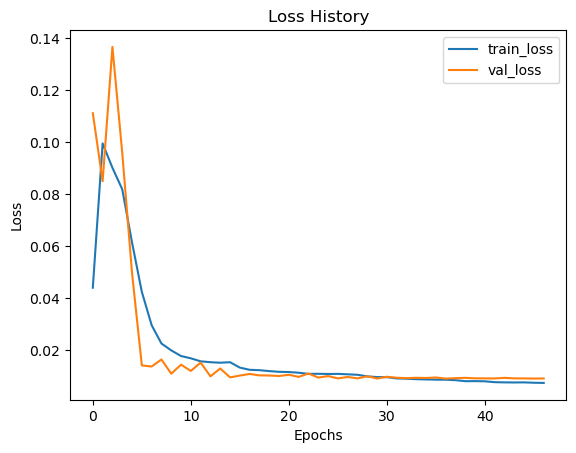

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

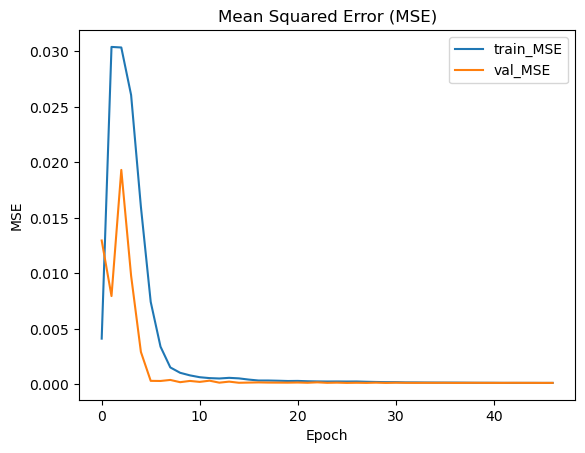

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

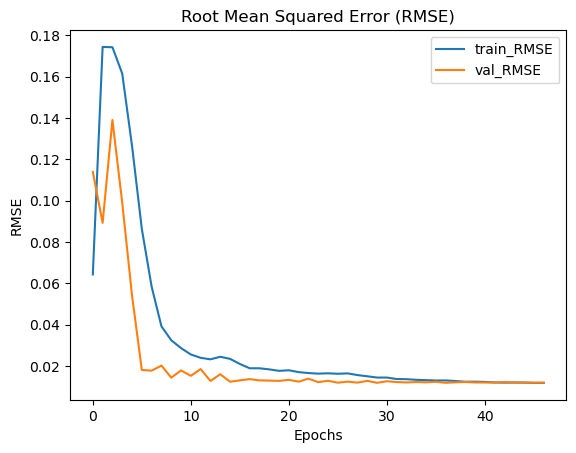

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

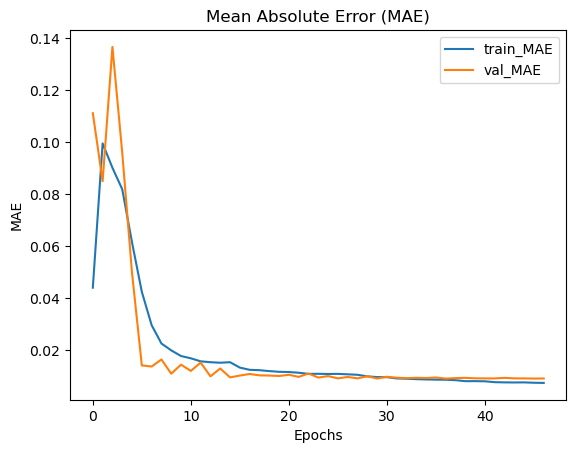

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

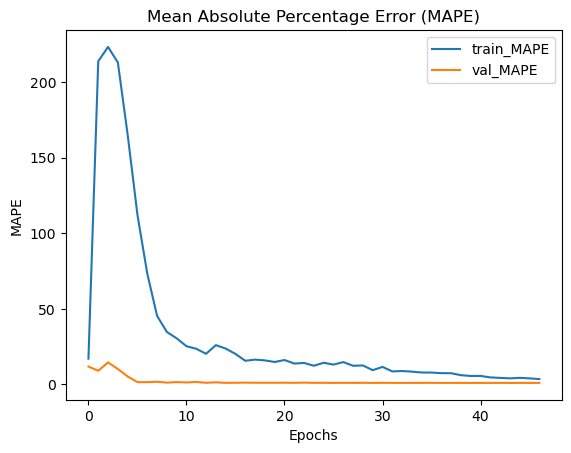

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:08:04.342406: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


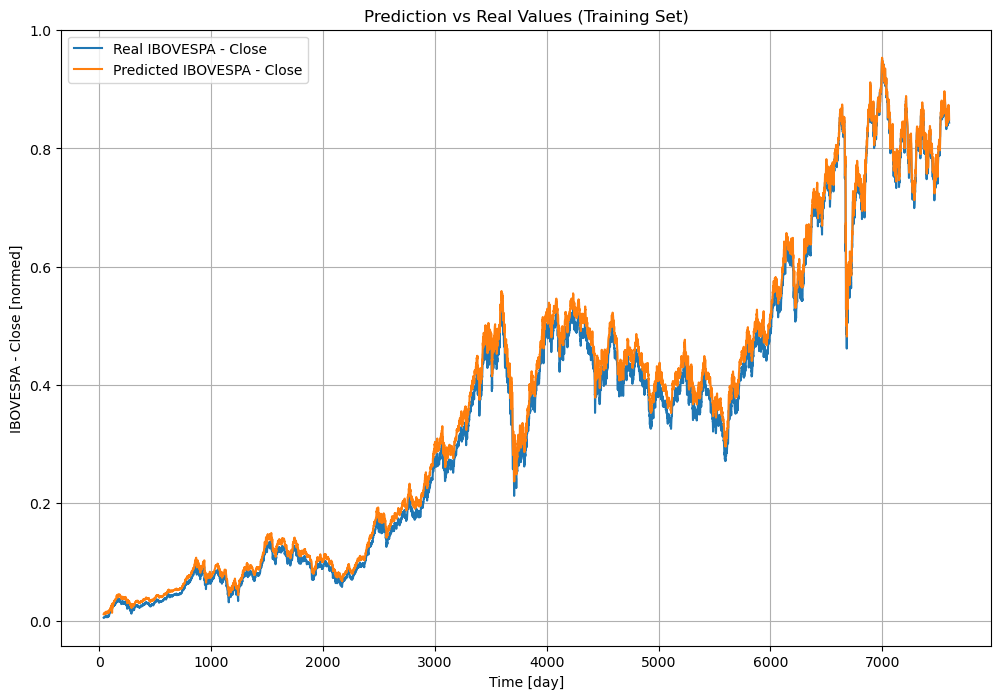

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


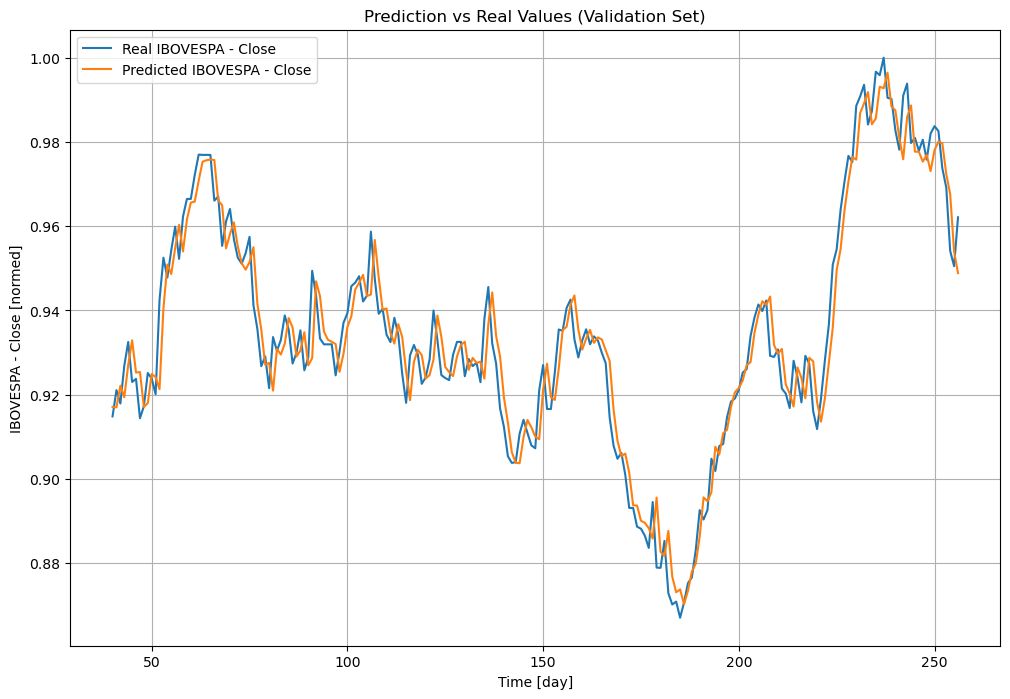

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


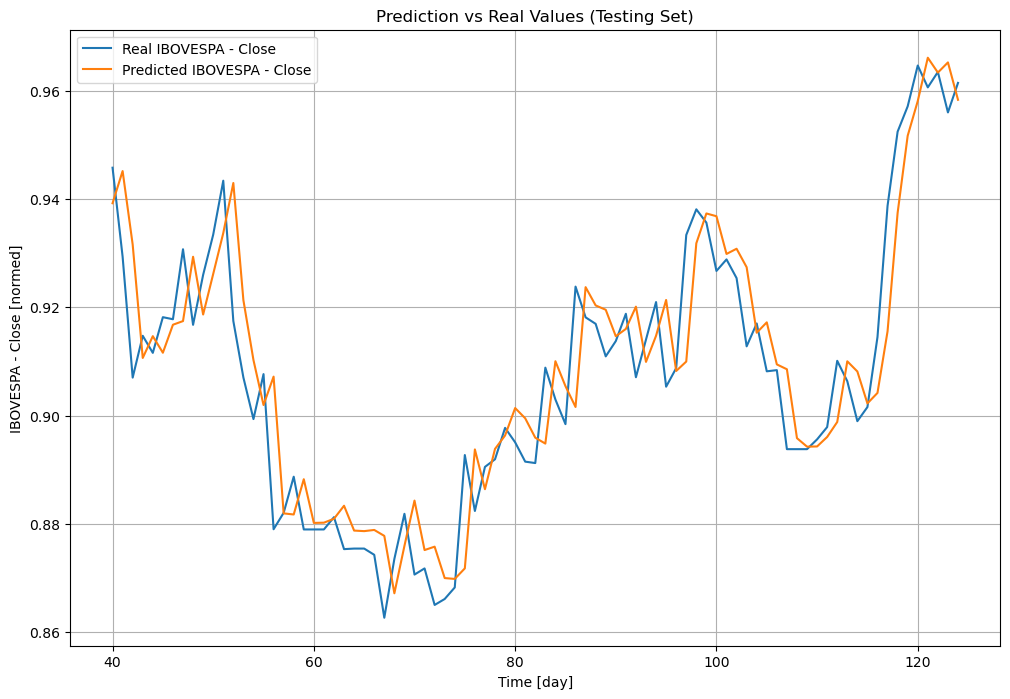

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

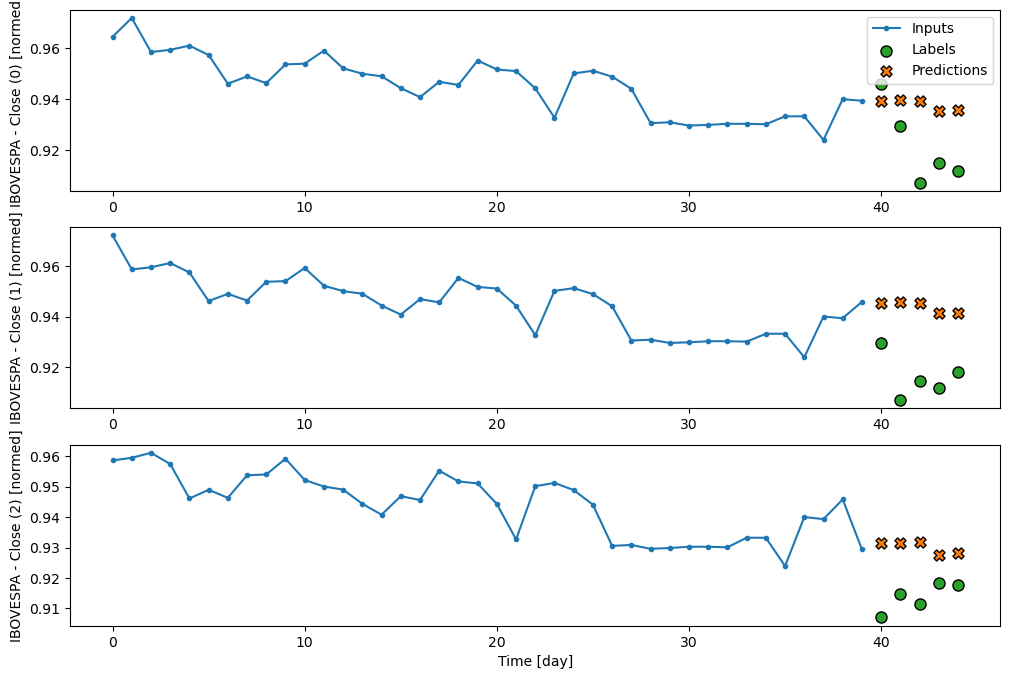

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:42s:176ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[[0.9392439 , 0.9392439 , 0.9392439 , ..., 0.9392439 ,
         0.9392439 , 0.9392439 ],
        [0.9397597 , 0.9397597 , 0.9397597 , ..., 0.9397597 ,
         0.9397597 , 0.9397597 ],
        [0.9392843 , 0.9392843 , 0.9392843 , ..., 0.9392843 ,
         0.9392843 , 0.9392843 ],
        [0.9353337 , 0.9353337 , 0.9353337 , ..., 0.9353337 ,
         0.9353337 , 0.9353337 ],
        [0.9356001 , 0.9356001 , 0.9356001 , ..., 0.9356001 ,
         0.9356001 , 0.9356001 ]],

       [[0.94519067, 0.94519067, 0.94519067, ..., 0.94519067,
         0.94519067, 0.94519067],
        [0.9459067 , 0.9459067 , 0.9459067 , ..., 0.9459067 ,
         0.9459067 , 0.9459067 ],
        [0.9451953 , 0.9451953 , 0.9451953 , ..., 0.9451953 ,
         0.9451953 , 0.9451953 ],
        [0.94122165, 0.94122165, 0.94122165, ..., 0.94122165,
         0.94122165, 0.94122165],
        [0.9413442 , 0.9413442 , 0.9413442 , ..., 0.9413442 ,
         0.9413442 , 0.9413442 ]],

       [[0.9316094 , 0.9316094 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')